In [1]:
# 手順と機能(ESPAR map)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 各要素の積のデータが用意できたら「 https://chemapps.stolaf.edu/jmol/swingjs/site/jvxlCoder.html 」に
# 　アクセスする。
# 4 Valuesに積のデータをリスト形式で入力し、積データのmin、maxも入力する。
# 5 Testを実行すると、データが変換されるので、escapedのデータを記録しておく。
# 6 Jvxlファイルのコピーをエディタで開く。 i-ESP mapとe-ESP mapのどちらでもよい。
# 7 jvxlColorDataのdataをescapedのデータで置き換える。また、max,minも変更
# 8 Jmolで表示

In [2]:
# 手順と機能(ESPAR plot)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 int, exのデータをdfに変換
# 4 int, exのデータから相関プロットを作成（ヒストグラムつき）
# 4 積のデータについて、全体のmax, minを元に、4分割表示なら、上位75%<積<100%の範囲、中位50<積<75の範囲、
# 25<積<50の範囲、下位0<積<25の範囲を特定し、フラグをつける。または新たなdfを作成する。このとき、範囲に含まれないindexのデータは0にする。
# もとのESPAR plotを灰色で表示し、範囲ないのデータを赤で表示して重ねる。
# 5 この範囲外のデータが0のリストを作成し、ESPAR mapに投影する。

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# i-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たi-ESPデータ
int_list = [0.018825626,0.018163187,0.018643256,0.021167532,0.017322533,0.017465701,0.015323937,0.017766757,0.020945726,0.021227978,0.02366762,0.024018409,0.025849989,0.026092587,0.025938246,0.012277991,0.0073369415,0.011866821,0.014627664,0.021214068,0.023992352,0.025028022,0.003372221,0.003395671,0.0032181046,0.0052298754,0.011996206,0.014143534,0.01709029,0.020338023,0.020352088,0.012776499,0.008807674,0.0045371256,0.004486055,0.007871115,0.014147979,0.009806649,0.018637745,0.017548101,0.019408515,0.019445093,0.012952306,0.018295893,0.015204597,0.010179079,0.012541108,0.004860092,0.004921801,0.020379782,0.021231623,0.01767488,0.019711306,0.017640268,0.019171998,0.023207674,0.022533992,0.02342661,0.01589515,0.01859596,0.01992767,0.018161593,0.021118937,0.022775324,0.023602793,0.024145305,0.013866601,0.007631638,0.014130535,0.017057044,0.02544423,0.026454225,0.026570486,0.026026448,0.0016046757,0.0016695331,0.0019607977,0.0056833625,0.0037893523,0.02496407,0.025612079,0.0059971083,0.0071745217,0.007144734,0.0041350047,0.022015166,0.021558836,0.015927784,0.014860103,0.012880685,0.012934654,0.017859511,0.017574536,0.021091288,0.016356882,0.02080698,0.021847302,0.011229964,0.0053157643,0.0050274218,0.007672607,0.008358827,0.019882258,0.018666338,0.019791141,0.022892583,0.022100173,0.025283128,0.024722457,0.027136434,0.027363298,0.02727117,0.024576798,0.02517597,0.02438205,0.021445239,0.018117141,0.017429586,0.011896698,0.014056902,0.007600391,0.007928343,0.008762169,0.00843355,0.008471574,0.014103768,0.011991592,0.01655253,0.0238018,0.027142715,0.027095925,0.026999874,0.025235724,0.024850128,0.021884054,0.018338962,0.009377899,0.010336197,0.010095777,0.007240067,0.0063499194,0.010664004,0.014483122,0.017675834,0.021720784,0.02444259,0.023060653,0.017817598,0.018898293,0.018847967,0.017067833,0.015314054,0.008183735,0.0067075486,0.009824855,0.0152450055,0.019320976,0.015934467,0.023464985,0.02297508,0.01891406,0.016580798,0.01638173,0.011423266,0.009110222,0.012171526,0.0090735275,0.026523842,0.02664604,0.02515752,0.023037951,0.020451045,0.014009682,0.019777501,0.009314291,0.024255622,0.023626417,0.023925336,0.027546884,0.027481243,0.029255595,0.026647214,0.026059885,0.02424513,0.020792056,0.012946491,0.012913653,0.012948777,0.015540434,0.01535763,0.022279106,0.016024396,0.02501075,0.02350428,0.024427347,0.024312844,0.019216817,0.022655008,0.01821426,0.015354725,0.015826037,0.027748981,0.030261239,0.03054558,0.02999642,0.028069416,0.026154846,0.017334675,0.024573859,0.033319786,0.03435594,0.034754734,0.03340291,0.030398969,0.032034643,0.035164062,0.034119457,0.01419529,0.013806859,0.016464202,0.018792724,0.02135776,0.023118936,0.024523187,0.024360059,0.0015661789,0.0014012738,0.0017406336,0.0045384807,0.0055693523,0.0129872905,0.025038172,0.0261143,0.0011657425,0.0016691373,0.0019725708,0.024324156,0.0084150825,0.023662645,0.009383365,0.015972175,0.015823131,0.017655775,0.020593485,0.020444311,0.024182089,0.023896929,0.02421798,0.026031516,0.02622581,0.026578136,0.021428058,0.01368511,0.015313923,0.015571145,0.019843245,0.01886727,0.021993335,0.02728167,0.02839495,0.028469903,0.028151901,0.02527159,0.02528793,0.012986777,0.010375689,0.0144061465,0.013993719,0.0143429525,0.010759078,0.027838001,0.026343567,0.026697174,0.026702207,0.025575511,0.023145534,0.021597732,0.021829285,0.017197888,0.013212342,0.014315626,0.016386218,0.01541182,0.023715284,0.024469731,0.026445506,0.025465125,0.022917485,0.020543227,0.021486053,0.021000339,0.021409692,0.022963952,0.022797402,0.024921134,0.023683336,0.011744175,0.015989223,0.014848821,0.02726489,0.024664987,0.027490662,0.02996741,0.030233433,0.03187667,0.032700904,0.03314098,0.027460475,0.027305668,0.02093392,0.01572532,0.015778624,0.014293166,0.015472718,0.01526943,0.014664315,0.018535357,0.016284663,0.02439593,0.023248326,0.029946363,0.03357848,0.03387098,0.034028586,0.027436282,0.028618868,0.02791467,0.027272277,0.025850903,0.024460442,0.024688318,0.022169784,0.015802803,0.019818181,0.01823596,0.014278206,0.021791779,0.024983086,0.02947354,0.032671697,0.03267513,0.027536223,0.026238501,0.02374293,0.027129112,0.026519032,0.01717941,0.02448429,0.030205805,0.02876241,0.032502525,0.028507544,0.031366307,0.03189954,0.023401992,0.021525573,0.024421541,0.024428204,0.035116244,0.03528123,0.035038818,0.03183835,0.033666335,0.026845593,0.03354231,0.04056955,0.039984416,0.040458124,0.041523162,0.041439217,0.040807396,0.037873507,0.038606733,0.038486134,0.0383671,0.037862487,0.03830295,0.033715952,0.034745373,0.037273467,0.035319332,0.034954187,0.03357351,0.03909021,0.035925265,0.039163142,0.039404783,0.038406223,0.038556408,0.03852666,0.04712966,0.047483005,0.047394477,0.040722724,0.04618385,0.04211308,0.034560747,0.03133862,0.032177366,0.036722876,0.033078063,0.05026444,0.050823532,0.05102325,0.049583293,0.04570071,0.04369475,0.042822752,0.03372976,0.02911203,0.029698515,0.05375728,0.054066893,0.05336077,0.049679637,0.04787065,0.04528407,0.03600264,0.043892402,0.05570215,0.05495197,0.051980056,0.046625078,0.0075267935,0.0038192477,0.009367246,0.012970683,0.016680883,0.01932442,0.020694384,0.02276974,0.0017160401,0.0017583009,0.0016040364,0.0014206022,0.003065207,0.023221718,0.024461173,0.0018432518,0.0018476301,0.001881523,0.022657223,0.02281775,0.02295161,0.0065301456,0.008413048,0.022513358,0.024327457,0.0150646195,0.020995218,0.02254816,0.02456719,0.024305142,0.024304375,0.022899615,0.024254607,0.026641577,0.02726344,0.027287288,0.015173498,0.019069979,0.020951591,0.02256017,0.027086422,0.027798757,0.02380865,0.024769867,0.015601612,0.028335746,0.028083188,0.027640222,0.027002364,0.026650947,0.022093486,0.02140282,0.021924935,0.021052347,0.021156065,0.026823623,0.026696144,0.026560491,0.026470235,0.02474251,0.022707688,0.023817675,0.025975533,0.02651506,0.02438817,0.01715786,0.021892222,0.02332566,0.022473272,0.027507428,0.024959844,0.02816421,0.030396624,0.031894647,0.034102842,0.034635115,0.035184853,0.027412001,0.015758302,0.020228034,0.01715752,0.035168454,0.028220598,0.02832494,0.028148245,0.0246882,0.02679585,0.026028732,0.02296577,0.024768744,0.022451269,0.035402805,0.028941214,0.028605008,0.027855128,0.02674854,0.02755462,0.02868285,0.028360346,0.03216637,0.036150616,0.036559634,0.031704333,0.024458954,0.032721486,0.03411786,0.04298848,0.043191217,0.04329374,0.043716434,0.044285506,0.044061083,0.034088276,0.03543164,0.03261917,0.038053855,0.038107507,0.03862709,0.039282914,0.03828761,0.036838975,0.040426962,0.037883885,0.04340439,0.042432703,0.04382587,0.04182825,0.04258766,0.042065576,0.04201443,0.037239503,0.038009908,0.03848602,0.040105876,0.042601872,0.042280413,0.03853845,0.038931236,0.04512494,0.04424069,0.039308935,0.038229853,0.03968053,0.039091118,0.03936687,0.040518418,0.04139693,0.042789385,0.050495025,0.0508707,0.050517008,0.037938714,0.036643274,0.037547067,0.035756934,0.052355498,0.029369213,0.02930184,0.034153305,0.029235369,0.055626273,0.05417978,0.04207767,0.033348534,0.028237725,0.031655956,0.05834683,0.059419323,0.058189664,0.05502992,0.0535595,0.052207835,0.045767844,0.052231964,0.034083422,0.060188778,0.060014177,0.057478197,0.05342143,0.0021077413,0.0032652544,0.0028972153,0.0038588773,0.009566769,0.013941482,0.016324444,0.017597113,0.01971919,0.0046255426,0.0039901384,0.0035526531,0.020408051,0.022162542,0.0036345536,0.0019374969,0.021455906,0.021699257,0.0048196227,0.024970608,0.010227789,0.012716904,0.014635698,0.022848153,0.025055073,0.026149297,0.02332985,0.023822831,0.024152162,0.025889648,0.017660994,0.025891976,0.026841924,0.022442779,0.023184871,0.026993817,0.025498856,0.022722626,0.02547172,0.02528867,0.022589443,0.026682094,0.027373016,0.025650715,0.02537815,0.024627147,0.02495829,0.021675786,0.024024118,0.027726404,0.028038135,0.029643035,0.029452043,0.029258417,0.0307022,0.030793827,0.032422293,0.032594293,0.03249236,0.023981724,0.024690261,0.024388589,0.02787734,0.028925657,0.033738475,0.034627706,0.025292382,0.025242405,0.0351853,0.035621688,0.036731765,0.027248338,0.027223311,0.028195217,0.028360918,0.03648428,0.03783924,0.028429162,0.026651725,0.026552573,0.028610874,0.027592817,0.030720878,0.037394077,0.038144324,0.04175806,0.031184092,0.031319734,0.031578563,0.043848086,0.04196641,0.043465443,0.045073584,0.044691827,0.04452685,0.044898596,0.04413274,0.044304866,0.044200826,0.032672517,0.034143806,0.038748983,0.04401203,0.041825056,0.036653597,0.03668512,0.047859862,0.050519507,0.039067615,0.039079443,0.0402247,0.04231715,0.045978922,0.04800022,0.054160975,0.035925545,0.035270505,0.052617006,0.05363266,0.05236361,0.02977327,0.034822162,0.029335946,0.05571299,0.05505124,0.029529836,0.026572162,0.027696894,0.056357153,0.060422532,0.059679512,0.05137916,0.039706375,0.04895033,0.030423028,0.061829325,0.06526353,0.06691255,0.06590744,0.060050525,0.051969197,0.008592843,0.010076184,0.0050101765,0.004787656,0.0028539333,0.004221579,0.00946638,0.0129689425,0.016183376,0.016239429,0.011776455,0.0107710585,0.016237034,0.018481134,0.019307632,0.01026002,0.004581237,0.02266782,0.0026484523,0.0028221784,0.003040718,0.021879977,0.021944221,0.022021694,0.010491531,0.012181796,0.011718387,0.021842098,0.023217015,0.022277817,0.023155212,0.024056066,0.012110414,0.014704486,0.023711173,0.024838386,0.019493531,0.021155298,0.020479672,0.025398385,0.025233908,0.023155514,0.022951026,0.028841823,0.028884515,0.028842108,0.023267278,0.023983367,0.024219315,0.024491405,0.023600241,0.025473168,0.03220642,0.029503765,0.030550333,0.029236862,0.031429503,0.031948745,0.02493069,0.023731582,0.032190632,0.030802852,0.031772103,0.033413623,0.023767702,0.023566974,0.03390503,0.036018826,0.025563803,0.025569148,0.038739175,0.026803248,0.02568208,0.026345,0.03018252,0.028625775,0.032870777,0.041186985,0.045069687,0.031038156,0.030320073,0.044468887,0.04793595,0.043552592,0.0428706,0.04426336,0.043488476,0.04407399,0.043132193,0.031947818,0.032788813,0.041101784,0.041174885,0.040697906,0.034906745,0.035259288,0.03835735,0.03711698,0.03756367,0.039840452,0.04301207,0.048356082,0.053378724,0.056037687,0.03631675,0.034118354,0.05512856,0.053960077,0.0282614,0.026661742,0.055818096,0.024690147,0.023437751,0.057173442,0.06092401,0.042792264,0.033998396,0.039122958,0.02416194,0.063196816,0.07025387,0.07377249,0.0755489,0.071599774,0.058407627,0.04605634,0.0740795,0.07447247,0.074063174,0.07138498,0.074442655,0.07386844,0.07298629,0.07016561,0.07047813,0.06559247,0.06331443,0.07363099,0.07109435,0.0658239,0.051638056,0.0498786,0.048756097,0.054050863,0.045419917,0.04710335,0.0409698,0.04034897,0.040058047,0.03954297,0.03453805,0.030858856,0.024050798,0.032477163,0.0148364045,0.014403134,0.019201629,0.004554812,0.004410413,-0.0023373682,-0.0029904647,0.012974232,-0.0019344408,-0.004846631,-0.0024534303,0.0041925656,-0.0051991064,-0.011358354,-0.013667619,-0.016751848,0.021593938,0.023237096,0.020441942,0.016299848,0.015327307,0.0051074,0.006887823,-0.0063093835,-0.015685132,-0.022039605,-0.022032281,-0.022223808,0.023988277,0.023285672,0.022824248,0.019913632,0.014407051,0.006835578,-0.0046330127,-0.0153112225,-0.02191202,-0.01685432,0.023037646,0.017578803,0.015843758,0.010000716,0.0046408195,0.0051939855,-0.0035721404,-0.015122814,0.015804376,0.009547395,0.014925687,0.01586901,0.014371215,0.014349563,0.0112258475,0.0047709765,0.0025275839,0.0040320246,0.007084011,0.010143779,0.01581108,0.014239721,0.012026729,0.0126562035,0.015583301,0.015602423,0.010276187,0.015585665,0.017057717,0.0050609875,0.0024659345,0.016945353,0.016826559,0.005375269,0.01084373,0.017050808,0.019962013,0.022659795,0.022398464,0.022470813,0.009675522,0.013709782,0.013830817,0.022381341,0.02289594,0.022342784,0.0175535,0.025463762,0.025327452,0.019291606,0.020725528,0.025810055,0.02875187,0.026063781,0.020630883,0.021467239,0.022835905,0.021210391,0.023647007,0.023793355,0.032242723,0.026665483,0.030670723,0.03032023,0.028886126,0.030006576,0.030194834,0.023174854,0.022724211,0.022202637,0.030666279,0.031428155,0.023328867,0.032486886,0.03493489,0.023358997,0.023686795,0.038925983,0.024312036,0.025508557,0.027547797,0.026450317,0.030114036,0.030180283,0.043253936,0.04572194,0.02978095,0.030458346,0.030524116,0.045727342,0.047452636,0.043081712,0.042133447,0.042970944,0.041814644,0.041303467,0.03098347,0.040690597,0.038891464,0.03356888,0.03345278,0.035267755,0.036347926,0.037883706,0.042514652,0.047062952,0.052468702,0.055168804,0.03511308,0.03406195,0.05428535,0.025563868,0.02230218,0.055267327,0.019396083,0.017512714,0.056660213,0.06137653,0.03735868,0.022502944,0.024181657,0.06479873,0.07507276,0.083749086,0.08798403,0.08678135,0.07691155,0.0630676,0.050537415,0.03861651,0.022876158,0.0266044,0.02448901,0.08334627,0.07739746,0.07713666,0.08876496,0.07096626,0.06229475,0.049295075,0.039780196,0.03037041,0.024216412,0.07706418,0.075116895,0.07552646,0.06341809,0.05059722,0.03954742,0.029906783,0.027048022,0.07773935,0.07803657,0.0756209,0.071098775,0.06614135,0.061661072,0.050033573,0.03755278,0.038759284,0.029521862,0.08026471,0.07684744,0.0692227,0.06232491,0.050170094,0.06824526,0.06214854,0.06184239,0.071295574,0.060814817,0.069401965,0.058173697,0.055329256,0.05881808,0.051172353,0.05104767,0.053108633,0.03813926,0.032326356,0.026626598,0.019528402,0.04251978,0.041923076,0.039799675,0.02045936,0.010981449,0.01599915,0.0042479206,-6.980315E-4,0.039068647,0.03600767,0.035018522,0.025617525,-0.007656728,-0.0023290643,-0.012676512,-0.012891123,0.029306844,0.021505056,0.014537463,0.0046787583,-0.0051270355,-0.013173682,-0.01980959,-0.018966896,-0.022642963,0.024475,0.024640616,0.024294551,0.020844344,0.016525,0.0053245714,-0.020702165,-0.02756095,-0.029037422,0.02519086,0.02461835,0.025010692,-0.02683246,-0.028736772,0.025004912,0.024244256,0.024150863,-0.021043733,-0.025285115,-0.025391778,0.02422872,0.020140905,0.020046938,0.004512632,-0.00419777,-0.016251685,-0.021283412,-0.023834374,-0.02129938,0.016017208,0.009236304,0.0023620476,-0.0012205439,-0.0060877195,-0.01703189,-0.021283068,0.019573908,0.019613989,0.019379186,0.019011917,0.01571357,0.012988897,0.01017913,0.0039043506,0.002576887,0.0038882422,0.0054295612,0.017657526,0.0072863665,0.010510618,0.015971454,0.013156638,0.013034689,0.01078526,0.014364155,0.0048135333,0.01426438,0.01389426,0.016682109,0.014625804,0.0028588618,0.016668774,0.01827368,0.018711159,0.0032590413,0.009156198,0.019648846,0.021541424,0.021720078,0.015530731,0.016035212,0.016349781,0.021722194,0.021308903,0.018451035,0.020652315,0.019098151,0.01948396,0.01852458,0.021669285,0.02113281,0.018004654,0.016913876,0.017047232,0.021183632,0.026444437,0.028888812,0.028739853,0.02920012,0.018864062,0.020344429,0.02798941,0.029516181,0.030877857,0.021713268,0.03211649,0.03305633,0.021758407,0.023344148,0.022897374,0.023603715,0.03813006,0.038285974,0.03830085,0.023982108,0.02358606,0.022690464,0.023273125,0.038278747,0.04581541,0.04241783,0.026397716,0.027928136,0.043312456,0.044112135,0.041537054,0.042094544,0.04126655,0.04099285,0.030688006,0.039267033,0.039129965,0.031408332,0.033920124,0.036543228,0.033974443,0.03884644,0.039377905,0.04268678,0.0441271,0.037438627,0.03369133,0.043547835,0.052992303,0.017651651,0.054701142,0.012551947,0.0023088313,0.05477963,0.06272837,0.02278332,0.007431641,8.8606076E-4,0.06519588,0.07693321,0.08726299,0.087706625,0.09051404,0.014731489,0.009411114,0.08025892,0.07551216,0.07740533,0.021284735,0.013201933,0.07471868,0.020893794,0.014300348,0.07816619,0.07832185,0.037490863,0.026905697,0.016830865,0.018477105,0.08333969,0.09136457,0.08987919,0.080982715,0.07212607,0.06605553,0.067357704,0.048255723,0.034688167,0.02423964,0.06692276,0.060216956,0.061709292,0.080998234,0.055291325,0.049512815,0.051029775,0.048675235,0.048824504,0.04904234,0.030799152,0.017876623,0.013599524,0.010611505,0.009689245,0.040287405,0.040305812,-0.0010151635,-0.00584005,0.04001613,0.037351403,0.03745064,-0.00614634,-0.016094921,-0.016166633,0.026520774,0.026531173,0.023577781,-0.023835102,-0.02223384,-0.02552249,0.02462865,0.02426225,0.024726646,-0.03150073,-0.030909738,0.023073612,0.023193438,0.024835782,-0.029684652,-0.029047137,0.02074336,-0.026004516,-0.024502259,0.0190025,0.019821258,-0.02308889,-0.0230674,-0.021803632,0.017442733,0.009106177,0.0069363276,0.0060679605,9.331696E-4,-0.0062604174,-0.015887886,-0.014308309,-0.023193603,-0.023830442,-0.02207727,0.0023281276,-0.0044174828,-0.008337358,0.021767825,0.022019522,0.021245347,0.018804455,0.015452967,0.013621518,0.0071966983,0.0031642942,0.004086995,0.0040922724,0.020272616,0.019423068,0.01874718,0.004117256,0.0064580874,0.00935729,0.014039069,0.011398733,0.013700807,0.013962442,0.013793685,0.012113663,0.007038014,0.009862362,0.014571284,0.01542238,0.0027454728,0.0028804864,0.015444014,0.016986562,0.016836593,0.0045278105,0.015990766,0.016627206,0.007877351,0.01017236,0.01717969,0.01927306,0.01181603,0.01381208,0.015230244,0.01995565,0.01845834,0.019729525,0.018892145,0.01527605,0.014612749,0.015546715,0.022003913,0.025096215,0.028739475,0.014691174,0.016772151,0.017550342,0.025004044,0.029160183,0.029782912,0.028937351,0.01707624,0.021144088,0.018019767,0.029902313,0.032515634,0.032726508,0.018508248,0.019506305,0.021449154,0.019455675,0.034698237,0.038113363,0.034699026,0.02075375,0.019847436,0.021524522,0.036891717,0.041293625,0.038755428,0.020072512,0.024181828,0.024915956,0.0415776,0.04307108,0.040816024,0.040888272,0.040827617,0.026744943,0.040731337,0.039962746,0.039145354,0.027043357,0.030001052,0.033873573,0.030896429,0.04034967,0.0377001,0.032906435,0.035693448,0.035781585,0.03072225,0.04087709,0.04630492,0.01731906,0.010732984,0.007819769,0.050071485,0.05451822,0.053719103,-6.775991E-4,-0.005293629,0.062889576,0.064448945,0.068877965,-0.0044996203,-0.007191506,0.07703,0.08238287,0.0034267514,0.0015220024,0.0809363,0.07260334,0.010125524,0.004771965,0.07202818,0.07120888,0.0739267,0.008017637,0.0033944543,0.074925855,0.07627006,0.014819456,0.0036959604,0.005034131,0.0891934,0.09008791,0.066805035,0.048521105,0.034151822,0.020929042,0.009671934,0.020592509,0.06999079,0.055770934,0.049322307,0.037180748,0.03009661,0.03289161,0.020848088,0.054083105,0.045977727,0.025289092,0.005704511,0.005125368,0.004868199,0.038051806,-0.005873059,-0.009511215,0.034700483,0.033040144,-0.01816093,0.022715952,-0.0252648,-0.02474156,0.02032934,0.021322079,-0.028360894,-0.028651398,0.0203913,0.018125126,-0.028654102,-0.027748287,-0.025906516,0.018298473,-0.021426024,-0.0202584,0.014384221,-0.018839803,-0.01583293,0.0116196,0.004340777,0.0064919423,-0.016535342,-0.024278805,-0.026710102,-0.024598012,-0.024736667,-0.018262696,0.0028780408,-0.0056406907,-0.013590931,-0.015099385,-0.02914563,-0.03643156,-0.032343812,0.02400889,0.024372473,0.02372531,0.02086484,0.01750875,0.015749648,0.010526108,0.0052391402,0.0052523864,0.022336708,0.021961277,0.0052721854,0.0084681,0.009811352,0.016065191,0.014000721,0.017182665,0.019103814,0.014943364,0.013463873,0.019277753,0.020090273,0.015789542,0.019766517,0.0039648092,0.019690206,0.017324314,0.004401709,0.018997405,0.016202359,0.016538056,0.004668317,0.008387558,0.008396155,0.008397901,0.017712971,0.018661113,0.012303046,0.014366953,0.018650748,0.018424861,0.019277072,0.0143989865,0.014592329,0.01972446,0.022300012,0.014792638,0.01598544,0.01713772,0.022443075,0.023144426,0.02416442,0.015699007,0.015835548,0.025154214,0.027093481,0.016539648,0.019377638,0.019092137,0.028739698,0.029089473,0.018901398,0.019127812,0.030618418,0.035440613,0.02017481,0.023506645,0.023909759,0.037357952,0.039309725,0.04280653,0.04258873,0.024093749,0.024426045,0.024259131,0.04345998,0.044481684,0.044547275,0.027072677,0.030072741,0.04011761,0.031589143,0.032616183,0.034890078,0.028000206,0.034571204,0.039791856,0.040491395,0.026982304,0.005280139,0.046309385,0.04892007,-0.004510928,-0.00784318,-0.007685465,0.055960484,0.063442044,-0.010380314,-0.0093377745,0.075524844,0.07973429,-0.0010570944,0.06951824,0.0690334,0.07140169,-0.0014352794,0.06855112,-0.004423497,0.07248102,0.0746041,-0.0026247064,-0.008112876,0.07250458,0.082845345,0.0039406326,-0.011567529,-0.011409379,0.06882672,0.0517444,0.030636355,0.015443284,-2.2790954E-4,0.0030057216,0.051704608,0.04142589,-0.0014410769,-0.005995928,-0.013440136,0.033794153,-0.011305505,-0.017178783,0.02376847,0.027839094,-0.01836427,-0.019154059,0.015429758,0.0195101,-0.0219312,-0.02199814,0.01301063,-0.028157467,-0.02231727,0.01453273,0.013246812,-0.019996166,0.013536803,-0.018952994,-0.013024382,0.009135628,-0.01523247,-0.013930239,0.0063441843,-9.0259104E-4,-0.024718357,-0.02468461,-0.023569003,-0.021207305,-0.003130179,-0.012909076,-0.020911997,-0.03742824,-0.059176717,-0.059313726,-0.05903149,-0.056955725,-0.053404152,-0.047927123,-0.034074347,-0.04537039,-0.08864139,-0.08742858,-0.08498727,-0.08178681,-0.07823914,-0.07334776,-0.07216665,-0.10014651,-0.099911496,-0.097011656,-0.09351671,-0.089481175,-0.08322774,-0.0857584,-0.10130896,-0.099543646,-0.09611118,-0.09168375,0.025903512,0.0255546,0.025968397,0.023659855,0.020563232,0.01734039,0.016169673,0.013567494,0.0056488253,0.022274116,0.026106784,0.024227303,0.01472254,0.0072046947,0.007917182,0.010338382,0.010272112,0.019130418,0.019831575,0.013660647,0.018339776,0.018643832,0.019398898,0.019418437,0.020469692,0.01413042,0.020654151,0.021710027,0.0065166177,0.022910194,0.00615385,0.0044939853,0.005446647,0.02147233,0.01860544,0.018722592,0.0076517817,0.012439202,0.02090118,0.021900192,0.018707339,0.021972477,0.013691271,0.017089745,0.023776138,0.02337379,0.019266311,0.019816501,0.023116287,0.022626229,0.019560289,0.018089695,0.019488528,0.02298912,0.022364076,0.022398995,0.019576639,0.017272292,0.017083429,0.01762427,0.024914302,0.02598128,0.020656139,0.020706557,0.027162757,0.027619163,0.022755243,0.02264535,0.028318321,0.032792993,0.023304043,0.024237322,0.023423169,0.033172656,0.03613552,0.03744942,0.024370015,0.025681265,0.025082598,0.03867162,0.040976077,0.04443766,0.02705202,0.031120969,0.04197374,0.042702094,0.032454807,0.03522946,0.03378506,0.027496206,0.026772805,0.037895106,0.04013634,0.039592072,0.011050434,0.005089431,0.0077928156,0.04048948,0.04453008,0.047648367,-0.0049509704,0.051084764,0.06317288,-0.009909395,-0.008021917,0.06421336,-0.0029993253,-0.002064615,0.068429634,0.067432195,-0.0022313306,-0.002963975,-0.0038742553,0.06630075,0.06454908,-0.009866367,-0.012390861,0.06753537,0.071705446,0.06909369,-0.018926747,-0.024038203,0.08076495,-0.012039731,-0.024049139,-0.026385052,0.06131005,0.047164388,-7.594321E-4,-0.014616226,-0.024760293,-0.01950159,0.045309864,0.03693657,-0.015922196,-0.02395419,-0.023957841,-0.023970058,0.029338494,-0.019312918,-0.026060345,-0.02608449,0.014184657,-0.022581117,-0.024719756,0.0066301515,-0.021783622,-0.022574443,-0.018333117,0.0030029751,0.0031190575,0.0077483263,-0.016132459,-0.01348719,0.0076851025,-0.01046407,0.0069973394,-0.009878922,-0.012536777,-0.012451608,0.0046205753,-0.013771166,-0.013992516,0.0018765968,-0.00821819,-0.0081723435,-0.008261332,-0.02030335,-0.018877074,-0.01662733,-0.038580127,-0.061520986,-0.060289994,-0.04247821,-0.03345375,-0.036686357,-0.09088668,-0.08935381,-0.06749043,-0.064500436,-0.10280819,-0.10204566,-0.08488273,-0.07862077,-0.07815334,-0.10409547,-0.10290339,-0.10253874,-0.09989617,-0.09624699,-0.09236127,-0.08696079,-0.08699671,-0.07916683,-0.10172648,-0.09789111,-0.09399863,-0.0906594,0.026109416,0.024352796,0.026100857,0.021189438,0.019109275,0.018476749,0.025797652,0.024891123,0.026120733,0.018696668,0.01520415,0.009318962,0.009749987,0.009838454,0.02007554,0.012251587,0.017605705,0.018686244,0.020040728,0.02108369,0.022605557,0.021057736,0.021776447,0.01748956,0.016253259,0.01654396,0.022320054,0.022236686,0.022235846,0.0066008326,0.008541952,0.023274098,0.022912981,0.007529529,0.007271285,0.009208864,0.024284115,0.018830223,0.014725715,0.01396349,0.01723248,0.02269551,0.026668837,0.024790308,0.023755103,0.023385886,0.023596793,0.01933729,0.024305599,0.023780018,0.025499089,0.020100161,0.02016395,0.026573582,0.020357564,0.021335518,0.021454562,0.022947958,0.02141872,0.02302044,0.025576271,0.024486683,0.022505002,0.021214623,0.023458939,0.024268486,0.02830377,0.026287997,0.024820294,0.02517454,0.028845295,0.028399188,0.030485757,0.024895288,0.023200903,0.030586973,0.03303486,0.032880347,0.03303991,0.025293704,0.02644839,0.028456213,0.03752315,0.03710227,0.029478505,0.027382204,0.029025216,0.037338085,0.039804667,0.042139485,0.02908288,0.03499939,0.052128986,0.05219909,0.035091523,0.035337176,0.0422036,0.035980534,0.035921086,0.039069902,0.039533447,0.026609601,0.017408097,0.039312642,0.04277677,0.045901295,0.046816304,0.0013184953,0.04730252,0.05882878,0.060969185,0.059669882,-0.0037127836,0.059260033,0.055128857,-0.0019112658,0.0016158978,0.06007745,-0.0034625777,0.06347349,0.06342324,-0.015814047,-0.018613936,-0.01882851,0.06504834,-0.026128221,-0.026194014,0.069571376,0.08086742,0.0826921,-0.028924411,-0.02846137,0.05082605,0.04383957,0.066483356,-0.02467154,-0.028169096,-0.026303146,0.033870395,0.031613037,-0.027294664,0.01684415,-0.026094072,-0.029697856,0.004752891,-0.02841791,-0.028937478,-0.002542385,-0.018351918,-0.028000008,-0.019040126,-0.0055523575,-0.006055264,-0.0031254184,3.7026498E-4,-0.017519142,-0.0028159171,-0.0019914443,-0.007051469,-0.0056432774,0.0017454391,-0.012344829,-0.013435328,-0.0151734,-2.5713537E-4,-5.053822E-6,-0.001956705,-0.014728823,-0.016450394,-0.008510285,-0.017583763,-0.01885779,-0.018826686,-0.026754562,-0.0656605,-0.06419073,-0.035867374,-0.023486633,-0.030884467,-0.09236616,-0.09140987,-0.057614557,-0.057357557,-0.10299806,-0.10303568,-0.062905885,-0.071153894,-0.104614824,-0.10386757,-0.104082175,-0.08691608,-0.07890088,-0.079023,-0.10217795,-0.09791395,-0.093470864,-0.09210797,-0.08966888,-0.08589771,-0.08865694,-0.082947604,-0.08948021,0.023941763,0.02102628,0.024916358,0.02497703,0.024776801,0.024338227,0.021537961,0.018979486,0.018926386,0.013949872,0.009637793,0.020678807,0.02124418,0.018959085,0.013559739,0.01100451,0.013359731,0.017932918,0.01894979,0.02089589,0.022951955,0.024129964,0.023540555,0.01874283,0.017172147,0.01796212,0.023806617,0.022414539,0.008775083,0.010678098,0.02287902,0.010743563,0.012533731,0.015159901,0.02524091,0.026987378,0.026020622,0.017167097,0.025305726,0.028324896,0.023931025,0.023854919,0.025844038,0.025173951,0.018295232,0.025865093,0.02490269,0.02148253,0.026900254,0.021749817,0.021351445,0.022724304,0.022640347,0.023757238,0.026221659,0.02498755,0.025629329,0.026050217,0.029128924,0.027992556,0.023022184,0.024461096,0.027611017,0.02856746,0.030557226,0.031029703,0.025306622,0.025189687,0.03316784,0.03173749,0.032345884,0.030662144,0.031785082,0.025777709,0.025439309,0.035179194,0.03609994,0.025930738,0.027586974,0.027071567,0.03996156,0.027661901,0.02725789,0.031121342,0.031516436,0.029165363,0.034193154,0.041284565,0.044933263,0.043768402,0.034070566,0.04864478,0.055829577,0.05604129,0.03557565,0.05005163,0.03533991,0.033655267,0.031293444,0.0368657,0.037995175,0.011055232,0.03932039,0.040493358,0.042739715,0.04451986,0.04704935,0.04468884,8.746907E-4,0.047968373,0.055009313,0.002823256,0.046990003,0.006318255,0.04944971,-0.0052999128,0.052835938,-0.0055215135,-0.016195823,0.055996142,-0.020818753,-0.021793624,-0.021525765,0.057220884,0.06396701,-0.02360864,-0.024981052,0.039618544,0.049452484,0.038374417,-0.026433785,-0.024328062,0.02462076,0.036791474,0.020413242,-0.027385755,-0.0256708,0.019415554,0.0073737907,-0.03018342,-0.029270733,-0.003287572,-0.030383455,-0.030183244,-0.010606795,-0.024568953,-0.02865308,-0.013301604,-0.01375042,0.012548121,-0.0073281825,-0.020891957,-0.016328687,-0.0125253545,-0.01082424,-0.021209288,-0.022452991,-0.024256129,-0.009951698,-0.023248065,-0.027406022,-0.009570112,-0.011933733,-0.021561854,-0.021564225,-0.017871182,-0.028603569,-0.02156063,-0.018173808,-0.042473413,-0.06959902,-0.027799947,-0.025900187,-0.092699975,-0.029348096,-0.049546804,-0.10235322,-0.06855124,-0.06271884,-0.10295529,-0.10279684,-0.0787011,-0.06666951,-0.06999559,-0.09828165,-0.094422035,-0.09478905,-0.09313655,-0.084811136,-0.076357566,-0.07694867,-0.07264919,-0.09346715,-0.088298365,-0.08375284,-0.07989402,0.024591358,0.021695176,0.019200236,0.020316768,0.019520827,0.018399496,0.015858078,0.012222302,0.010111256,0.010042976,0.015481425,0.017497305,0.0201339,0.022545746,0.024048612,0.025517704,0.024420576,0.017637802,0.014135873,0.012081465,0.011970085,0.010854562,0.024613354,0.024199612,0.010750885,0.011269415,0.011415538,0.022691749,0.017850379,0.023989897,0.026257757,0.01749646,0.017651428,0.017219635,0.023925496,0.02600142,0.024581175,0.024931697,0.027179344,0.02637431,0.019915024,0.018524576,0.0271683,0.02661198,0.020068623,0.023330325,0.027686775,0.027271569,0.027464963,0.023613248,0.02304374,0.02396556,0.02540442,0.024679609,0.025968282,0.02840158,0.02698543,0.02773744,0.029362824,0.024238681,0.024633054,0.02636498,0.025992166,0.033247568,0.03341969,0.03192678,0.031365395,0.032618176,0.031909194,0.031091414,0.02532844,0.03369134,0.034433942,0.0317254,0.030891692,0.032136668,0.027343448,0.027284142,0.032700516,0.03390915,0.027820064,0.02874789,0.040668853,0.028110495,0.028289417,0.029564302,0.031594228,0.035783958,0.047114246,0.046445083,0.03205906,0.048737165,0.05695999,0.056198858,0.04952659,0.03490533,0.04794459,0.03461545,0.02047771,0.037202574,0.037247643,0.011790254,0.008922338,-0.0020462703,0.03884837,0.038033996,0.038957823,0.04037767,0.036653697,0.041520003,0.03553417,-0.0043768324,-0.031569075,0.04795936,0.036684602,-0.017655186,-0.04278871,-0.041414835,-0.04965467,0.03714688,0.039258298,-0.009685839,-0.028464723,-0.030791441,0.041449524,-0.005434963,-0.016525345,-0.028487062,-0.022495441,-0.02442244,0.042045973,-0.015903773,-0.016260877,-0.01643994,0.042951502,-0.014721194,-0.014634784,0.043238163,0.048870362,0.052911427,0.04962412,-0.02359517,-0.014681221,-0.017340247,0.03433354,0.026159242,0.048608873,-0.01826573,-0.018349998,0.022773638,0.011741758,-0.021715099,0.007903783,3.6369194E-4,-0.026646642,-0.009903622,-0.030203946,-0.028291807,-0.029725607,-0.02919564,-0.017596498,-0.02876285,-0.028293548,-0.0278681,-0.020211648,-0.020230535,-0.020362126,-0.0260951,-0.027058395,-0.027151616,-0.018965172,-0.02858204,-0.030099643,-0.018070031,-0.017530924,-0.018091006,-0.030093003,-0.031085555,-0.020282773,-0.027984643,-0.028723763,-0.023599409,-0.035089888,-0.018463401,-0.02567579,-0.018806402,-0.04603104,-0.071993716,-0.017256342,-0.018991785,-0.0772541,-0.09255223,-0.09311133,-0.029411018,-0.03934221,-0.1003756,-0.1007128,-0.051933397,-0.10115577,-0.10272712,-0.05711673,-0.057701282,-0.09949442,-0.09408431,-0.09329363,-0.0747293,-0.06156014,-0.06497425,-0.08862688,-0.082989186,-0.07765449,-0.072196804,-0.06708828,0.009360617,0.015550754,0.017425748,0.016026635,0.020237057,0.02303063,0.02391291,0.025690116,0.025718328,0.0097497245,0.007329586,0.007566234,0.008391172,0.015394763,0.025554145,0.025548337,0.024912223,0.0110846,0.008169882,0.00988395,0.024028765,0.02387235,0.015104881,0.016501551,0.023024585,0.017801885,0.019982612,0.020619474,0.02038647,0.023765944,0.024859907,0.02509992,0.024072459,0.024141114,0.025758205,0.028315576,0.027703779,0.020317744,0.022681087,0.02177498,0.025014382,0.028389376,0.027009718,0.024102345,0.02734017,0.027809363,0.024856623,0.025132693,0.024527293,0.02469659,0.024233285,0.024622796,0.024010465,0.0244613,0.026029287,0.028453209,0.025439743,0.025496084,0.029520977,0.031474903,0.031833995,0.03243904,0.029856512,0.031595208,0.026879104,0.034123942,0.031709034,0.031782866,0.03233722,0.028369823,0.028194515,0.03238307,0.033239298,0.02852858,0.029816266,0.0318402,0.03182497,0.03209369,0.03163544,0.03277585,0.03201216,0.036985207,0.02951287,0.028062642,0.028337797,0.031039659,0.03296237,0.043754276,0.031556096,0.051459264,0.05704116,0.050994035,0.041632194,0.046758812,0.040781707,0.035089634,0.029919999,0.008131899,0.036846224,0.03700433,0.0044311434,-0.039695367,-0.03949204,-0.050779246,0.03776722,0.03566375,0.0348933,0.0333507,0.029458486,0.02058751,-0.04125163,-0.06247511,-0.060903616,-0.07283423,0.025079409,-0.056880664,-0.073515356,-0.06804979,-0.06989873,0.029114788,0.031384915,-0.043009285,-0.05837267,-0.052779585,0.033817384,-0.046691626,-0.02890044,-0.030619834,0.032762177,-0.017370205,-0.017911002,0.03239758,0.039350152,0.032137685,-0.013171687,-0.013100725,0.034527253,0.03854266,-0.011312983,-0.012907814,-0.0114790555,0.021239154,0.017777834,0.031907607,-0.0074870293,-0.0076546883,-0.010716888,0.011319164,0.0057149213,-0.012385336,-0.0039062116,-0.0054969415,-0.015964016,-0.026073184,-0.02316634,-0.015735121,-0.024883505,-0.025379708,-0.024978856,-0.024221469,-0.02392219,-0.023430679,-0.02075869,-0.025956707,-0.02691431,-0.022846468,-0.023375869,-0.022357937,-0.023788888,-0.028707486,-0.027206974,-0.022987802,-0.030785087,-0.02758147,-0.024744846,-0.0247455,-0.024770737,-0.026637286,-0.025252916,-0.03295706,-0.03551621,-0.037180893,-0.020366704,-0.023518978,-0.018969748,-0.06822189,-0.073097914,-0.072808266,-0.00982403,-0.008672829,-0.01652717,-0.09143971,-0.019484507,-0.025010576,-0.09862486,-0.100535475,-0.035578888,-0.09899849,-0.09856499,-0.037790082,-0.03785105,-0.096132286,-0.09022475,-0.090105064,-0.04371976,-0.04789484,-0.0839189,-0.077566884,-0.07045281,-0.06232683,-0.053340428,0.016946033,0.020194896,0.017203517,0.023100551,0.024303403,0.024392348,0.0062706345,0.0056725373,0.0056040217,0.011741761,0.01636875,0.024295837,0.024873551,0.024531852,0.009216982,0.005447437,0.007863874,0.022056207,0.016988086,0.011636391,0.016461216,0.021248182,0.019150306,0.022130242,0.01784201,0.02065895,0.014045523,0.01243856,0.013638593,0.023290478,0.02221132,0.02579074,0.027512537,0.027797943,0.027786605,0.023757681,0.0129874535,0.012972116,0.013283942,0.015374243,0.016213035,0.0141466055,0.021693198,0.028417662,0.028945964,0.025333058,0.025604453,0.025910147,0.021337962,0.021294922,0.02299523,0.014944628,0.021424953,0.012963283,0.014902639,0.013941342,0.026749372,0.025779668,0.025408324,0.024377355,0.022595042,0.023580983,0.02229252,0.026785396,0.025223343,0.02251459,0.024021514,0.025525961,0.023991982,0.028478142,0.031016942,0.030984426,0.030578345,0.031222109,0.027622623,0.027583085,0.02543744,0.030334253,0.030785922,0.03242225,0.031568125,0.032240156,0.028818354,0.03234005,0.03161314,0.02966551,0.02983085,0.030050924,0.029697087,0.027222097,0.028511072,0.025277076,0.02562174,0.032925718,0.029223194,0.028605899,0.028490355,0.029514397,0.03626425,0.0377721,0.042309586,0.03262373,0.03529353,0.04202043,0.04942478,0.047402453,0.049328476,0.043171164,0.034514144,0.034082156,0.035235465,0.038340505,0.049040884,0.019091204,-0.005917283,0.035542462,0.03630386,-0.012720494,-0.046312653,-0.06555334,-0.06298919,-0.07691752,0.03578698,0.03428046,0.031538635,0.028438356,0.024021313,0.014271616,0.010235923,0.006070923,-0.077492885,-0.0740081,-0.08236038,0.009793194,0.0143506555,-0.08230335,-0.07673888,-0.07769233,0.026135169,0.023685906,-0.054659314,-0.069475666,-0.062271018,0.02505941,0.026170164,-0.035519626,0.024631172,0.025034534,0.024345027,-0.03436862,-0.019428995,-0.019862328,0.021037675,-0.015102743,-0.01424997,0.020545421,0.022312962,-0.011719915,-0.011932636,0.015012512,0.017134009,0.0117960945,0.0026177438,-0.0062867007,0.005673938,-0.012225089,4.641558E-4,4.1177915E-4,0.009353116,-0.006538657,-0.007933839,-0.006536642,-0.009450746,-0.016266031,-0.020515006,-0.020376703,-0.018472338,-0.020206891,-0.019089457,-0.025730763,-0.028388306,-0.016880542,-0.030339709,-0.029313175,-0.019961743,-0.01683356,-0.02633118,-0.018547844,-0.019320572,-0.024267241,-0.020045895,-0.020170374,-0.019674653,-0.024197282,-0.023903677,-0.019268192,-0.016251989,-0.031334817,-0.039886594,-0.009939896,-0.009477929,-0.0724814,-0.07239727,-0.0013934872,-0.0037751105,-0.008036267,-0.004264515,-0.07305565,-0.08948157,0.001798813,-0.0027738237,0.0024192436,-0.0034351835,-0.09575941,-0.0069185244,-0.09583515,-0.09526029,-0.036124703,-9.605506E-4,-0.09278504,-0.086438276,-0.08595686,-0.011549505,-0.016332569,6.800832E-5,-0.0793332,-0.07119544,-0.06127511,-0.04835288,-0.031417824,0.021071482,0.02119067,0.021184556,0.017906064,0.02005367,0.017185982,0.01811564,0.017829064,0.0257009,0.02571681,0.024823602,0.022632917,0.021761183,0.025787666,0.026046414,0.02300403,0.019341018,0.022367822,0.005641505,0.009850841,0.014464276,0.01753757,0.014399214,0.020740598,0.021446696,0.022328846,0.023963444,0.006409927,0.004223636,0.004675951,0.0036528432,0.011236261,0.01859555,0.018693548,0.021476408,0.015869364,0.012333726,0.013781492,0.004332962,0.015088983,0.009845376,0.014196382,0.017535856,0.021110918,0.016466355,0.020335697,0.005865049,0.008324129,0.022285955,0.024219878,0.026334995,0.027680753,0.024359483,0.02372357,0.013228621,0.015929833,0.016974749,0.0065402836,0.0113248695,0.013895128,0.018767228,0.02151924,0.017876327,0.024257395,0.026469737,0.027622214,0.027828459,0.028351884,0.024868678,0.026057374,0.024620194,0.019677978,0.021454163,0.021286769,0.013365921,0.009277667,0.01038857,0.008997556,0.017601008,0.02555529,0.025833294,0.024356974,0.022794416,0.019480957,0.009082603,0.01755306,0.023476087,0.025504747,0.02193432,0.023004597,0.018700868,0.02059242,0.016389083,0.020526346,0.031517923,0.02695119,0.014452853,0.014233946,0.016989212,0.02388071,0.025035296,0.027786063,0.025667904,0.029252706,0.031352658,0.031623457,0.032238316,0.031164985,0.028263524,0.02898006,0.028310344,0.018665824,0.022635154,0.022788012,0.014919135,0.022881443,0.018076662,0.018029267,0.0168233,0.02377558,0.030844072,0.030488411,0.028894432,0.027051713,0.029129189,0.025753705,0.028342247,0.023546858,0.022224512,0.016774375,0.019378053,0.029692626,0.028988995,0.022393527,0.02691816,0.029830676,0.028932318,0.0284631,0.0300847,0.025107764,0.018886507,0.027505137,0.041690603,0.033884004,0.033793505,0.032820098,0.0128171565,0.008772693,0.014309673,0.015407988,0.009933554,0.025620047,0.037479192,0.03859029,0.033109173,0.022886433,5.914662E-4,-0.03327363,-0.021395998,-0.055465747,-0.0520129,-0.06586304,0.03304178,0.033527534,0.033904307,0.033339538,0.019096531,0.022231063,0.023222756,0.009569687,0.014814403,0.003252279,8.323126E-4,0.0058500455,-0.002061648,-0.06992388,-0.0803393,-0.077655934,-0.08545877,0.03110002,0.028192868,0.023224795,-0.004685596,-0.0050893747,-0.0870358,-0.083531536,-0.088092305,0.01206425,0.0038691198,-0.08308663,0.011240269,0.014289076,-0.063441195,-0.06735148,0.02400782,0.016109405,-0.035638563,-0.03904649,0.012843938,-0.022347966,0.009438525,0.014668284,0.0070943753,-0.0141268745,-0.016293455,0.0052735023,-0.01927397,-0.024430932,0.007989842,0.0040033814,-0.0067293067,-0.019064285,-0.026770882,-0.028961888,3.847601E-4,-0.0025140368,-0.0044098767,0.0038800375,-0.013262873,-0.022064649,-0.028914029,-0.027297031,-0.013264226,-0.01340368,-0.022264557,-0.026951812,-0.023705313,-0.023951413,-0.014173891,-0.02352842,-0.017324992,-0.01728018,-0.016656011,-0.028319538,-0.02998232,-0.030078042,-0.009932303,-0.009031825,-0.030643031,-0.0316544,-0.0312472,-0.008756654,-0.0072674667,-0.027442247,-0.027411072,-0.016810115,-0.009190521,-0.02476775,-0.022977555,-0.008145228,-0.020098204,-0.021648772,-0.020600712,-0.009587584,-0.0020118922,-0.04018535,-0.0023805539,0.00425142,-0.07025319,-0.003890518,0.0017486652,0.0034264338,-0.0830917,-0.08646418,0.008502925,0.0058820033,3.8356567E-4,-0.0026140949,-0.0025224013,0.0015721896,-0.08957638,-0.09544708,-0.09217974,-0.0019158472,-0.0043681823,-0.00925152,-0.01093866,-0.0906495,3.950504E-4,0.0030608783,-0.0054591186,-0.007012819,-0.08970578,-0.08282446,-0.07940529,-0.0076773576,0.0071211406,0.019978156,0.010191852,0.020886313,-0.0030077207,0.019239333,0.01647139,0.01914321,0.024220724,0.022936484,0.027903166,0.027050821,0.029580718,0.029515687,0.029525608,-0.074853525,-0.06387904,-0.049033556,-0.027119284,0.0014763745,0.016962323,0.023388062,0.023235925,0.007347119,0.008296353,0.007861874,0.0062065846,0.006373762,0.012537241,0.008796455,0.017629346,0.019427245,0.0233447,0.026591636,0.026834715,0.017707054,0.021279067,0.020227207,0.018499922,0.011545057,0.0077872826,0.009471823,0.016120546,0.021154728,0.024698999,0.021234784,0.023567623,0.025630351,0.024730533,0.016659467,0.011491412,0.01154576,0.020340202,0.0124289775,0.02863854,0.028363159,0.02182983,0.017677011,0.018576303,0.01199381,0.029914543,0.030188898,0.029846527,0.028449353,0.026857425,0.024341708,0.025069907,0.021938603,0.017484501,0.02021664,0.024359548,0.022764161,0.024881735,0.024379812,0.024496526,0.030311935,0.029488962,0.027578384,0.0076397997,0.0075282706,0.007547647,0.01191388,0.010444292,0.015370972,0.017778553,0.020353654,0.019110084,0.01011271,0.009221508,0.0066066096,0.011951869,0.006773482,0.016681368,0.018493464,0.022117145,0.021451367,0.015498403,0.018574128,0.011577489,0.015466685,0.0066125775,0.023726339,0.021198027,0.015740223,0.01899138,0.0037269276,0.008064753,0.012808352,0.015889524,0.013058385,0.010340723,0.0055504995,0.0042707752,0.00658007,0.020051077,0.01817651,0.01587098,0.01377492,0.007947256,0.005441593,0.023632871,0.02195235,0.019822665,0.017466862,0.020003771,0.021311635,0.024238342,0.027273178,0.023708126,0.022076394,0.008299684,0.011817717,0.015394635,0.021030312,0.015231021,0.02348002,0.02205449,0.024004878,0.014033207,0.008689383,0.006549041,0.0067128334,0.012041248,0.015298215,0.010169085,0.016455142,0.018132642,0.018981766,0.021987837,0.022292774,0.020286696,0.016532382,0.018868247,0.011828692,0.007319951,0.00957848,0.013879741,0.026674759,0.020311562,0.024257658,0.011719038,0.017437158,0.01800388,0.007410166,0.013835562,0.0123885535,0.02565886,0.027294783,0.02511022,0.029532786,0.03039618,0.0299546,0.03134048,0.024819195,0.02810869,0.024209838,0.025483875,0.021644277,0.023692645,0.022239925,0.015060315,0.018052489,0.024202831,0.018397722,0.029859249,0.027857613,0.030522551,0.015734434,0.011853233,0.012395938,0.0172497,0.025065525,0.029406667,0.025086226,0.01996693,0.020927843,0.023551004,0.02107855,0.026126951,0.02973106,0.02445702,0.026643284,0.017735707,0.008188624,0.013962218,0.032800555,0.029173061,0.012413499,0.016358808,0.015534854,0.006293894,0.008054089,0.0072449115,0.006838218,0.010030139,0.018858053,0.023167294,0.021017894,0.023366986,0.016493041,4.7788583E-4,-0.027999036,-0.0494364,-0.06382004,-0.07471464,-0.071197145,-0.07940788,0.029233526,0.027374461,0.03042144,0.024006804,0.026849514,0.019100802,0.022771299,-0.0064327656,-0.002836255,-0.007482026,0.010801717,-0.08333828,-0.08998298,-0.0887726,-0.09070092,-0.0068900255,-0.010999317,-0.011062823,-0.092489846,8.5850677E-4,-0.002716259,-0.002597106,-0.089627676,-0.08618873,-0.08655026,0.011347681,0.0012857364,0.0035186047,-0.002898931,-0.083012484,-0.070726104,0.009281475,0.00391191,-0.040907413,0.007322049,-0.0020773278,-0.020932466,-0.008082315,-0.019710153,-0.020102154,-0.023524942,-0.008937768,-0.025406145,-0.027393267,-0.0077055395,-0.030594653,-0.031680737,-0.005216807,-0.008420933,-0.008795699,-0.028025864,-0.031636763,-0.030332096,-0.016409818,-0.016626198,-0.028191425,-0.023162628,-0.023223799,-0.02361373,-0.017291106,-0.024166524,-0.016593305,-0.014116739,-0.01337479,-0.026923647,-0.02773981,-0.027015233,-0.0051008817,-0.0043450464,-0.030819377,-0.028935766,-0.029281097,0.0033476548,0.0039920798,-0.0027419445,-0.025522906,-0.024198227,0.005042022,-0.020553062,-0.016534707,0.0072804815,-0.021476626,0.009059363,0.007224415,0.01275868,-0.039249383,0.008974427,0.016430669,-0.06751624,0.011222003,0.014034752,-0.086228594,-0.08272207,-0.0027723643,0.0013802336,0.010852578,0.0034918298,-0.08817484,-0.010935573,-0.006302071,-0.0056492034,-0.08682013,-0.088652655,-0.08536917,-0.0063786884,-0.0046985312,-0.0022995481,0.02285294,0.021870065,0.022956483,0.02818701,0.026669843,0.031485472,0.030725248,0.033237442,-0.07996794,-0.07017029,-0.071351774,-0.06579042,0.018065471,0.0100320615,0.005639938,0.009307735,0.0031489027,0.008313681,0.007227932,0.009042149,0.007732577,0.018825881,0.015224105,0.033462673,0.033546936,0.03342463,0.03342161,-0.05571053,-0.032741163,0.0017056866,0.02374026,0.03395928,0.038733292,0.037305024,0.024840858,0.01496564,0.012610094,0.01862581,0.014090044,0.030413104,0.030241711,0.024991173,0.028765531,0.02611336,0.025181256,0.028872237,0.026464224,0.028775884,0.028813133,0.028359964,0.0156113375,0.022359205,0.01909289,0.02982032,0.029430622,0.018044198,0.015155358,0.016453803,0.016561793,0.023466714,0.022480942,0.022582822,0.025537696,0.023198502,0.026787888,0.02451606,0.028508047,0.027872361,0.028351478,0.02971148,0.031438474,0.031098183,0.025394617,0.02402119,0.025029402,0.01793739,0.014715938,0.01402942,0.01265856,0.018933566,0.014304084,0.017076833,0.027847104,0.026672268,0.02688688,0.0321682,0.031309713,0.03106139,0.029260853,0.027794275,0.014123127,0.016138336,0.014136613,0.009304645,0.019225502,0.022454932,0.022474702,0.0204533,0.023033887,0.022298647,0.01852188,0.015604229,0.008199822,0.014321281,0.018315434,0.01737337,0.021545483,0.025772851,0.02336658,0.01505154,0.0115745785,0.008227326,0.0088106245,0.00870111,0.022076521,0.021101087,0.022340696,0.024187984,0.024467632,0.02426898,0.02726323,0.027453069,0.023739444,0.021162994,0.019857764,0.017113319,0.01817994,0.009854419,0.01928677,0.015801106,0.017630156,0.018612545,0.021356255,0.024617765,0.024028243,0.02312538,0.027412223,0.026567878,0.024142459,0.021237103,0.006090895,0.005695856,0.005527298,0.012470875,0.008079002,0.013845971,0.014603226,0.017452607,0.020267885,0.019570773,0.009408897,0.006955275,0.0043854974,0.0058036535,0.010849382,0.013518887,0.01610225,0.013564668,0.014097372,0.017816728,0.016141651,0.013378468,0.008541031,0.00405693,0.0040343874,0.0032324502,0.012221108,0.020619845,0.01936147,0.016451491,0.010452582,0.013764413,0.0043538446,0.019714443,0.016796626,0.018022552,0.02062934,0.0062594214,0.008813436,0.017165687,0.01459055,0.009925471,0.007225861,0.023743777,0.022322377,0.01951986,0.026605735,0.028869223,0.029884355,0.02197346,0.022195645,0.02091342,0.025524933,0.025204998,0.02501759,0.02836027,0.011257689,0.011424969,0.017147016,0.017062511,0.020656908,0.024767421,0.020388719,0.015777854,0.009710061,0.00834286,0.016361719,0.011982039,0.017383264,0.018327367,0.020513898,0.019949313,0.026049951,0.023399528,0.020011682,0.017324042,0.008835939,0.0063874684,0.007523291,0.02903026,0.026467867,0.02286665,0.018584048,0.019853977,0.008226382,-0.007235537,-0.032400418,-0.017782537,-0.0491847,-0.061717402,-0.071377814,-0.07932594,-0.08632016,-0.0054563154,0.0035846152,5.3669274E-4,-7.7448366E-4,-0.0017267414,-0.012987338,-0.08704199,-0.09321495,-0.09501716,-0.009188582,-0.0038083391,-3.434532E-4,-0.0077429065,-0.09606003,-0.09537072,-0.095933266,1.1196872E-4,0.0058198823,0.0089490255,-0.0034273604,-0.08949503,0.001391281,-0.0034539637,-0.0038931607,-0.004777671,0.0020484144,0.0013070867,-0.073123775,-0.07247883,-0.0025359963,-0.008690262,-0.01033843,-0.040288173,-0.009794032,-0.016691644,-0.03094174,-0.021213546,-0.024717072,-0.019875918,-0.020226255,-0.024178311,-0.024404567,-0.024949735,-0.020692756,-0.017059652,-0.020060964,-0.027273305,-0.026589364,-0.01916233,-0.016753048,-0.030383827,-0.029895743,-0.009831563,-0.01755181,-0.029718889,-0.030340971,-0.02888138,-0.016842779,-0.019773092,-0.02021449,-0.02385613,-0.021653458,-0.02071416,-0.013300955,-0.009716079,-0.021813003,-0.01684317,-0.01310056,-0.008025411,4.826677E-4,5.070943E-4,-0.026792081,-0.018566262,-0.006449422,0.005281316,0.0075995326,0.009138127,0.011971053,5.357879E-4,-0.019253884,-0.012027201,-0.01181186,-0.0067134853,0.016637187,0.022235028,-0.013823179,-0.013966689,0.020103807,0.014422108,0.020981548,-0.01501271,-0.020100802,0.024039138,-0.03416586,-0.035435274,-0.03529082,0.024386765,0.024059001,0.026232857,-0.06294736,-0.061749585,0.02483143,0.02318675,-0.06940986,-0.07763198,0.012105665,0.013907036,-0.081997804,-0.083181575,-0.08210609,0.009216633,0.0057792296,-0.077148706,-0.07721353,-0.07657519,8.770151E-4,0.013618032,0.014006976,0.023683626,0.023359068,0.028365863,0.031193938,0.034447744,0.036119826,0.03372808,0.036085,-0.06598178,-0.046592496,-0.05233768,-0.011376465,-0.02076513,-0.003839348,0.014340979,0.03627642,0.034963656,0.020161832,0.0352318,0.034301486,0.03477948,0.041887235,0.04915879,0.050058167,0.037603937,0.035189647,0.027533874,0.03269118,0.036096953,0.04358768,0.047233053,0.038011666,0.029639501,0.030205691,0.035165288,0.033940177,0.022175463,0.029056724,0.025335997,0.028660413,0.028665865,0.028529286,0.029093899,0.02917929,0.029917255,0.03276537,0.01764433,0.02320041,0.025640583,0.023421649,0.027442798,0.029816568,0.029467082,0.028586205,0.029301615,0.031366862,0.032344867,0.025259148,0.0241891,0.016668256,0.02681883,0.0317557,0.032560214,0.031902634,0.03139704,0.031197162,0.030923089,0.030183569,0.025693951,0.023744555,0.020675376,0.023816708,0.031343248,0.025730668,0.026730143,0.026046455,0.019233074,0.022116859,0.022532279,0.02670659,0.0258265,0.008843339,0.0137893185,0.014518077,0.022475934,0.021246137,0.021050273,0.02381653,0.025400087,0.0258612,0.026021095,0.025411643,0.0285181,0.028849108,0.018379033,0.013647087,0.013563878,0.013583842,0.012748494,0.014269693,0.012701504,0.011172231,0.02069427,0.016404964,0.025462793,0.024620531,0.022843383,0.02891032,0.02813984,0.028094782,0.026712833,0.024284946,0.022657003,0.021410655,0.02213929,0.015571991,0.012692418,0.012199459,0.008396983,0.021189215,0.019586938,0.02773036,0.027774408,0.025822528,0.023138924,0.01365686,0.01876124,0.017948309,0.013743756,0.015984334,0.017804503,0.015995707,0.020490177,0.021523135,0.021539934,0.017827064,0.0040172655,0.0065922234,0.011478606,0.0075812293,0.023571413,0.023939624,0.021409016,0.013943212,0.010222322,0.0055557205,0.00506703,0.005549982,0.024104077,0.023679936,0.023673004,0.022159142,0.019553391,0.015943682,0.016592143,0.011292217,0.0055811685,0.02228558,0.019758118,0.02179841,0.024499841,0.025118629,0.017403496,0.01978429,0.020675074,-0.053776797,-0.048523795,-0.06300586,-0.070788875,-0.07764761,-0.08392647,-0.09063128,-0.036832266,-0.04442271,-0.038464993,-0.090743534,-0.09656679,-0.09845903,-0.03836833,-0.03617564,-0.099300295,-0.09876182,-0.025382224,-0.091522776,-0.0040789507,-0.0011293124,-0.019913036,-0.009185636,-0.072498366,-0.07306972,-0.010607886,-0.016671797,-0.019829096,-0.009680796,-0.06836048,-0.03755841,-0.023990855,-0.025743883,-0.032522805,-0.024654362,-0.020788508,-0.027574973,-0.024640523,-0.022484483,-0.027037436,-0.024221914,-0.02022888,-0.02355697,-0.025579913,-0.023358447,-0.023466125,-0.02526464,-0.024605915,-0.025041837,-0.018127352,-0.016367134,-0.025390897,-0.02079816,-0.023373215,-0.0062089614,-0.0056635756,-0.016401451,-0.006839055,-0.012445923,-0.0037884873,0.0053170505,0.002743126,-0.00791839,0.0150431115,0.011403476,0.018082306,-0.0115103405,-0.011083314,-0.0115079535,-0.007952209,0.03141406,0.038940366,0.021024715,-0.0128356,-0.013225394,0.03401662,0.031681295,-0.01922778,-0.018508162,0.032205857,0.0248489,0.033255123,-0.030781684,0.033356644,-0.046060625,-0.05401777,-0.052793756,0.025915314,0.031891827,-0.076531455,-0.058114056,-0.069696404,0.028938243,0.025313575,-0.073144875,-0.073550306,-0.07258169,0.009860209,0.020285008,-0.06282707,-0.06339455,-0.049414862,0.029329559,0.03299211,0.03531504,0.036425233,0.037993606,0.037587885,-0.039963372,0.0057853255,0.009854272,0.037601456,0.03615025,0.030861314,0.041375976,0.049674574,0.041619617,0.033547014,0.043180946,0.05130875,0.056840487,0.051287062,0.04341193,0.041315667,0.032338496,0.037642762,0.031354018,0.03230665,0.028589401,0.031880997,0.028479585,0.029332045,0.029864918,0.030014887,0.03395587,0.032143984,0.03199021,0.028666187,0.027419602,0.03144162,0.03188532,0.027718574,0.026904628,0.027578302,0.03169205,0.031981327,0.031885836,0.031190874,0.034021914,0.032333095,0.02950022,0.028967537,0.024397535,0.025185633,0.03036649,0.031961173,0.02814849,0.023338417,0.024757948,0.025903938,0.028103642,0.021242673,0.0241824,0.022529483,0.023687964,0.024348972,0.02512024,0.025050778,0.025069255,0.025730785,0.025157478,0.028347924,0.015137726,0.013021062,0.023428159,0.029104697,0.02776191,0.025174072,0.024927678,0.021298423,0.02043232,0.013500141,0.020457337,0.028597992,0.02666563,0.024858972,0.025418632,0.020223673,0.022761224,0.021988038,0.017290018,0.01739182,0.02326988,0.009221843,0.01512572,0.009843114,0.02526144,0.006296726,0.00790586,0.00741037,0.025246536,0.025422918,0.023826377,0.016560446,0.015176449,0.015573441,0.008558413,0.0070778932,0.024141768,0.022469005,0.02004334,0.01746427,-0.06724379,-0.06531363,-0.07270438,-0.078045234,-0.08311572,-0.088611335,-0.09319075,-0.061840095,-0.05799685,-0.09464655,-0.09987999,-0.10102507,-0.05745412,-0.052351374,-0.101032086,-0.10032115,-0.039545696,-0.10056328,-0.09264482,-0.029901512,-0.019083746,-0.077387474,-0.07229889,-0.07269995,-0.020158216,-0.016729128,-0.018837122,-0.045227963,-0.03528386,-0.034673337,-0.026822945,-0.025655366,-0.029248742,-0.023462154,-0.024634797,-0.0206965,-0.030715866,-0.03105827,-0.018748254,-0.028775267,-0.029835211,-0.01870486,-0.022772035,-0.019246459,-0.026775047,-0.02711535,-0.021254817,-0.02074098,-0.024357095,-0.027483629,-0.028020775,-0.020731833,-0.017732378,-0.0257696,-0.029369779,-0.010047176,-0.02865672,-0.025819806,-0.0266745,-3.4184195E-5,-0.021425346,0.008045567,0.011978611,-0.018246096,0.022874577,0.025921725,-0.011539878,-0.018616844,-0.017633684,0.04824149,0.049364753,0.034190517,-0.013024259,-0.015071906,-0.014976328,0.048570737,0.04300423,0.039383553,0.042864256,-0.016766934,-0.01674216,0.041437525,-0.028360544,-0.024339218,0.041151386,-0.028785475,-0.043012224,-0.031240197,0.038692106,-0.067589365,-0.056931335,-0.04880011,0.036940012,0.036326673,-0.061351325,-0.042835154,-0.041370146,-0.029821845,0.03534589,-0.039845694,-0.002991043,0.036606956,0.039978962,0.039335847,0.03867451,0.038971666,0.037865788,0.012940085,0.02113733,0.037862122,0.036041506,0.035191864,0.04877788,0.04720485,0.050152928,0.033755656,0.056191295,0.05685757,0.048685223,0.04677938,0.03510475,0.04151265,0.03332484,0.03137815,0.032189902,0.029926313,0.02863866,0.02775101,0.028995413,0.034802496,0.027886253,0.026474603,0.031607457,0.032058895,0.026680836,0.026681501,0.030851427,0.03172449,0.031539027,0.03452693,0.03291946,0.03273099,0.033754807,0.033448275,0.026027016,0.03159575,0.030598981,0.025778523,0.027101299,0.02469559,0.024900213,0.024490498,0.024718158,0.024941813,0.024343591,0.028237913,0.027731767,0.027778924,0.025730593,0.025720231,0.023519862,0.024107412,0.022502571,0.028069828,0.027827188,0.022048347,0.022237958,0.021663459,0.027931066,0.026979327,0.02507744,0.02359478,0.019617448,0.019268421,0.027561774,0.025036402,0.0245094,0.026528293,0.023898276,0.026784224,0.019314226,0.017123062,0.023579711,0.023889951,0.023194628,0.011009573,0.011528611,0.024410754,0.024449684,0.0098316735,0.0112565365,0.011878364,0.024185224,0.025137428,0.025239127,0.015275383,0.009635528,0.0105751045,0.0096648475,0.01179709,0.025300954,0.023920598,0.022431826,0.020342946,0.017282996,0.015516544,0.010277279,-0.07456741,-0.08028436,-0.07741831,-0.08396431,-0.08831095,-0.09345302,-0.09482627,-0.07272672,-0.07029813,-0.07647628,-0.098788954,-0.10311353,-0.10306611,-0.06670849,-0.063090496,-0.1032509,-0.10263057,-0.04975092,-0.093114346,-0.09304086,-0.029721798,-0.025823625,-0.07020069,-0.017751083,-0.01907069,-0.042294603,-0.02891258,-0.027745388,-0.020869464,-0.020860236,-0.017828448,-0.011921186,-0.029770767,-0.020874452,-0.028156308,-0.010397,-0.018026423,-0.010411751,-0.028220875,-0.024410978,-0.012394377,-0.025722472,-0.020965265,-0.020200506,-0.016748007,-0.0140424855,-0.028481279,-0.028906275,-0.020699777,-0.028682988,-0.013756704,-0.010134513,-0.0298764,-0.030242542,-0.030112684,-0.002984544,-0.030347975,-0.029869184,0.0072703604,-0.02627062,0.019627001,0.021100435,-0.024888454,0.036959127,0.038371693,-0.023641093,-0.025104517,0.053001806,0.049462195,0.06391851,-0.015066852,-0.023952667,-0.021930732,0.056909516,0.05619256,-0.0161681,-0.021161381,-0.016453255,-0.016431632,0.052287843,-0.022647088,-0.016310705,-0.0054743877,-0.005415187,-0.0052397577,0.04938764,-0.02872309,-0.009383376,0.0065421835,0.046459768,-0.041597337,-0.017074164,0.0027513802,0.047803566,0.04780882,-0.0038565788,0.0024367939,0.04772618,0.041468956,0.044621594,0.009618035,0.012285,0.04487446,0.04240989,0.040283352,0.039470367,0.037791464,0.031337284,0.037461735,0.035419445,0.03592942,0.050006263,0.0562827,0.034438938,0.05608338,0.04855492,0.04494212,0.04664815,0.033984013,0.041462485,0.04009384,0.031563994,0.03052688,0.027525958,0.027482973,0.027568536,0.035290007,0.025797904,0.025121197,0.03387577,0.03194476,0.025035106,0.025555296,0.032121852,0.03140724,0.032959733,0.032095548,0.031224007,0.032129996,0.033550333,0.027036022,0.03051234,0.02851867,0.02967227,0.02803374,0.025661383,0.024557762,0.025090398,0.023409352,0.023112092,0.027391154,0.02751394,0.026377104,0.021735847,0.02216687,0.021012116,0.026167225,0.020210693,0.020388655,0.026471842,0.02510589,0.018912848,0.018931892,0.026031934,0.02456809,0.024318421,0.028715227,0.02501263,0.02636021,0.015234522,0.024785481,0.024105698,0.010912436,0.010862241,0.0106799835,0.023878269,0.014415145,0.01691027,0.017727584,0.02333925,0.02417471,0.012167537,0.016332984,0.01894111,0.019867241,0.0184515,0.019662293,0.021150341,0.02399357,0.022899825,0.020978885,0.019300614,0.017754223,0.013292714,0.011342208,0.013123071,0.018486597,0.01851599,0.019723162,0.02199627,0.024042858,0.024419166,0.021088723,0.02360106,0.024759982,-0.08522486,-0.08967138,-0.089115396,-0.09231967,-0.09316399,-0.094575465,-0.07866841,-0.08286848,-0.078986384,-0.08634571,-0.09350637,-0.097875446,-0.10268426,-0.103804,-0.068178184,-0.078854956,-0.07118253,-0.10480662,-0.10307146,-0.06277367,-0.05757013,-0.092443064,-0.02802349,-0.030965798,-0.06583084,-0.02396223,-0.018493349,-0.026678873,-0.017698117,-0.016319226,-0.00857889,-0.002323999,-0.022631412,-0.014588553,-0.0010711057,0.0016634646,-0.022060605,-0.013021051,-0.011023822,-0.005555137,-0.0024561584,-0.007823463,-0.0022748765,0.012311577,4.5489147E-4,-0.006293944,-0.0239706,-0.018032333,-0.019086564,-0.0033448134,-0.006001181,-0.0018930719,-0.027657581,-0.028993715,0.0051122857,-0.029719692,-0.029349342,0.016721101,-0.026900265,-0.026884515,0.025324127,0.030950135,-0.025938667,-0.026803814,0.040034775,0.03422355,0.04338295,-0.028118445,-0.0289414,0.0662566,0.08307488,0.051056802,-0.022129165,-0.026458543,0.069325894,0.064294614,-0.01910839,0.06328355,-0.015742961,-0.0040130634,0.059861533,0.0021212762,0.054553214,-0.0037518572,0.05906217,0.05943446,4.3381192E-4,0.058643136,0.047492616,0.047297373,0.04728161,0.01725144,0.04584515,0.042833623,0.03910885,0.03899676,0.027021246,0.034791775,0.035402305,0.03634788,0.035576083,0.041826297,0.05209645,0.03405008,0.052031502,0.041925453,0.043941382,0.029090697,0.029169554,0.02893114,0.039800745,0.03743033,0.03741229,0.027244894,0.029347122,0.028404683,0.02706621,0.03220935,0.026496058,0.025013281,0.024870351,0.032217667,0.03047805,0.030317418,0.03029776,0.024091702,0.024249878,0.02854427,0.028820768,0.028198637,0.024053203,0.023552552,0.024079397,0.024640976,0.028135985,0.021196393,0.025762577,0.023064718,0.023814697,0.022982547,0.02560528,0.02713274,0.023129204,0.02178862,0.02120173,0.02047389,0.020505935,0.02487426,0.019352153,0.024763636,0.023979316,0.01791206,0.02367417,0.024883678,0.02676572,0.022798905,0.025023863,0.025780123,0.015720336,0.013364756,0.009337889,0.023535293,0.007170735,0.008322037,0.0084732305,0.02197054,0.017305419,0.015927264,0.021836871,0.022104451,0.01719958,0.021019183,0.020921323,0.022310456,0.020896124,0.019870957,0.018759746,0.017338954,0.012248086,0.009745931,0.009858221,0.013850002,0.018496754,0.024217479,0.025023129,0.009494293,0.0145382425,0.018456003,0.019012593,0.021255836,0.024041018,0.026148822,0.02611379,0.02551924,0.02073352,0.02361936,-0.08980984,-0.08680519,-0.091124855,-0.08696374,-0.09415911,-0.0978398,-0.1016548,-0.10305594,-0.104120776,-0.07918084,-0.078195624,-0.086852714,-0.10450726,-0.10262383,-0.10307883,-0.05777064,-0.064846575,-0.09127597,-0.09177032,-0.036125533,-0.036827277,-0.061587114,-0.064552866,-0.019249368,-0.033559825,-0.018910324,-0.038447347,-0.016838351,-0.008164184,-0.015466897,-0.014275895,-0.008103839,0.00116421,-7.453803E-4,0.0047491053,-0.013981175,-0.012175577,0.006526535,-0.010094276,-0.006963462,-0.010348743,0.008607293,-0.013223615,0.0026229457,-0.018777335,-0.016220868,-0.018280908,0.0024523889,0.0068638176,-0.027799774,-0.02303572,-0.024623012,0.014114424,-0.025703285,-0.025694747,0.028569136,-0.025683241,-0.023539929,0.036609676,-0.02350985,-0.024298094,-0.019613285,0.045734815,0.048127726,-0.028489117,-0.02434751,-0.026735365,0.08115702,0.061311916,0.08101252,-0.026031697,-0.024306715,0.0690749,-0.018351877,-0.012347139,0.06816308,0.064233206,0.065460056,-0.003484313,0.06691789,0.06755787,-0.001503329,-0.001268355,-0.0014355187,0.06434516,-0.002195271,-0.0077124494,0.060853392,0.06360281,-0.0050694407,0.051361658,0.047315285,0.008079005,0.044570353,0.040099468,0.03994687,0.039428182,0.01153502,0.026995435,0.037649363,0.034688927,0.036066636,0.03309091,0.04278475,0.032759186,0.030552184,0.041831404,0.041224115,0.02709787,0.025370564,0.038786463,0.037370503,0.0372491,0.025348237,0.024239369,0.024182782,0.036321506,0.03257209,0.032022893,0.032436877,0.023157481,0.022750517,0.02263064,0.028253635,0.027635226,0.02237207,0.02064955,0.027333556,0.026320633,0.026414312,0.020234002,0.017553354,0.024963604,0.022113401,0.022202952,0.017353179,0.019874323,0.021770384,0.019463697,0.022129927,0.023054076,0.022937253,0.01776254,0.019533118,0.01976479,0.020375028,0.023574844,0.023952574,0.023614995,0.019325707,0.016381735,0.02371975,0.023768872,0.022228822,0.014410495,0.015032649,0.011958428,0.021727925,0.0210311,0.019049801,0.019142441,0.007295917,0.0070212753,0.005753854,0.018996213,0.02108976,0.02271668,0.021758784,0.0059472662,0.006413302,0.0063680573,0.02173063,0.021702852,0.016048292,0.014850803,0.020387387,0.020505242,0.020335529,0.019768395,0.019528506,0.01821034,0.018051114,0.013531389,0.0106371315,0.010106408,0.023422807,0.0079331035,0.007416028,0.01398661,0.016289093,0.018389404,0.026152994,0.025885388,0.025606353,0.017025601,0.020521991,0.023393502,0.025503103,-0.0923937,-0.09642719,-0.09982058,-0.102236524,-0.07858414,-0.084900245,-0.09198582,-0.08607426,-0.09635168,-0.09949693,-0.10122872,-0.100594714,-0.10217645,-0.06727521,-0.083241336,-0.072339796,-0.08860498,-0.08978799,-0.04283395,-0.045602325,-0.05975817,-0.060692094,-0.020795247,-0.03407184,-0.021229876,-0.037407234,-0.02154287,-0.013453417,-0.0030928506,-0.008033882,-8.2920445E-4,-0.014120836,-0.013975292,0.005700865,0.010544771,-0.012447071,-0.013269751,0.012376957,-0.020019392,0.01380449,-0.022941105,0.0138494,0.012772896,0.0068088975,-0.021922454,-0.022046838,0.015029096,-0.02280274,-0.02201506,-0.019146003,0.022955649,-0.019837027,-0.017275987,0.03354649,-0.023510855,-0.016406698,-0.013561856,0.04172327,-0.014702305,-0.0016031377,-0.0010073027,0.0031175045,0.052112017,0.052234042,-0.023295332,-0.012499541,-4.2576436E-4,-0.011860626,0.06889642,0.083229944,-0.018327028,-0.011984824,-0.0075858464,0.07318248,0.07279211,0.073211096,-0.008808289,-0.0054170955,0.0676252,-0.002136834,-0.0012957209,0.06905395,0.06996636,-0.0015705926,0.07016198,0.0759809,-0.009649604,-0.009595427,0.06340842,-0.010017662,-0.0073350733,0.05619131,0.048963483,-0.003950957,0.005874145,0.004456431,0.04647205,0.040277038,0.039139125,0.026197135,0.02661991,0.027024299,0.039461814,0.034452237,0.032739125,0.040668204,0.03184281,0.029827522,0.04430857,0.04413022,0.027076432,0.023934338,0.044262245,0.043381874,0.042831726,0.023854606,0.023703162,0.023550306,0.039121587,0.03709488,0.035508268,0.023480318,0.02030914,0.019220835,0.030504087,0.028862558,0.018757353,0.019335274,0.028973736,0.027069392,0.01913149,0.01655719,0.017199358,0.015638454,0.025330683,0.024308324,0.01616989,0.017030276,0.022895014,0.022647098,0.022310896,0.01563714,0.014743648,0.014779705,0.019992035,0.018816305,0.014417385,0.013870995,0.018350406,0.01858178,0.01860537,0.018719528,0.0127194505,0.008167348,0.017960187,0.016314894,0.008160448,0.0045077233,0.0042986465,0.004324841,0.016421465,0.018716779,0.019119002,0.0038181364,0.019258251,0.012547679,0.019710744,0.019335613,0.019013299,0.018924473,0.0153454505,0.019561343,0.017955719,0.017175548,0.013705998,0.009995974,0.010353817,0.02265975,0.022412851,0.008290749,0.0052311635,0.0054167444,0.0059749302,0.012972504,0.025671802,0.022633974,0.02469315,0.0055934973,0.009946611,0.015649803,0.01703774,0.020134488,0.023967287,0.024059433,-0.08955724,-0.09346468,-0.09666511,-0.099775925,-0.07336792,-0.07861711,-0.082045,-0.08495239,-0.08729337,-0.047846753,-0.05289273,-0.056820497,-0.05853786,-0.059393674,-0.023053369,-0.025020491,-0.024859644,-0.032330856,-0.024861088,-0.036345664,-0.029056989,-0.015237676,-0.014077023,-0.0061468873,0.0029244614,0.0043974053,-0.015725564,-0.018239155,-0.015833769,-0.024659066,0.010999385,0.015450396,-0.018945424,-0.01997549,0.017007891,-0.021218438,-0.025873534,0.01914658,-0.028363857,-0.028122362,-0.028475592,0.019611893,0.02134066,-0.028215848,-0.024718035,0.02033631,0.023041109,0.019923588,-0.018682813,-0.017920485,0.033349644,0.028036237,-0.011495382,-0.009062141,0.03518673,0.03737848,-0.005663329,0.004925961,0.0456926,0.0058927867,0.015744742,0.025461646,0.030492594,0.0329943,0.05450368,0.056781583,0.0041483305,0.020974023,0.02072322,0.030168545,0.06992979,0.089516036,-0.0031351792,0.009561432,0.0052559273,0.076401144,0.07441604,0.003037032,0.0040128166,0.07555727,0.07176365,0.0050763665,0.07261293,0.07288041,0.0723038,0.0020168913,0.08094582,0.082333125,0.08003705,-0.0067718276,0.07673045,0.06858189,-0.007383143,-0.0052960124,0.06321552,0.0539942,0.008441739,0.050381005,0.046232045,0.016580123,0.030676043,0.04057456,0.035492744,0.03464849,0.040078267,0.03558194,0.033078346,0.03107297,0.040157147,0.02998373,0.026765741,0.024279244,0.026596567,0.040462293,0.040959883,0.042768948,0.024579752,0.040533222,0.04280205,0.041561954,0.03861456,0.024196185,0.020401398,0.019568248,0.036817543,0.035086296,0.020611398,0.019260712,0.035077218,0.031877633,0.019321963,0.018827165,0.018162414,0.030221036,0.029547933,0.017681006,0.017651493,0.02906062,0.024868097,0.024811741,0.016462956,0.014463786,0.0146449525,0.022348769,0.018892173,0.015391964,0.014897699,0.018446881,0.019594984,0.019592121,0.014142095,0.011689512,0.008169973,0.0104886815,0.017225185,0.016905215,0.0077988706,0.0050322274,0.016250275,0.016946997,0.017114114,0.002743487,0.016916642,0.015170328,0.0154287405,0.015238231,0.009639742,0.014616229,0.013582893,0.012559373,0.015633896,0.013808931,0.011159383,0.009436972,0.0202029,0.0064822864,0.004208576,0.004183677,0.020721493,0.022524271,0.0032642365,0.0067799934,0.013597503,0.015009966,0.018113362,0.021562982,0.021631766,-0.026727824,-0.02418962,-0.016251778,-0.0081604635,-0.014297477,-0.0044045076,0.0021687886,0.00713164,0.006744505,-0.018188996,-0.022166282,-0.021661349,-0.023786414,-0.02300269,-0.015521795,0.008756174,0.016750582,0.01865649,-0.022778172,-0.024352817,0.021930408,-0.027276963,-0.029365595,0.023361437,-0.030921701,0.022495326,0.023773523,-0.025163012,-0.02510846,0.024445547,0.026768344,-0.022050742,-0.01614969,0.037760895,-0.005838004,-0.005633646,-0.005588623,0.040538024,0.040631577,0.005316719,0.009786392,0.048013087,0.013857432,0.030660074,0.03690221,0.04922598,0.04947812,0.04970521,0.051387362,0.059907902,0.02106742,0.034126855,0.048456285,0.066931255,0.067589596,0.080944605,0.09186808,0.09027257,0.067192696,0.014638374,0.024377571,0.01871143,0.034740325,0.048286777,0.06624867,0.0832196,0.07730439,0.007435258,0.016764103,0.014649477,0.07500306,0.07474749,0.009509799,0.013247862,0.074696586,0.0030246128,0.009990588,0.0800162,0.08772278,-0.0051620826,0.0014176925,0.076941155,0.06543847,0.06473762,0.063018374,-0.0014399709,0.0022508856,0.055248946,0.055038784,0.055001847,0.0102253305,0.018183684,0.052159265,0.033912536,0.043240644,0.042415053,0.03573685,0.036083873,0.0361293,0.039509244,0.038801067,0.034124352,0.03392574,0.034002725,0.037725523,0.03761745,0.03106906,0.031069975,0.037751924,0.040512186,0.040712938,0.027387662,0.041081708,0.04190281,0.041660175,0.044444744,0.04313665,0.04113111,0.042681035,0.026373366,0.023198072,0.021733183,0.038940128,0.038795117,0.038937926,0.02307122,0.023681445,0.024410727,0.020456593,0.023380933,0.038791798,0.033545896,0.033341534,0.023512537,0.022588108,0.021610329,0.022380732,0.032898705,0.030476876,0.029442267,0.020851389,0.029650103,0.027814232,0.02874314,0.02872431,0.018541204,0.017083308,0.015340107,0.028794538,0.026654817,0.021215593,0.01959941,0.020798974,0.016820256,0.018196564,0.018437026,0.02113419,0.021545082,0.019163448,0.01850287,0.016136277,0.021755908,0.02171959,0.015524052,0.00851656,0.019937174,0.018740952,0.0035014513,0.0029329748,0.0031917118,0.018303655,0.01650013,0.014884443,0.007295282,0.0053493856,0.013891716,0.014587319,0.014091475,0.014508438,0.013922295,0.01066731,0.010252579,0.01643593,0.017437968,0.019251576,0.007192637,0.005480515,0.0041875,0.019579738,0.004142205,0.0026654885,0.003751094,0.010166273,0.01332129,0.015891775,0.019111302,0.01951051,-0.0061282455,0.0011640324,0.005995559,-0.023437707,-0.021182375,-0.021189198,-0.01668696,-0.005627931,-0.001048902,0.0022409528,0.008968753,0.01613245,0.02056125,0.019003475,-0.02568522,-0.023955429,-0.025043478,0.023756795,0.0237679,-0.029577006,-0.028778018,0.024551516,0.025237786,0.024161682,-0.03151946,-0.028796334,0.025184277,0.024256652,0.024362046,-0.023627471,-0.02266721,0.02100804,0.021879602,0.023712182,0.024217734,0.026773311,-0.015689764,-0.01864628,-0.012624122,0.029673582,0.036274023,0.037830554,-0.0019450439,-7.370855E-4,-5.023106E-4,0.03943169,0.04218752,0.040739417,0.011027705,0.015949028,0.017675348,0.019646276,0.05104306,0.04931147,0.032484293,0.05350581,0.05551354,0.055755787,0.059160665,0.062384218,0.061855394,0.07197172,0.06910996,0.08083253,0.07231954,0.090826735,0.068564124,0.026746567,0.03766934,0.050049007,0.038924612,0.062488124,0.06899288,0.076407336,0.08079169,0.0780567,0.07834156,0.0206007,0.029683217,0.027097631,0.037775986,0.07783975,0.07604022,0.02112643,0.02465443,0.077087864,0.077385075,0.077394575,0.0143386675,0.02450463,0.08885198,0.087220475,0.090643935,0.08369261,0.08825262,0.0071674082,0.023059197,0.023075804,0.024689764,0.08727606,0.08359766,0.074966155,0.06463478,0.060936227,0.012225555,0.022858812,0.018167512,0.05701556,0.05421269,0.01915858,0.021776024,0.05356961,0.03406079,0.051882893,0.043661967,0.033460014,0.03643719,0.046888158,0.042686842,0.03800028,0.036083788,0.033921342,0.03881536,0.03296167,0.029875696,0.039095994,0.041866265,0.030091183,0.041700482,0.042842016,0.041396443,0.04279604,0.047445614,0.045916434,0.046064287,0.046148486,0.02959305,0.03000018,0.043785207,0.038699843,0.038948104,0.026598945,0.027561272,0.02554672,0.024593333,0.022586152,0.023357397,0.03382142,0.024075147,0.02342112,0.03306008,0.0322791,0.022950957,0.03093595,0.029966872,0.029202111,0.022362713,0.022881728,0.02994426,0.029034393,0.030355863,0.026838021,0.025132697,0.02100665,0.0230348,0.021526752,0.019455351,0.02045345,0.020483978,0.020616412,0.025086911,0.025205936,0.01928729,0.016230363,0.01694121,0.022825701,0.0218928,0.013840306,0.022947282,0.022312516,0.022502067,0.010074619,0.006013617,0.02299283,0.019701526,0.017095294,0.016712531,0.016961154,0.0030980997,0.017493343,0.016484506,0.005341189,0.009887104,0.013539083,0.015420637,0.015396262,0.014455285,0.01260508,0.0104022175,0.015785994,0.016221443,0.01928446,0.0072968216,0.004062981,0.0025126438,0.0048529077,0.011206464,0.01409919,0.014910771,-0.021181365,-0.016168091,-0.0044299415,0.0048656473,0.010027836,0.005650308,0.016010145,0.018011281,0.019589044,-0.025121551,-0.021158772,-0.014687461,-0.016589848,-0.0028700829,0.0051610256,0.023370953,0.0236228,0.023664676,-0.027352598,-0.021753095,-0.022073451,0.024405217,0.023818593,0.02480179,-0.02783604,-0.02187268,-0.020856835,-0.01664932,0.005628567,0.0043914323,0.0056303134,0.016656423,0.016144961,0.021832602,0.024067216,-0.020288344,-0.013283568,-0.011102398,-0.005063247,-0.0021896795,0.0045526745,0.014349728,-0.012181791,-0.007931866,-0.0045716884,-0.0027884443,-0.0016101152,0.013531113,0.015147149,0.02574309,0.03559517,0.00387525,0.004620316,0.011037946,0.019608468,0.020870991,0.024635727,0.033496078,0.0402257,0.040377945,0.041531857,0.02687212,0.037985966,0.04084367,0.04074311,0.05037733,0.05081517,0.047545288,0.057701968,0.055126086,0.061138958,0.05224793,0.06151343,0.050151937,0.061070837,0.06620164,0.07129946,0.07567142,0.030425588,0.039382916,0.050385915,0.06356426,0.06608411,0.063858934,0.07128778,0.07441605,0.074599996,0.07503955,0.03009812,0.039785385,0.049564905,0.06248144,0.07074833,0.07113662,0.071511455,0.07526864,0.07539622,0.077155925,0.026992828,0.038390193,0.05055994,0.06300237,0.07676626,0.07425098,0.03742467,0.046373963,0.03928679,0.058674622,0.07184891,0.07506676,0.07358162,0.07008685,0.06295356,0.06052843,0.024292115,0.023348406,0.034262896,0.057462335,0.054776154,0.025347684,0.026646497,0.053331517,0.028041415,0.03441466,0.055601567,0.056988105,0.055443015,0.0347652,0.03682187,0.053569186,0.04747283,0.04302839,0.039743226,0.036911782,0.034705404,0.039328564,0.03442369,0.031864785,0.0394399,0.04269547,0.03165114,0.030229114,0.030594833,0.0432368,0.04399276,0.042924006,0.043993838,0.04774229,0.044773303,0.043963093,0.030720275,0.03176471,0.030047981,0.041672524,0.037963018,0.02870318,0.03039399,0.02569798,0.025014333,0.026725873,0.025363881,0.034068905,0.025948372,0.024754718,0.034436546,0.034101423,0.022913622,0.022066288,0.022544568,0.032073144,0.03156351,0.030590734,0.030651709,0.030486614,0.031615123,0.031663172,0.03168373,0.024042835,0.02677289,0.023349406,0.031401742,0.02947682,0.02952364,0.02744654,0.027947051,0.023217905,0.024387324,0.024071481,0.023536805,0.023410484,0.022469664,0.027691199,0.024530068,0.024384212,0.022887867,0.020354033,0.024353847,0.024913693,0.019837873,0.014209454,0.015429161,0.023490487,0.023751251,0.022572389,0.01249769,0.012006989,0.011200665,0.02332025,0.021885164,0.022883423,0.021865254,0.022658411,0.01084511,0.0031046555,0.02260172,0.02116003,0.0028919259,0.004236525,0.019761292,0.015447652,0.010311536,0.010690221,0.011836518,0.01816605,0.016321283,0.016275242,0.01194032,0.010555165,0.0140471915,0.012674511,0.009217089,0.0041761696,0.0028818713,0.004842381,0.00891231,0.010527466,0.016378943,-0.014806112,-0.0037380352,0.0062064026,0.014021665,0.01905118,0.023362592,-0.021846335,-0.015827535,-0.006609031,0.0079407655,0.014604222,0.020404326,-0.013279553,-0.004672376,-0.0020641482,0.0051297257,0.014768093,0.031607043,0.03586419,0.042200264,0.04544403,0.049852602,0.06456744,0.06906941,0.07416727,0.07433741,0.042645924,0.052163538,0.048801113,0.060357437,0.06577363,0.06716747,0.06533224,0.061795797,0.05966473,0.024774069,0.030754661,0.027671883,0.03960417,0.056675475,0.054288097,0.026730401,0.029155232,0.052485943,0.034704838,0.034631375,0.053006206,0.054045178,0.036857605,0.0386507,0.04814319,0.04526069,0.042327385,0.0400845,0.038483214,0.03647033,0.039437346,0.041881494,0.035822224,0.032987587,0.04373275,0.043888815,0.044201728,0.032252256,0.031190626,0.043781344,0.044496585,0.044675604,0.044852983,0.042315166,0.04157751,0.030762292,0.029419664,0.038657486,0.037867785,0.02762216,0.028670292,0.02603213,0.026160901,0.028218333,0.026971448,0.03595701,0.02750998,0.026150357,0.03571067,0.034611266,0.024345506,0.023417318,0.033878297,0.032402147,0.028621675,0.029176846,0.027600253,0.028648458,0.023046713,0.025282491,0.03230654,0.030692711,0.029456766,0.026670478,0.02568514,0.027699348,0.02103827,0.024805957,0.024193728,0.02457876,0.025614107,0.024591133,0.025949083,0.024967993,0.022917572,0.021676082,0.022809599,0.025776183,0.026466459,0.016630728,0.025404524,0.025621155,0.012582095,0.013588735,0.024395997,0.023374498,0.022993209,0.026412155,0.02344437,0.022709092,0.024052288,0.010360958,0.004484245,0.0032532145,0.022694914,0.0022040666,0.021166531,0.0036497917,0.004442099,0.01980096,0.01988555,0.016341407,0.0038190526,0.0035124777,0.0050163404,0.004773059,0.0171683,0.015970206,0.01346022,0.00920689,0.0037050378,0.0021319939,0.051622353,0.05375742,0.052422546,0.057769563,0.060777474,0.06015183,0.059583798,0.060046427,0.02955223,0.03407389,0.03211482,0.046089053,0.058697015,0.055924766,0.055639353,0.029610842,0.028578324,0.029457726,0.053215932,0.05298961,0.035518542,0.03447986,0.03603066,0.051006492,0.03782011,0.038757272,0.050926015,0.04561619,0.051075656,0.048045423,0.042603232,0.04260899,0.040899288,0.039819185,0.039212905,0.038108267,0.04202852,0.039228283,0.038840957,0.039050207,0.03911466,0.038532346,0.04274955,0.03667768,0.03472876,0.042740855,0.044053666,0.04439632,0.044240482,0.043742962,0.043468747,0.044769257,0.040922455,0.043420665,0.03871316,0.044204008,0.034406755,0.038465705,0.030687626,0.031532966,0.043869477,0.0437079,0.037521042,0.036279522,0.029368432,0.0372663,0.03646978,0.035863493,0.026992956,0.025081364,0.027779337,0.028043794,0.026946152,0.025307372,0.027672673,0.028411102,0.028965795,0.027818484,0.036290362,0.035973933,0.022867456,0.026915785,0.028695889,0.027635455,0.035268854,0.024133297,0.02351695,0.034219783,0.032420605,0.032395497,0.03029154,0.030755088,0.02794578,0.029123822,0.027662799,0.023053983,0.026410505,0.023971472,0.025758576,0.026052874,0.021061318,0.021887418,0.022598527,0.022026088,0.024400992,0.025766874,0.026602134,0.025985163,0.025704551,0.02608482,0.020781375,0.02656997,0.024492731,0.023739543,0.026933322,0.027957112,0.02401895,0.019604642,0.027102007,0.026917227,0.023115585,0.024513043,0.025652662,0.022563087,0.015387111,0.015152065,0.0149270855,0.026523976,0.023775838,0.022668123,0.024633804,0.02304108,0.006785905,0.023559421,0.024040727,0.022969991,0.0018248892,0.023676481,0.022866657,0.0017681568,0.0018550702,0.02246195,0.022709604,0.0032118605,0.003727268,0.0030219657,0.0016388607,0.0016553077,0.020125058,0.018841833,0.01604091,0.01239525,0.007499894,0.05204842,0.053940177,0.05618634,0.058477167,0.032841444,0.041948847,0.047166474,0.04400971,0.052412048,0.05587772,0.05617924,0.054589413,0.05495154,0.029046994,0.029521175,0.03635671,0.029971382,0.05429739,0.05156779,0.03607594,0.037708446,0.029270314,0.033489,0.05088275,0.047817804,0.050423846,0.038946252,0.03917474,0.037246004,0.03895457,0.041244235,0.037589952,0.039814293,0.047585264,0.044065334,0.040092435,0.038747504,0.03871446,0.038571466,0.038529478,0.03853559,0.04196148,0.042319827,0.041670814,0.039677925,0.04066243,0.0427223,0.035370346,0.03798804,0.035102285,0.036775276,0.039431993,0.032841496,0.034021005,0.03395581,0.037842847,0.037868142,0.034869768,0.035170175,0.04197864,0.043484367,0.041551776,0.043072123,0.03235708,0.02473861,0.027347106,0.024720404,0.03479308,0.031652637,0.032285985,0.024717817,0.029073993,0.028266191,0.027233584,0.027950197,0.033019073,0.033418253,0.030738775,0.023773184,0.02000985,0.022292672,0.024695642,0.026627047,0.024527242,0.027956964,0.02794677,0.028067498,0.03449962,0.016059319,0.015546062,0.017422307,0.019991118,0.015703376,0.022344558,0.015707843,0.024543587,0.02856768,0.02803863,0.026977181,0.0341011,0.034854084,0.033474352,0.024821473,0.025289655,0.025425225,0.01858242,0.021983778,0.015730998,0.021948708,0.017439375,0.014495741,0.01507436,0.015687793,0.024800766,0.032415565,0.03034114,0.027471934,0.025938235,0.016211048,0.022822082,0.021353962,0.022981122,0.025225691,0.021224236,0.016427543,0.021574756,0.021725412,0.022945037,0.021673435,0.02521774,0.026244294,0.02653711,0.026998887,0.027926452,0.014586655,0.0146381175,0.016050927,0.013575003,0.014433167,0.016606977,0.021348493,0.026285272,0.024435317,0.027536307,0.0146345515,0.021339636,0.021289164,0.028313993,0.02699041,0.027200587,0.026467405,0.022009674,0.024025794,0.024458226,0.020680983,0.015524083,0.020748416,0.020258844,0.015172168,0.026179897,0.024419958,0.020452712,0.022910463,0.009149689,0.008079834,0.008222006,0.024330832,0.024355307,0.0018698752,0.0016770689,0.025713235,0.0010439592,0.0014264523,0.0013191672,0.02460955,0.02439405,0.012453079,0.014068932,0.009250568,0.0047447523,0.0018561853,0.02322722,0.020834746,0.018068124,0.013831555,0.04492726,0.048319567,0.051097725,0.05353853,0.03338561,0.042608984,0.044678368,0.04696619,0.050147403,0.051163133,0.03159902,0.031131696,0.034536578,0.041795034,0.04603544,0.047266528,0.03834461,0.03852172,0.035356347,0.033346135,0.035023373,0.03837288,0.038366605,0.0403007,0.03984504,0.033943415,0.032396212,0.03395186,0.031817816,0.034772962,0.0342329,0.035465486,0.021604601,0.023659248,0.030233297,0.02471207,0.033152215,0.030146101,0.031215843,0.024250189,0.017728565,0.017352283,0.015691523,0.027594982,0.024444405,0.026563505,0.03263646,0.030195134,0.025097005,0.025179347,0.023754986,0.022966158,0.016339136,0.019230904,0.012839989,0.014561343,0.023200145,0.017879149,0.025691006,0.027148854,0.03361221,0.0311771,0.029094756,0.022204611,0.015594771,0.02339015,0.023218703,0.012777339,0.015996331,0.014408554,0.020678839,0.020716311,0.019541157,0.024322199,0.026170487,0.026518622,0.026285492,0.027700525,0.032562643,0.027632153,0.03030913,0.024255918,0.027246997,0.01176491,0.009136687,0.008876767,0.013857495,0.02331391,0.024490766,0.021348901,0.012341039,0.015841078,0.018742412,0.02133371,0.024121638,0.019120682,0.02322246,0.017759725,0.010123983,0.015018199,0.022781646,0.025007341,0.026526393,0.024315838,0.026556838,0.009216658,0.008321182,0.010763992,0.010658222,0.012813862,0.01801619,0.013982292,0.021663105,0.02433562,0.025379661,0.024798308,0.02550099,0.027013913,0.028491683,0.027132632,0.014706999,0.01894939,0.01949991,0.008730408,0.015643742,0.013457262,0.007895541,0.008323038,0.0077242637,0.011349178,0.024379263,0.021195658,0.026910905,0.025402583,0.026166335,0.023114942,0.0243317,0.019917883,0.017740779,0.017470514,0.016150821,0.015662996,0.015964828,0.02073215,0.022170467,0.017767236,0.0069673313,0.025616646,0.0058455593,0.0015806077,0.0017153348,0.026197726,0.005733258,0.0071620606,0.005864393,0.0018205727,0.0019288937,0.025982533,0.025214724,0.02462782,0.024439622,0.016782027,0.01821014,0.016424067,0.013451647,0.0227692,0.019741865,0.0327079,0.033799596,0.025410304,0.027878623,0.029556021,0.029786836,0.014989185,0.017530806,0.021841254,0.02333838,0.02508193,0.015226946,0.012611034,0.026770124,0.02335375,0.019993395,0.02322382,0.025374511,0.026112072,0.0086663,0.011082109,0.016511198,0.017725555,0.020049607,0.02298115,0.014936384,0.00994206,0.007084588,0.008607803,0.015296301,0.017165657,0.018293347,0.021939423,0.017962355,0.015394947,0.011485002,0.0069356454,0.0071676294,0.0095583275,0.026560461,0.02473938,0.017889895,0.022909328,0.015218794,0.016739639,0.017172791,0.012329297,0.008170331,0.01710535,0.018915288,0.021174058,0.02481909,0.027077809,0.022568678,0.025350707,0.019305538,0.022701789,0.019614533,0.0074843694,0.0053383983,0.0053026755,0.0114711365,0.016818993,0.011835011,0.02013879,0.019814305,0.018717341,0.021446351,0.013286857,0.004675466,0.009510478,0.004286917,0.009401291,0.0119785145,0.011804566,0.011907498,0.016975166,0.015429341,0.021547856,0.018163584,0.020094013,0.013414156,0.0029846907,0.0045385878,0.0067920852,0.025007686,0.024424957,0.0031152216,0.0075086756,0.0042841705,0.0020372274,0.026038194,0.025480783,0.011474186,0.015014946,0.013773346,0.025309816,0.023152301,0.023421677,0.020234985,0.020696936,0.016858827,0.021947272,0.01870875,0.0145132,0.017442958,0.018788915,0.0075379894,0.004307862,0.004387946,0.008319508,0.020009488,0.017644359,0.014709225,0.011814432,0.005085799,0.003016084,0.02446833,0.020396259,0.016231723,0.020217631,0.017336337,0.015394724,0.011151013,0.025627805,0.024190536,0.017758131,0.021267029,0.01734661,0.01763702]


# e-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たe-ESPデータ
ex_list = [0.010069012,0.00997311,0.009936255,0.009970483,0.009670411,0.010936545,0.0113829365,0.010913709,0.011108079,0.0107123405,0.011543557,0.010876277,0.012396795,0.012161911,0.012518002,0.011878667,0.012360467,0.0117725665,0.010284949,0.0101621905,0.010748667,0.011746081,0.012884559,0.013150705,0.0124374265,0.010992744,0.009646741,0.008847899,0.0085682385,0.009150537,0.009445609,0.013118075,0.012300954,0.010857171,0.00948891,0.008330889,0.0077714003,0.007911843,0.008710026,0.014685026,0.0151721155,0.015128654,0.01316,0.014599712,0.014107312,0.012846869,0.013415808,0.011593569,0.009168551,0.015474073,0.017185925,0.016574595,0.0048451424,0.0046702987,0.004519423,0.0049023447,0.0048256638,0.0053690327,0.003996373,0.004434723,0.011768563,0.011395539,0.011605267,0.012621459,0.012424598,0.013178099,0.011591592,0.012186045,0.012028862,0.011166755,0.013910154,0.016901117,0.016202543,0.017203553,0.015789682,0.015698692,0.01572328,0.012426456,0.013160195,0.012424407,0.014413916,0.013561119,0.013612634,0.013631842,0.013515983,0.009970568,0.010132403,0.014827189,0.013873518,0.013145024,0.007885866,0.008292625,0.008298378,0.009483149,0.015069455,0.018418591,0.01731978,0.013145946,0.011908636,0.010116561,0.008921592,0.008810653,0.0064144204,0.006298469,0.006107044,0.0062507805,0.005537137,0.0054538916,0.0051438394,0.0046392865,0.0048172576,0.0049511334,0.019767899,0.019810274,0.017732002,0.017543333,0.017353583,0.01635725,0.014460182,0.015420043,0.011877544,0.009136893,0.007246936,0.007475868,0.0072410475,0.0062960545,0.006045367,0.005033812,0.005616585,0.007546488,0.007547894,0.007987271,0.019450055,0.021550711,0.020320984,0.017306754,0.010019377,0.010550124,0.010317271,0.0077168113,0.0058208685,0.004539431,0.0037916126,0.0042178975,0.0054794867,0.0072731352,0.0062376205,0.014585648,0.015561599,0.014966909,0.011888439,0.008970467,0.0063373,0.0042942027,0.0030242037,0.0028876858,0.0039887894,0.002972044,0.020665456,0.017218674,0.0141175855,0.011098212,0.008256161,0.0054942844,0.0029282295,0.0025040414,0.0025692051,0.020954568,0.020218883,0.017486647,0.014539253,0.010890152,0.005746305,0.009791888,0.002914494,-0.0011714558,-0.0015906285,-0.0014927324,7.871656E-4,8.942885E-5,0.0010235358,0.02081659,0.019070271,0.015872436,0.011205137,-0.006433641,-0.0066483673,-0.0067918412,-0.006183629,-0.0063567357,-0.0040102075,-0.006212211,-0.002611393,-0.007164603,-0.006295653,-0.0073903683,-0.008866353,-0.0099932635,-0.011315355,-0.010833085,-0.010239397,-0.006556686,-0.009243041,-0.009766772,-0.013181178,-0.015865818,-0.01805843,-0.013745501,-0.018987574,-0.017064434,-0.023327366,-0.024703909,-0.026267858,-0.025080848,-0.027437188,-0.029519463,-0.030920485,0.011566105,0.011259572,0.011264284,0.012935719,0.013881011,0.01514204,0.014771125,0.015472616,0.01298525,0.01298733,0.012569647,0.010763566,0.012108124,0.011041082,0.020705627,0.02292049,0.012715856,0.013032382,0.013947976,0.0165414,0.01305074,0.0103866495,0.013470997,0.016167764,0.014908781,0.008313082,0.008667504,0.0084975585,0.0065388884,0.006646706,0.006528001,0.0054578367,0.005469474,0.0049191285,0.020984124,0.008624038,0.007987763,0.007900773,0.007363326,0.007015753,0.007147383,0.004254899,0.006456075,0.0073079253,0.008882075,0.022211993,0.020286541,0.014726604,0.01265542,0.011013046,0.01131228,0.010902427,0.00916089,0.010658909,0.02177433,0.024624934,0.024699971,0.024031226,0.022695314,0.019088129,0.0204902,0.01551685,0.013460347,0.011456657,0.0133549515,0.012646966,0.0064522717,0.0072289165,0.024970949,0.025917063,0.023902265,0.017334532,0.018419864,0.017918367,0.0027463543,0.0040955003,0.0026374678,0.024612356,0.022090146,0.0013745378,0.0012932357,8.629226E-4,0.0040353513,0.0012911905,0.00226308,0.005458519,0.003152152,0.0049795443,0.0038452076,0.00431425,0.026025355,0.025234843,0.006078632,0.0028086114,0.0028558366,8.1066275E-4,-0.0018734504,-0.002486334,-0.0029246705,-0.0012279404,-0.0031095378,7.367302E-4,-0.0027069002,0.0013015122,0.0037167298,0.0024308967,0.0028331473,0.02550954,0.023102531,0.022690136,0.02072548,0.016522637,0.010955186,0.013065599,0.0062470324,-0.002426221,-0.0031249907,-0.004658886,-0.0061370605,-0.005418105,-0.0026632696,-8.1266917E-4,-0.0012753555,-0.0011926829,0.021168303,0.016803699,-0.003044325,-0.001497097,-0.004067414,-0.009963903,-0.0092253825,-0.0073024933,-0.008683416,-0.0019330948,-0.0015971463,-0.003973779,-0.0056177475,-0.019010365,-0.01867064,-0.017469214,-0.017536469,-0.01687295,-0.01941304,-0.022931537,-0.02821888,-0.030635979,-0.0247568,-0.030618364,-0.0131889,-0.01558521,-0.014777414,-0.013338166,-0.0155052375,-0.016584698,-0.03916434,-0.04933339,-0.049542606,-0.049330577,-0.042105738,-0.049018655,-0.03073602,-0.024813073,-0.02948988,-0.027338069,-0.020431725,-0.023987364,-0.01948088,-0.02281147,-0.021725055,-0.023780413,-0.02686286,-0.0500583,-0.050109275,-0.04370354,-0.04507918,-0.044220403,-0.0334876,-0.037861954,-0.033803176,-0.030054685,-0.029011358,-0.0299143,-0.031244466,-0.03160706,-0.06046351,-0.06348408,-0.062210545,-0.048909366,-0.041136984,-0.037492596,-0.035713837,-0.03611902,-0.036014583,-0.037218183,-0.06880739,-0.06768658,-0.053597387,-0.0441758,-0.040149093,-0.038526587,-0.038923517,-0.038576342,-0.05726151,-0.047130216,-0.04263586,-0.039038993,0.0114862155,0.011082899,0.011355118,0.0124924695,0.013979696,0.014824485,0.015518012,0.016004497,0.013019949,0.012866933,0.012927883,0.012971061,0.010953817,0.02204204,0.024706183,0.013595231,0.013530378,0.013513298,0.01928049,0.01679765,0.01679359,0.01391061,0.013208728,0.012772341,0.010347677,0.017122608,0.008560792,0.008566718,0.0074479147,0.007548025,0.0074199755,0.0071606915,0.0060395943,0.003973781,0.0040998696,0.003625533,0.017302822,0.024657577,0.021143584,0.008123349,0.0051226113,0.00953077,0.022543155,0.022493254,0.01118444,0.011368277,0.010924971,0.010799183,0.022471251,0.023036595,0.019604053,0.016857173,0.018267203,0.015464983,0.0152680045,0.008248301,0.0076427264,0.024994172,0.025362259,0.023867538,0.019963574,0.019492542,0.0033999097,0.003486749,0.02491785,7.516525E-4,6.723248E-4,0.0015306178,6.228E-4,0.003324537,0.0011592384,0.006101788,0.0072586676,0.006931416,0.0053526866,0.0049320064,0.0049083205,0.026649218,0.0028091168,5.0270045E-4,-0.0016357929,0.0030279877,0.025349088,0.024516406,0.023629786,0.010982193,0.006324886,0.008160994,0.002600547,-8.2327664E-5,-0.0018042312,-0.0011774576,0.02369988,0.020801127,0.016279822,0.010602447,4.11103E-4,0.0013768056,-3.5340805E-4,-0.008342302,-0.007162624,-0.007941913,-0.0015666177,-0.01752277,-0.016041474,-0.015910167,-0.008721085,-0.010600506,-0.009408338,-0.008328656,-0.009254071,-0.009864566,-0.015853725,-0.018846422,-0.02908294,-0.026714375,-0.027068,-0.026177311,-0.023842663,-0.018099047,-0.020710086,-0.015045166,-0.017964283,-0.012041109,-0.01654636,-0.01044189,-0.01719379,-0.018783543,-0.020209212,-0.02048361,-0.031991072,-0.048100047,-0.048107773,-0.04825027,-0.040060375,-0.048372924,-0.034127843,-0.028198116,-0.03734012,-0.03612422,-0.031066215,-0.027113838,-0.033837683,-0.035169467,-0.054163694,-0.0644845,-0.063610084,-0.054097343,-0.05137129,-0.056074113,-0.05329818,-0.03635175,-0.043144397,-0.042595994,-0.047962785,-0.07976216,-0.037589107,-0.047785725,-0.04875771,-0.052398175,-0.088101745,-0.06927821,-0.040340297,-0.042568494,-0.053545345,-0.04499864,-0.0756187,-0.069784276,-0.05773402,-0.047103737,-0.042620987,-0.04048669,-0.041377302,-0.040253695,-0.042869966,-0.057435,-0.047424488,-0.043225303,-0.04068743,0.011285569,0.01139506,0.010989663,0.012573362,0.013296442,0.014421377,0.015178196,0.015541015,0.015906475,0.011383082,0.0121883685,0.01145361,0.022226207,0.024314314,0.012524522,0.013354586,0.016314927,0.016415464,0.014819595,0.010229828,0.016840968,0.017907988,0.017209984,0.0090351105,0.008429207,0.0075792,0.007255803,0.006046826,0.0040408554,0.0035834832,0.023652714,0.0044834455,0.008676722,0.022041969,0.022328502,0.0097838715,0.009779378,0.022019029,0.021375423,0.021405125,0.017282467,0.00760067,0.0072993347,0.022313617,0.02265263,0.022034163,0.019488826,0.018608099,0.019481,0.006713142,0.0039245836,0.0071632797,0.0055938615,0.006512039,0.008949719,0.0074400837,0.007049571,0.00708501,0.006993725,0.020958176,0.023540726,0.024760898,0.0030846389,0.0042652125,0.0050997427,0.0039009112,0.025047176,0.025208551,0.0037570605,0.0029069304,0.0024756305,0.024258345,0.023888739,0.0056649726,0.0016977,-0.0015828128,-0.00227178,0.022129461,0.018738626,0.014443453,0.009491653,0.0051899324,0.0019410141,-0.008005094,-0.0042436603,-0.0087923,-4.1307695E-4,-0.0020817313,-0.0017614458,-0.01565529,-0.012507035,-0.013530611,-0.010610845,-0.0114467405,-0.0076323897,-0.007025652,-0.008360268,-0.010067513,-0.011895372,-0.0061581004,-0.01633798,-0.026974626,-0.012801353,-0.023233436,-0.04114476,-0.04690251,-0.048094723,-0.042540316,-0.03938492,-0.06289866,-0.07362654,-0.07278259,-0.06249419,-0.050075766,-0.06466202,-0.054731037,-0.05700562,-0.07606894,-0.09207754,-0.084398754,-0.05915617,-0.059041433,-0.06315164,-0.10271746,-0.097105585,-0.053663075,-0.06589527,-0.059801824,-0.10049794,-0.08641164,-0.075536385,-0.04306993,-0.045198612,-0.04348452,-0.05428476,-0.07585928,-0.05927597,-0.049308077,-0.044850267,-0.042015143,-0.043088008,0.01186389,0.011874531,0.011600327,0.012406502,0.013395106,0.013993526,0.013932437,0.013918665,0.014563229,0.014591827,0.011836156,0.012973615,0.014569605,0.017681945,0.017850317,0.012958095,0.014181776,0.013326777,0.015359875,0.015742665,0.015595989,0.0096744485,0.009668607,0.0095939785,0.017882207,0.018019462,0.018065475,0.008017483,0.006654292,0.005464858,0.0039426694,0.0035479208,0.018244753,0.02208964,0.0044278535,0.0071346047,0.02266614,0.022437884,0.022762932,0.008180883,0.008014211,0.022491764,0.022326661,0.0063947355,0.0063744164,0.006393359,0.02221134,0.022029566,0.021204896,0.019462632,0.018971808,0.019311123,0.0039468347,0.006715853,0.00456175,0.008225795,0.007461972,0.0063187582,0.021486858,0.02308775,0.003920394,0.004455463,0.005238578,0.0035917899,0.025136048,0.025995564,0.003458788,0.0019176411,0.025897967,0.025363224,-0.0026879837,0.022865105,0.01899382,0.01445985,0.009747323,0.004697793,0.0027265558,-0.005638137,-0.0086994255,0.0015863301,-4.7565997E-4,-0.010155247,-0.009386385,-0.006647063,-0.0055804146,-0.0061460617,-0.009412398,-0.011659382,-0.010893447,-0.0068782233,-0.012198549,-0.020820418,-0.021902144,-0.021619039,-0.03704381,-0.040274862,-0.038016945,-0.03628033,-0.05916946,-0.070934355,-0.07108406,-0.061626278,-0.06275283,-0.065116026,-0.043395128,-0.053286098,-0.068833366,-0.09193552,-0.0607441,-0.06211944,-0.10258023,-0.060524747,-0.060099423,-0.09779212,-0.08810725,-0.043655053,-0.04973506,-0.046006374,-0.058209814,-0.072328046,-0.057638936,-0.048313335,-0.043891516,-0.040951088,-0.039710227,-0.03991137,-0.040262982,-0.04032097,-0.03990202,-0.038020127,-0.03904684,-0.03717312,-0.037456326,-0.037407383,-0.03767219,-0.036464244,-0.03357347,-0.036310192,-0.0355664,-0.035031363,-0.03456897,-0.033240426,-0.033155587,-0.034745988,-0.033484623,-0.033571485,-0.032756723,-0.032162737,-0.027656302,-0.027478801,-0.028913941,-0.029330585,-0.029387759,-0.026596453,-0.02431398,-0.02438382,-0.029322457,-0.025961056,-0.026168624,-0.023976382,-0.023673914,-0.023851288,-0.023374993,-0.023050155,-0.016819092,-0.012544977,-0.015818706,-0.019896958,-0.019175025,-0.019202277,-3.6123092E-4,0.0040033082,0.0014840339,-0.0058458745,-0.0035869451,-0.011876004,-0.008415554,-0.013144491,-0.017609037,-0.016927157,-0.016281266,-0.016178679,0.00857809,0.011365149,0.011184798,0.0057470407,-3.1603687E-4,-0.005606832,-0.009630315,-0.01346944,-0.015531866,-0.013823655,0.012269907,0.008551709,0.0066264994,9.4057387E-4,-0.0036261186,-0.0030150204,-0.008873114,-0.013007488,0.006477285,9.623361E-4,0.011736041,0.012139135,0.011875454,0.01263872,0.013034604,0.013706183,0.014141686,0.014057092,0.013460726,0.01359481,0.012864149,0.013513244,0.013134988,0.0134790195,0.013168162,0.013208499,0.014818063,0.013162761,0.011192117,0.015571029,0.016624505,0.01009692,0.007969442,0.018537883,0.018120024,0.007861274,0.006277639,0.0049666977,0.004264942,0.0040569203,0.01973952,0.020975428,0.020895645,0.00413742,0.004635457,0.005602478,0.023054698,0.006258415,0.0066678803,0.02338908,0.022150086,0.0062343394,0.0063428027,0.00559473,0.022080267,0.02130647,0.020288862,0.019622272,0.019453207,0.019440897,0.0039456147,0.0047839554,0.0044779223,0.005053684,0.0059128026,0.005844731,0.0056905253,0.019708106,0.022575462,0.0221836,0.004815962,0.0030981407,0.025954705,0.0026025716,2.8919592E-4,0.026472023,0.024665067,-0.0037128176,0.023214493,0.019054227,0.014439946,0.00987,0.0044019744,0.004368061,-0.007515694,-0.008741472,0.00421618,-1.9644108E-4,-2.6724674E-4,-0.008951067,-0.008947497,-0.006804958,-0.0053493213,-0.005350242,-0.007669086,-0.0097126365,-0.010229073,-0.016715035,-0.019757157,-0.028515741,-0.03803968,-0.032444216,-0.051366627,-0.06425932,-0.06558488,-0.06330526,-0.06752416,-0.06573737,-0.041293237,-0.046775132,-0.088458076,-0.06092736,-0.05691763,-0.09834455,-0.060176294,-0.057071283,-0.094400354,-0.08487114,-0.046724115,-0.05044605,-0.049287196,-0.07161804,-0.057416193,-0.04803721,-0.04314132,-0.0417247,-0.039471783,-0.038120512,-0.036995094,-0.036509875,-0.046633318,-0.037163343,-0.037525654,-0.046299674,-0.045068596,-0.042061567,-0.04250301,-0.037728526,-0.035105787,-0.03249403,-0.02538586,-0.021526026,-0.020549417,-0.044578575,-0.03718308,-0.036636554,-0.0328796,-0.029557835,-0.020152785,-0.015424069,-0.013634801,-0.033539966,-0.033387,-0.03493132,-0.035565503,-0.034827672,-0.031511635,-0.028709851,-0.023952909,-0.024560004,-0.018683486,-0.03493144,-0.033832476,-0.032238938,-0.030633742,-0.028661594,-0.035366446,-0.03643738,-0.034703877,-0.034866422,-0.034748737,-0.03356833,-0.033502035,-0.031169606,-0.032547258,-0.027840978,-0.029208884,-0.030813402,-0.030745884,-0.028790785,-0.02861848,-0.027447797,-0.01978285,-0.021852655,-0.027435096,-0.029403621,-0.02773146,-0.027000953,-0.025745507,-0.02001417,-0.021149365,-0.021193864,-0.021191448,-0.022528742,-0.021595849,-0.019028958,-0.012723243,-0.012367962,-0.018997183,-0.015382897,-0.016836343,-0.019323295,-0.021711858,-0.02039524,-0.018570349,-0.010937119,-0.012649398,-0.00658759,-0.0061222725,-0.00632946,-0.013837373,-0.008691777,-0.01212545,-0.018017042,-0.016129656,-0.013075789,-0.0013752938,0.0032122883,0.0048801675,-0.013872941,-0.006046215,0.007707455,0.011022418,0.011328971,-0.010832151,-0.007296857,-0.0026777498,0.012330174,0.011018092,0.011930681,-0.003522316,-0.0057880883,-0.008077623,-0.004607072,-0.004728358,-0.0045782044,0.009619237,0.0051185656,0.0014492634,-0.0016799516,-0.0044417586,-0.0064757136,-0.0045912177,0.0127657335,0.012793604,0.01270795,0.012859821,0.013486192,0.013884431,0.0139865875,0.014272684,0.014293534,0.0140078645,0.014179356,0.014330396,0.014015363,0.012558293,0.014804217,0.015750108,0.015612,0.012359284,0.010344509,0.017278133,0.010154234,0.007679589,0.0078060287,0.006893693,0.019072728,0.006328165,0.005285564,0.0051532765,0.019394744,0.0217205,0.004845327,0.005246064,0.005238997,0.02529112,0.025333034,0.025516773,0.0053253546,0.005649391,0.023606824,0.022084272,0.022030238,0.021677772,0.02154772,0.005672074,0.005442819,0.020449698,0.020298861,0.020321345,0.0053288117,0.0046911035,0.0054101264,0.005541882,0.005578656,0.021241436,0.021957574,0.0061998535,0.0064874617,0.004887264,0.025934653,0.001138693,2.8877647E-4,0.02610019,0.023618551,0.023462588,0.020727955,-0.0038144595,-0.0039949976,-0.003995591,0.019581608,0.015117912,0.010516325,0.0092832465,-0.0040210853,-0.008729491,-0.0076112193,0.003457541,0.0013896199,-0.007744335,-0.0068258406,-0.004110649,-0.0029477025,-0.0027889106,-0.0043414114,-0.008715409,-0.015811294,-0.016125996,-0.015808912,-0.035874203,-0.027698258,-0.036070354,-0.050119624,-0.060298547,-0.06722817,-0.0677434,-0.030503627,-0.03935051,-0.06878154,-0.080036305,-0.049285386,-0.08671026,-0.057131678,-0.055712007,-0.08645831,-0.07412756,-0.049562387,-0.05301435,-0.052264433,-0.06969683,-0.054841243,-0.04735972,-0.046493035,-0.04274864,-0.039145637,-0.038203094,-0.04912686,-0.045335427,-0.04527305,-0.024410756,-0.02374588,-0.033939593,-0.015467038,-0.014475974,-0.03219024,-0.033519857,-0.024179215,-0.02257382,-0.016228871,-0.018016009,-0.03300273,-0.032699477,-0.03317436,-0.033260103,-0.031162376,-0.028238852,-0.028341664,-0.02712054,-0.026105499,-0.024187954,-0.032099284,-0.029615056,-0.034604654,-0.033547673,-0.030684596,-0.027229313,-0.03131861,-0.028465733,-0.028864045,-0.02719819,-0.026211793,-0.027176332,-0.024927214,-0.02452107,-0.023908935,-0.020410255,-0.020409146,-0.019866496,-0.016845334,-0.020214017,-0.017839493,-0.018782552,-0.016637964,-0.010409897,-0.008079642,-0.012407317,-0.012448776,-0.015058958,-0.011537685,-0.0067210663,-0.0061178682,-0.0062112007,-0.0054726675,-0.0052793473,-0.0075771986,-0.0044592074,-0.001417709,-2.2214511E-4,0.0017801367,-0.0031756274,0.0029804897,0.005211697,0.008670799,0.012336132,0.009807952,0.010921694,-4.2364612E-4,0.013076073,0.0066450015,0.009803681,0.0074676834,0.006644,0.0045416104,0.0014756534,-3.9878493E-4,-0.0011661602,-9.003094E-4,-0.002393288,-2.2407132E-4,0.0014033023,0.004536506,0.0024261698,3.6123433E-4,0.01363749,0.013828683,0.013855934,0.014190385,0.014470812,0.014435858,0.014427719,0.01451649,0.014658697,0.014657844,0.01513895,0.015394802,0.0148354005,0.014669111,0.014555486,0.01262348,0.016817337,0.011650691,0.010352458,0.010242624,0.009589401,0.01743054,0.01756644,0.017883657,0.008629304,0.0065137697,0.019191172,0.019596858,0.006468554,0.0057963273,0.005771389,0.022964433,0.0053799246,0.0054121907,0.025992276,0.027143737,0.0054795872,0.005404803,0.025308963,0.023382023,0.021735234,0.0053414116,0.005502593,0.005476099,0.005392939,0.020931637,0.021015175,0.0207103,0.0047830148,0.0049522887,0.005423357,0.021235744,0.021882279,0.022197131,0.0056803618,0.005830943,0.0056230864,0.005788045,0.025510216,0.025997259,0.025932144,0.0045118397,6.067067E-4,3.5065744E-4,0.023928061,0.020584049,0.020049114,0.020039173,-0.0037334005,-0.003984549,-0.0037343928,0.016140815,0.01367944,0.010874896,-0.0056044483,-0.0068914085,-0.006056809,0.011926797,0.005874389,0.004465267,-0.0062659,-0.0033573238,-0.0013907927,-1.4634663E-4,-0.0010250169,-0.004806998,-0.0017148494,-0.012061134,-0.01591024,-0.0062055974,-0.023367692,-0.035775017,-0.030830745,-0.022720296,-0.0258502,-0.041909028,-0.05973974,-0.0615801,-0.032153163,-0.069547944,-0.07377876,-0.037552323,-0.04418452,-0.040724475,-0.07679944,-0.08564055,-0.074113764,-0.053858373,-0.045516223,-0.06548498,-0.06901758,-0.059335858,-0.049031284,-0.044360124,-0.049445815,-0.047135744,-0.035684742,-0.034338154,-0.047551513,-0.04217883,-0.02369612,-0.023534225,-0.04080174,-0.030804196,-0.032955207,-0.015710527,-0.01616954,-0.028370833,-0.028543737,-0.017267806,-0.017981999,-0.019022368,-0.030416278,-0.030613862,-0.02791522,-0.026806526,-0.02594672,-0.025590485,-0.022244334,-0.025597006,-0.030041061,-0.028172703,-0.027157893,-0.025294602,-0.025086274,-0.024380824,-0.025614014,-0.028355394,-0.02836125,-0.024358276,-0.022764778,-0.022581305,-0.022543218,-0.022625206,-0.016810784,-0.010554451,-0.019474704,-0.017200235,-0.0028008549,-0.011902593,-0.005106934,-4.0505268E-4,-0.010601509,-0.007765523,-1.5076486E-4,1.441398E-4,-0.0065796184,-0.0062380275,0.0010558655,0.006660591,0.008005584,-0.0032229722,0.014323559,0.01576905,0.0024732922,0.014643134,0.016469825,0.004905743,0.005510805,0.0065551642,-0.0010056138,-0.0020201914,0.0010210106,0.003880831,0.003793824,0.0152281895,0.005381814,0.0049172593,0.003872958,0.0023991803,0.0013268545,2.4757642E-4,0.0013140547,0.016006941,0.016136017,0.015608419,0.0152712865,0.01515812,0.01506116,0.014933584,0.015441779,0.015487192,0.017328579,0.01738581,0.016145676,0.015581901,0.014173337,0.018024182,0.012174636,0.010822924,0.009547619,0.018175874,0.01855045,0.009229066,0.0068042446,0.006479868,0.006664914,0.019842595,0.006410955,0.005894684,0.023301303,0.006373506,0.005903167,0.0056820386,0.023452898,0.025535678,0.025541542,0.0255365,0.0055607236,0.005180595,0.02396287,0.022387888,0.005143334,0.0052753645,0.0052488865,0.021435939,0.021417772,0.0050637657,0.005556522,0.021932028,0.022276755,0.02203811,0.0060769375,0.0064287363,0.0060242247,0.023213992,0.02440341,0.0032339154,0.0012039035,0.02359623,0.020646185,0.019589506,-0.0017491272,-0.002757221,0.017540798,0.016592216,-0.0033825305,-0.0047861543,0.013947416,0.008256168,0.0074073635,-0.005303833,-0.002807057,-0.003075505,-0.0028917894,-6.616139E-4,-0.001958876,-0.001736952,-0.0037655043,-0.009403081,-0.0095982915,-0.015661307,-0.026053108,-0.01840491,-0.033713657,-0.053267177,-0.06012281,-0.025672054,-0.058447402,-0.06637363,-0.066888526,-0.02586319,-0.0303713,-0.0672722,-0.064706564,-0.033698328,-0.034896027,-0.033976015,-0.058184795,-0.052561983,-0.034476496,-0.03411284,-0.044193782,-0.046336472,-0.028513737,-0.039320055,-0.03866654,-0.041253936,-0.022189751,-0.02919412,-0.018380381,-0.026130088,-0.027554104,-0.022633512,-0.019938488,-0.0261859,-0.026969777,-0.025606027,-0.024100365,-0.024515651,-0.02707001,-0.026930628,-0.023932,-0.02399505,-0.024032528,-0.023537433,-0.026935454,-0.027136043,-0.023347279,-0.02125234,-0.019512603,-0.023311447,-0.012500838,-0.0101680225,-0.017390886,-0.018710598,-0.004321632,-0.0042171376,-0.012238677,-0.013029642,4.2489497E-4,5.780221E-4,-0.008616869,3.827675E-4,0.0029661339,-0.008400507,-0.009001771,0.010277971,-0.007410109,0.015543783,0.016888108,-0.001714983,0.019621858,0.026239306,0.0025672885,0.0053711496,0.0038609046,0.014625263,0.019257814,0.02545539,0.0057060583,0.0064436053,0.005806618,0.004868877,0.004196385,0.0038745636,0.0019439957,0.0015994214,0.001787403,0.006544832,0.013530927,0.008704549,0.0063168188,0.0046130233,0.0022980564,8.576986E-4,9.1386624E-5,0.004147987,0.00501364,0.007825289,0.007293927,0.0049596666,0.0032512713,0.0021296847,0.0041196994,0.0052714036,0.008057608,0.0077499687,0.0070560146,0.005210415,0.018767599,0.019010637,0.020028187,0.017294131,0.016288532,0.01604124,0.015678715,0.01550657,0.01568047,0.017778818,0.02012795,0.02076195,0.015867822,0.016721716,0.017352972,0.016249448,0.015410401,0.01933767,0.019876657,0.014555709,0.0137426965,0.0127510475,0.0114131365,0.00960621,0.009563869,0.019261267,0.008960199,0.0070622982,0.019751687,0.006953738,0.020051377,0.023236806,0.022339253,0.006915045,0.0063075577,0.006285873,0.023189679,0.023494396,0.005643861,0.005102095,0.0051342426,0.0050071715,0.023332814,0.02299611,0.00516036,0.005292109,0.021499408,0.02148039,0.0052168695,0.0061675897,0.021952452,0.022076797,0.021071592,0.0063660704,0.0057842433,0.0055974997,0.020873321,0.021750007,0.02205598,0.021702275,0.0021895005,0.0015510033,0.020360893,0.020295639,-6.5088546E-4,-0.0016832899,0.01861313,0.018282987,-0.001854605,-0.0034669433,0.015710123,0.010757686,0.0093909595,-0.0036836173,-0.0020233616,-0.0020674448,0.010220849,0.00248138,-0.0025071527,-0.0041865786,-0.0073771696,-0.009517205,-0.0094949035,-0.020331448,-0.0099416105,-0.014794938,-0.030349718,-0.042633917,-0.01828029,-0.025218194,-0.018952196,-0.051611215,-0.057126667,-0.0645267,-0.021224458,-0.025327712,-0.02207528,-0.05824616,-0.0572829,-0.053607143,-0.0249738,-0.05014585,-0.044105332,-0.031226909,-0.025663527,-0.040005796,-0.022525443,-0.02216066,-0.03616737,-0.033812992,-0.021911383,-0.021017728,-0.017721768,-0.032475132,-0.026299402,-0.01624586,-0.01454623,-0.023137294,-0.02527853,-0.022575343,-0.015005476,-0.011692358,-0.021785563,-0.024298608,-0.016371336,-0.013714601,-0.022233153,-0.022558063,-0.0232428,-0.021169733,-0.015818473,-0.017456649,-0.022703493,-0.022504643,-0.018744541,-0.011603502,-0.011518419,-0.011500291,-0.019140977,-0.009159025,-0.0033038692,-0.0032298611,-0.01424091,-0.0017839409,2.9095914E-4,-0.009396488,6.7039905E-4,2.165623E-4,0.0016502137,-0.0070532616,-0.006672542,-0.0074913236,0.0029943632,0.004180671,-0.0054331035,0.01027071,-0.0036611627,0.013768382,0.019623827,0.020457853,0.0019146863,0.02726538,0.027617244,0.004634409,0.008395695,0.008372537,0.008402601,0.028093206,0.028088333,0.009128931,0.008653977,0.008320444,0.0066043762,0.0110013215,0.01879601,0.017254002,0.010588681,0.0073921685,0.007954511,0.010886363,0.011820242,0.009967283,0.006265654,0.00972386,0.010028476,0.011952119,0.011859432,0.011111975,0.009215524,0.008415688,0.008092148,0.012304684,0.0123702865,0.010334683,0.011947668,0.011696605,0.0118894465,0.011129869,0.025751768,0.02175864,0.025958713,0.018144276,0.01740578,0.017012905,0.027134387,0.02669644,0.026016673,0.017233232,0.016462654,0.016673798,0.016342022,0.016438501,0.022778543,0.015661051,0.01565839,0.015951632,0.015496666,0.012952691,0.010247614,0.009498454,0.009364133,0.020235078,0.019750051,0.02003034,0.007879841,0.007830167,0.007861753,0.019745464,0.019427009,0.0072100232,0.0073760417,0.020280277,0.021215547,0.020522658,0.0072210273,0.0063208863,0.021828819,0.022839367,0.02236867,0.0064852913,0.0057114977,0.005089198,0.005013547,0.0050488645,0.0050672377,0.02499003,0.005641913,0.00537624,0.005850071,0.022311615,0.022238292,0.0064232294,0.02245459,0.022975875,0.022062123,0.020376097,0.020545483,0.020104682,0.0055374093,0.004668097,0.0055728327,0.019034846,0.019243786,0.002956211,0.0014190578,0.0015966077,0.020169329,0.021175519,0.0012036194,3.4330806E-4,-9.0996095E-4,0.021702122,0.019003943,-9.496176E-4,-0.0024577477,-0.0024981983,-0.0024632134,0.021538008,0.01806539,0.014122944,-0.0027465725,-0.0024289472,0.011934994,0.0046631377,-0.003997052,-0.0027322944,-0.0051498814,-0.0060829152,-0.004231831,-0.014398739,-0.011638516,-0.011668324,-0.025307953,-0.029217552,-0.0127731245,-0.012853719,-0.030303845,-0.0471466,-0.047678187,-0.013516927,-0.014230965,-0.047744904,-0.05032884,-0.04784874,-0.04305555,-0.016380634,-0.042540614,-0.03720897,-0.038107075,-0.036911637,-0.017475218,-0.036905523,-0.034811735,-0.021506038,-0.016034042,-0.028621227,-0.013383818,-0.024058565,-0.02227015,-0.010371591,-0.010942126,-0.009294555,-0.017829938,-0.010104835,-0.006912195,-0.01712005,-0.021415273,-0.016289825,-0.01141801,-0.009062463,-0.016825551,-0.017307766,-0.016416123,-0.014647366,-0.0111578815,-0.011743372,-0.017828524,-0.01717694,-0.008675579,-0.014954358,-0.0032228061,-0.0036354344,-0.01032815,0.0010920216,9.3159685E-4,-0.005594618,0.0025468823,0.0019923246,0.0028564348,-0.004639669,-0.0037435438,0.0034284166,0.004160585,0.002880368,-0.0013588748,0.007025144,0.010355974,0.010533897,0.0024154312,0.015927672,0.018408928,0.017700197,0.006434144,0.005477845,0.007786847,0.02629141,0.021321421,0.010808341,0.0116477255,0.024822367,0.021084484,0.012115669,0.012398789,0.011115442,0.017610539,0.018585917,0.016308844,0.015481614,0.011948273,0.012713297,0.012710569,0.016641129,0.014701042,0.012465691,0.0132833235,0.01619154,0.014782131,0.013082801,0.012435257,0.012926079,0.0132132135,0.014155149,0.014373131,0.014537946,0.014575233,0.0146146985,0.014086645,0.014619541,0.01683006,0.014679287,0.027338056,0.019451156,0.03214835,0.041512944,0.041615583,0.032570563,0.021283504,0.01882536,0.018700523,0.01647309,0.016430221,0.026827294,0.02998572,0.018726103,0.016395379,0.016035369,0.01593539,0.01668587,0.019468239,0.019371048,0.014022599,0.010954042,0.0096029425,0.022295253,0.020700356,0.019906677,0.008476943,0.008283435,0.019167531,0.018166048,0.007623085,0.018204723,0.019174855,0.018642005,0.0076605664,0.0077164974,0.0074378587,0.021475775,0.0075343726,0.006551638,0.0057432097,0.0049436567,0.0048108115,0.0050142715,0.024790205,0.0051378096,0.0082162395,0.023675846,0.006939876,0.023176305,0.023336574,0.022338819,0.022117501,0.020303808,0.018106401,0.019442592,0.018256305,0.017532598,0.0030071575,0.0034434826,0.022068307,0.020216746,0.018577255,0.0023687072,6.4065977E-4,5.8418047E-4,0.022489626,0.021641854,9.4799313E-4,0.0012780447,3.1979184E-4,-7.805523E-4,5.0224247E-5,0.024622133,0.024673993,-0.0014091706,-0.0019310606,0.024299972,0.021602822,0.01887491,-0.0040581394,0.019551307,0.012568907,0.0053020543,-0.0016287705,-0.004140718,-0.0064297533,-0.0053486424,-0.006304923,-0.006350439,-0.010439109,-0.00724137,-0.009040269,-0.009050794,-0.018709287,-0.008951828,-0.0075022336,-0.009184636,-0.0073828716,-0.033945005,-0.03934199,-0.008684302,-0.04541465,-0.045603752,-0.042123593,-0.037311144,-0.041621607,-0.034786306,-0.011015485,-0.032069184,-0.035002116,-0.012469749,-0.02932638,-0.011354713,-0.022283,-0.007895505,-0.014760623,-0.007760794,-0.0018453414,-0.010065113,-3.4593325E-4,-4.08676E-4,-1.3320846E-4,-0.010261785,-0.010704544,-6.7766383E-4,-0.0018188194,-0.011494718,-0.009904386,-0.0100088725,-0.008454447,-0.0050576082,-0.013496887,-0.010225946,-0.011071287,-0.006655595,-0.003463664,-0.01088186,-0.008207202,-0.002277153,-3.7639122E-4,-0.0019466961,0.0023035165,0.0026654648,0.0036073723,0.005093242,0.0069943154,0.0049220487,0.005835698,0.004220585,0.0065067685,0.0084540825,0.008113075,0.008425158,0.011542226,0.010561122,0.013703219,0.013990039,0.012845077,0.017986923,0.018345138,0.014383067,0.01697302,0.018290246,0.018289898,0.017117303,0.01679255,0.018288853,0.017618783,0.017005851,0.017149024,0.015330312,0.014385106,0.023561606,0.01346927,0.0113742445,0.02379686,0.012996107,0.011639832,0.021100687,0.020873528,0.013159727,0.012199943,0.012392957,0.017657068,0.017623128,0.016702984,0.014765879,0.014238968,0.015902545,0.015670734,0.014516777,0.017614925,0.017121207,0.015970033,0.014133962,0.041476093,0.03361153,0.022275083,0.030446399,0.026065353,0.02021588,0.017886523,0.016203986,0.0160307,0.016056707,0.016048012,0.017448688,0.018905498,0.018466001,0.014639958,0.011231642,0.010225972,0.01960018,0.018098759,0.01707011,0.017289955,0.016116008,0.008824364,0.0087298155,0.018099,0.017045338,0.017090466,0.008015039,0.01775638,0.008001281,0.008206227,0.020170102,0.020275349,0.021331644,0.007621662,0.0066732657,0.005737766,0.004753343,0.0046302504,0.004817624,0.0229949,0.024676757,0.0048285616,0.007494962,0.023129595,0.02307935,0.0069630896,0.0065297442,0.0060145566,0.023077672,0.023097292,0.022028264,0.017810224,0.019147018,0.01578568,0.016154526,0.015659112,0.0054616174,0.0024752824,0.021570249,0.01993175,0.017201038,0.018756177,2.6930473E-5,4.044175E-5,4.4722547E-4,0.0015524288,7.353304E-4,0.0014848654,0.0019750549,0.022504477,-1.3797893E-5,3.105449E-4,0.00220206,0.0019601565,7.832338E-4,0.025298838,0.025358794,4.206088E-4,-1.8143933E-4,0.025885692,0.024121491,-0.0036840604,0.020371513,0.012890394,0.0057441397,7.664785E-6,-0.0063676075,-0.0063487575,-0.0063349,-0.008865595,-0.0066201556,-0.006958358,-0.0063125584,-0.0055341534,-0.017324373,-0.0053501055,-0.003721329,-0.0032154585,-0.032547385,-0.032678276,-0.0027374197,-0.0067900484,-0.0023708045,-0.039941806,-0.039161082,-0.03621694,-0.032280874,-0.028322527,-0.03036964,-0.026926637,-0.008060202,-0.002842371,-0.03206504,-0.026633333,-0.0069326805,-0.0015735669,-0.002683815,-4.255816E-4,-0.026398752,-0.023479698,-0.0064818095,-0.0010549193,-2.3406511E-4,-0.01566094,-0.0077212886,-0.0017317582,0.0049123885,0.005152491,0.007795059,-0.0073971157,-5.684318E-4,0.0066757407,0.011622516,-0.002675431,0.008271747,0.009011382,-0.002914554,-0.0053234524,-0.0067130444,-0.0054156245,-1.4898041E-4,0.008320257,0.0037267385,-0.0037685016,-0.0033465114,-0.0052890866,0.0020343424,5.8376E-4,-0.00413403,-0.005031348,7.1731955E-4,-0.004130982,-0.0013713096,0.0023212708,0.006327668,0.0027896082,0.0035850347,0.0048896456,0.0051659625,0.012417211,0.007075885,0.007264764,0.0068542436,0.0157396,0.015828136,0.008784267,0.009783619,0.007904845,0.008672984,0.018443806,0.013684134,0.011701058,0.022545371,0.021952966,0.02274828,0.01776132,0.014223839,0.02445722,0.016986946,0.0147365015,0.02362132,0.020977808,0.014252771,0.014339738,0.012990916,0.02141769,0.022456199,0.012394584,0.010685904,0.02334931,0.03564309,0.027734026,0.0091802385,0.00836981,0.042361453,0.041476294,0.007773562,0.027847817,0.021453107,0.00788151,0.008060574,0.025284827,0.021302866,0.02112845,0.015146129,0.010589166,0.011862652,0.020822097,0.02514932,0.020643901,0.013492423,0.012280414,0.015983693,0.015853826,0.016987806,0.01599738,0.017441483,0.016144041,0.013835127,0.01114034,0.010962151,0.016703265,0.015460798,0.015647879,0.015637264,0.015680082,0.010888035,0.009230223,0.008829113,0.016957678,0.015859911,0.01580606,0.008665224,0.0082727,0.016808862,0.017137218,0.0089054685,0.020090535,0.019485913,0.008886291,0.008824705,0.008571009,0.0077364333,0.007034619,0.007709277,0.0060706185,0.0050070677,0.005451659,0.0059266565,0.022649597,0.022151025,0.008546787,0.007771373,0.005904965,0.006929364,0.02310095,0.0053608534,0.005715908,0.023884043,0.02437175,0.021979807,0.021727743,0.020112544,0.020031324,0.017727368,0.015000854,0.014833966,0.0025920365,0.018166823,0.01894946,2.1214009E-4,9.4610895E-4,8.8012614E-4,6.7334215E-4,0.0020718495,0.002711547,0.0231366,-1.4019659E-4,0.002735127,0.0032566707,0.0019727622,0.026549473,0.027017755,0.0018285232,7.956163E-4,0.030481393,0.027288487,9.190738E-4,9.862743E-4,8.80159E-4,-0.0031956623,-0.0034647784,-0.0036541955,-0.0021426724,0.023339525,0.013650064,0.006176949,-0.0038887048,-0.0066125127,-0.005277128,-0.010766477,-0.0060465825,-0.0051179416,-0.0037913548,-0.0028252117,-0.004489813,-0.0024116002,-0.021000901,-0.0011854974,-6.5343885E-4,-0.03469372,-0.03514344,-3.39007E-4,0.0035806703,0.003193851,0.0050241714,-0.04037345,-0.03816239,-0.034263376,-0.029680526,-0.025301728,-0.022146098,-7.839522E-4,0.007526856,0.00437105,0.010476111,-0.021909604,0.0026684795,0.010794476,0.009353584,0.010991362,-0.020553786,-0.018169722,0.00500716,0.011683991,0.011320938,-0.006515647,0.012859628,0.014210007,0.017134307,0.006541178,0.016150093,0.020907082,0.0123520885,0.0016015745,0.012542375,0.017931797,0.019575171,0.0021002449,-4.7219684E-4,0.009510256,0.018149577,0.011142306,0.00464146,0.0050822264,0.0012478215,0.0041639125,0.0038425964,0.009731783,0.0036190732,0.003641691,0.0031428863,0.009086237,0.010238005,0.0038669473,0.0032646696,0.005722506,0.026783455,0.0068510994,0.006573836,0.007037645,0.032724082,0.0069940393,0.0072368924,0.016647618,0.036857657,0.00815238,0.0073461905,0.007822722,0.029067205,0.033850722,0.010721366,0.010298599,0.03806594,0.013230371,0.012282414,0.03464357,0.034565493,0.034617748,0.01244649,0.011708582,0.026027061,0.021515306,0.024672639,0.011211555,0.010883915,0.009688489,0.026251268,0.026545886,0.024834309,0.007803255,0.0071738213,0.0093104085,0.04091942,0.0057684723,0.0054121376,0.049249947,0.04552286,0.004776716,0.047905367,0.029968347,0.004948835,0.0050346605,0.026439376,0.021565016,0.021495916,0.0074579385,0.008377824,0.021248741,0.025566654,0.019540876,0.01145657,0.009271573,0.016216245,0.016193312,0.01622493,0.014831788,0.012848688,0.012794955,0.015018649,0.014791823,0.014783702,0.015084147,0.016035829,0.0127733005,0.010463001,0.0102199,0.014900963,0.014128208,0.01406372,0.009651614,0.016799971,0.014908922,0.01608967,0.009634806,0.009738549,0.009162141,0.016937416,0.018667232,0.009543604,0.009430725,0.009360479,0.0073770666,0.007607352,0.0064671384,0.0054092533,0.006252095,0.0063874684,0.021334182,0.010009035,0.010069542,0.0100281825,0.008969605,0.008299478,0.008771395,0.007887163,0.006273811,0.005882334,0.022916578,0.023325225,0.023329481,0.013857509,0.014665782,0.014239456,0.011758396,0.012505913,0.010072142,0.0107254125,0.008917753,0.0047722394,0.024292804,0.021909518,0.01984503,0.017147591,0.014136652,0.013603359,0.0027759338,0.018901028,0.014405161,0.018644053,0.002358219,7.7401183E-4,3.538789E-4,0.0011304362,0.0022668326,0.0016562066,0.0025999905,0.023294263,0.023281474,-5.728947E-4,8.996087E-5,0.0012710195,0.002864516,0.0038318934,0.0029920049,0.027796088,0.0026539187,0.0012958071,0.031571068,0.025299221,0.024950204,0.020905146,0.0018990911,0.005291369,-7.3398615E-4,-0.005006334,-8.8988955E-4,0.014337563,0.0068266224,-0.007338506,-0.008126864,-0.0027626634,-0.0037416986,-0.004823364,-0.013871058,-0.0058851372,-0.0060614278,-0.0049589598,-0.0028185546,-0.0035482037,-0.0016045778,-6.7202374E-4,-5.3439615E-4,-0.025858762,-0.0055361614,-0.004357182,8.9232915E-4,0.001242574,-0.035402857,-0.039029863,0.0014280775,0.0054456634,0.009982316,0.009042939,0.01603457,-0.04054301,-0.038179334,-0.033138297,-0.027542418,-0.021669531,-0.01728254,-0.018404998,-0.016798954,0.016170507,0.011146497,0.017093314,-0.016780159,-0.0163797,0.018364487,0.017783716,0.019205138,-0.014227347,-0.0127628,0.012497741,0.020154657,0.019526403,-0.0101991305,0.0013090363,0.025090678,0.015901845,0.016631933,0.017122855,0.025547374,0.027895713,0.030588094,0.020003628,0.029074257,0.027081609,0.011539,0.004676339,0.019601412,0.020209327,0.008087397,0.0065403944,0.0095036505,0.0054435455,0.011144032,0.0065987874,0.0197104,0.010379411,0.010413168,0.010456638,0.0047486657,0.0070451424,0.012043243,0.019345306,0.009058736,0.0077964636,0.011454329,0.035625435,0.041594297,0.009721393,0.036018193,0.0442367,0.008983096,0.051324844,0.052405052,0.008221382,0.0093545625,0.04616729,0.010578074,0.010336941,0.04767199,0.012825465,0.01357097,0.013971301,0.04712159,0.03879949,0.013816696,0.009655532,0.03204319,0.029314391,0.0061590406,0.0059792446,0.029162353,0.029350836,0.0050361287,0.004132981,0.0052607716,0.0038415925,0.029412976,0.041719854,0.002701056,0.0024716274,0.0033839403,0.0038301977,0.048182197,0.0019199889,0.047789738,0.02981473,0.004861545,0.0017731283,0.027046533,0.020728404,0.020196442,0.0046629696,0.0051319785,0.0036448322,0.01774352,0.020073242,0.015013435,0.00842014,0.006218892,0.0031913,0.0032579997,0.0032467595,7.259669E-4,0.0019189611,-0.0012384416,-7.603066E-4,-0.0013014176,0.005343534,0.0053201504,0.0043196296,0.0021248688,0.0013544688,0.0053775175,0.0045698765,0.0023521534,0.015727825,0.014335045,0.014783468,0.014723834,0.015860176,0.016221765,0.016157052,0.014310198,0.0124114975,0.012100004,0.010408783,0.013419048,0.013534222,0.013949253,0.013685944,0.01424483,0.011341144,0.0113238115,0.009915463,0.01531136,0.0140261,0.014266468,0.013540207,0.011396946,0.011159774,0.010830671,0.010018042,0.01856026,0.016259942,0.018821549,0.010703411,0.010091756,0.0074723708,0.007825749,0.0067193653,0.006318533,0.021338578,0.02170095,0.011978317,0.01315771,0.012686836,0.010797409,0.011175156,0.008129782,0.008422403,0.009032749,0.008644482,0.008368891,0.007520966,0.009044662,0.0087671615,0.0066812485,0.022896528,0.022995781,0.021780295,0.016132222,0.017947724,0.01641759,0.01033898,0.008573199,0.008299241,0.008499807,0.008450955,0.0057570743,0.0056775864,0.02130203,0.019187046,0.011966009,0.008624722,0.011326589,0.0036696044,0.0029260602,0.017091617,0.018240765,0.01234993,0.0026953102,0.0011895131,0.0010151059,0.0022740597,0.023126373,7.54706E-5,-1.0157109E-4,-7.4054726E-4,-0.0015600515,-0.0014605689,3.928939E-4,-0.0011472562,0.0019983833,0.003164676,0.0038754148,0.005348473,0.00546977,0.026351932,0.026885156,0.026137352,0.0021091828,0.0037019406,9.767883E-4,2.2983132E-4,-0.0017393602,-0.0031241556,-0.002611334,-0.003354487,-0.0018211486,0.003595329,0.002843464,0.025256684,0.015163054,0.014485616,0.00833944,0.0069344933,0.004312778,-0.00523375,-0.0034143655,-0.0052444125,9.132665E-4,-0.008810538,-0.0061315643,-0.010190876,6.007553E-4,-0.0019001341,-0.0132889915,-0.017751347,-0.0030461336,-0.004894875,-0.0057666083,-0.0013639085,4.8891373E-4,-3.6768988E-4,-0.032005157,-0.006668265,-0.008652347,-0.008422232,-0.005149763,-0.006428051,-0.0036492937,-0.0021022598,-4.7061578E-4,7.208928E-4,0.0016234545,0.0031922956,0.004838095,0.0025762855,0.0090230815,0.0068791676,0.010547392,-0.032476325,-0.04186186,-0.041677095,-0.04187297,-0.017984252,-0.02262066,-0.020929266,-0.013122941,-0.01718733,-0.010142434,-0.01141577,-0.0075552557,-0.009874937,0.011385021,0.016992709,0.016250536,0.019431867,-0.039576553,-0.03313036,-0.024982924,-0.010698925,-0.0107347015,0.022559512,0.01884811,0.027680002,-0.015289753,-0.009996081,0.026994783,-0.009061295,-0.0077977255,0.021914246,0.026760474,0.002892164,0.005216518,0.025409434,0.031303585,0.019512009,0.036866557,0.018542781,0.017671872,0.01262895,0.029908998,0.035160888,0.008529558,0.030139044,0.039375074,0.008538443,0.0081900805,0.011342819,0.020328114,0.032459214,0.040960424,0.0104447445,0.01070286,0.012268292,0.008730808,0.010177638,0.018989779,0.033525907,0.023920039,0.022733964,0.022555342,0.015514237,0.030333597,0.027931932,0.03299188,0.023718787,0.052577227,0.011583191,0.018903743,0.017149068,0.053912822,0.045425143,0.040488727,0.0095100645,0.009493048,0.055150576,0.048993032,0.058889378,0.009401718,0.010247387,0.04951366,0.04917007,0.011733582,0.01295976,0.049009576,0.0472672,0.016781678,0.039556086,0.0367136,0.035040826,0.010638403,0.013666304,0.030329922,0.0050094333,0.004961955,0.028596109,0.0022193668,-9.911638E-4,-0.0023194181,0.032959163,0.035403207,0.0013038036,6.250576E-4,-4.1242293E-4,-0.0026162397,-0.0024996018,-0.0030577672,0.037127603,0.047338318,0.03531594,0.0013201565,5.925036E-4,-7.2124833E-4,-0.0036919403,0.026548296,0.0014877216,-8.570624E-4,-0.0023675037,-0.0033784134,0.026186518,0.019749919,0.016998032,0.004446384,0.0031462214,3.995438E-4,-0.0016193059,-4.4893683E-4,-0.0027802105,-0.021262532,-0.016540332,-0.019186798,-0.030693538,-0.02547608,-0.03793908,-0.031863898,-0.0354288,-0.035237893,-0.035229377,0.015317787,0.012293138,0.009186477,0.005068524,0.003854373,0.002797038,0.0016000567,2.521556E-7,-0.004934849,-0.0043338845,-0.004550085,-0.00889964,-0.0065470766,-0.012888039,-0.009495251,-0.013710414,-0.016954787,-0.01997016,-0.021457745,-0.021135086,-0.0018014065,-7.327243E-4,-8.5650885E-4,-0.0021565668,-0.0037334939,-0.0057302713,-0.008227178,-0.0104462,-0.010646779,-0.0153487185,-0.010661336,0.00106785,0.0025775933,0.003000697,-0.0039147222,-0.005345784,-0.005959007,-0.010226589,-0.0055202553,0.004855114,0.0050484003,-0.0018155875,-0.0035365806,-0.0032316986,-0.0050253933,0.0057776873,0.006214634,0.0058402913,0.0040170047,0.0022804197,-1.8292305E-4,9.193994E-4,0.009739128,0.0066326507,0.009311216,0.015225839,0.013442244,0.019242212,0.018195882,0.019190105,0.0058160746,0.0039936407,0.0024909065,0.0039509237,0.0038985708,0.003984547,0.0057919417,0.005821647,0.008181861,0.011344532,0.015639156,0.014310698,0.004938891,0.005050771,0.0059651844,0.007809403,0.0064725396,0.010845302,0.005019561,0.007021838,0.0070961746,0.0048867823,0.0070596766,0.005850945,0.007250282,0.0061132326,0.009257635,0.00915699,0.015754689,0.013971528,0.013689274,0.013253608,0.012882226,0.012219893,0.014081371,0.0132443365,0.012468442,0.011893726,0.01140744,0.01817644,0.015948022,0.014260389,0.012797729,0.011716274,0.010840901,0.02109121,0.01867921,0.016569713,0.014476948,0.009682104,0.0098950695,0.009206282,0.00967389,0.021116134,0.01899346,0.007619902,0.007076107,0.0069999816,0.009838165,0.007009991,0.009065154,0.0068053254,0.0067965,0.009678703,0.0076666344,0.0063731354,0.0065114526,0.0060963565,0.005048018,0.005023967,0.0045264065,0.004890242,0.0040894058,0.0039188312,0.017987711,0.015048483,0.01093921,0.01414431,0.007895168,0.0038626601,0.0026531788,0.0016138041,0.022213375,0.015561014,0.019208178,0.005823288,0.0064709173,0.0058505973,0.003961404,0.0030790782,9.367466E-4,2.1442806E-4,0.0026293837,0.0010291243,0.0042349733,0.00513794,0.0062049115,0.006562339,0.019695694,0.021537863,0.015036603,0.015201682,0.0099643245,0.009991336,0.005267541,-0.0035714314,-0.0035056672,-1.149053E-4,-0.0034820256,0.0067859814,0.0047199605,0.00319764,-0.00576556,-0.0049070744,-0.006121809,-0.003688383,0.00266326,0.0011527489,-0.010354972,-0.010483261,-0.010946973,0.001019849,-6.5453164E-4,-0.0012035633,-0.0188215,-0.015385975,-0.021096803,-0.0017458982,-0.004688191,-0.0044590207,-0.032182116,-0.035731018,-0.013192813,-0.01655516,-0.014663601,-0.008414568,-0.010341543,-0.0051461216,-0.0088662775,-0.0048509776,-0.0027469033,-7.6452154E-5,-6.0159806E-4,0.0016854695,0.0029002684,0.0036980081,0.00604129,0.009546777,0.016042516,0.018937465,0.01332605,0.018810902,-0.035943255,-0.037815545,-0.039673522,-0.030818924,-0.032382254,-0.021081429,-0.024393667,-0.005298459,-0.0027869972,-0.0031048134,-0.001765873,0.01813698,0.026267085,0.025449399,0.029156592,-0.009712454,-0.00359029,-0.0033555026,0.040463246,-0.0079696225,-0.0028427418,-0.0022400043,0.03654804,0.03305601,0.03359896,-0.0061982553,-0.0029840139,-0.0023770072,-0.0025329557,0.03292404,0.030068826,0.0047773104,0.004118365,0.03225308,0.015206724,0.01029284,0.036568586,0.014891468,0.038674135,0.040925983,0.04410996,0.010704039,0.04280218,0.04760991,0.008821824,0.052075215,0.055165246,0.011929873,0.00811919,0.008756359,0.031321105,0.053376816,0.04622729,0.017177612,0.016948145,0.047916543,0.046260893,0.046161816,0.049289405,0.017737161,0.029134251,0.017904524,0.027557477,0.025718467,0.031368032,0.030669637,0.027810961,0.012375725,0.013504068,0.049799044,0.03210744,0.03635571,0.007794354,0.008492727,0.011790093,0.04153317,0.03614299,0.011035305,0.04095558,0.033210132,0.015577288,0.03344625,0.02002902,0.017011167,0.017347619,0.02956038,0.0045103114,0.0030147026,0.025484312,-0.006230088,-0.007648121,0.034526415,0.025388746,-0.0028898038,-0.007228673,-0.009826828,-0.009654056,0.024365403,-0.003872787,-0.009307847,-0.010524463,0.022317916,0.024572283,0.02050763,-0.005565752,-0.010101841,-0.009436919,-0.02542329,-0.023301963,-0.025035545,-0.032480292,-0.03259635,-0.039330926,-0.04033676,-0.04296975,0.017558472,0.01255997,0.013361469,0.011182235,-0.002613136,-0.004644178,-0.0074408497,-0.006379881,-0.009697703,-0.008259954,-0.008467635,-0.013267801,-0.010586882,-0.017595867,-0.0141734965,-0.042592242,-0.03203104,-0.031781014,-0.03168121,0.0077831894,0.00479996,0.002646852,0.0020183222,7.212473E-4,-4.5201392E-4,-0.0020346812,-0.0037307688,-0.0051438706,-0.0068280045,-0.0048403353,-0.004443303,-0.019192107,-0.01845818,-0.0028851521,-0.001782577,-0.0011083179,-0.01020557,-0.013117371,-0.00923465,5.789602E-4,8.816656E-4,0.001104463,-0.0051260684,-0.0068737827,-0.0051433356,0.0032003382,0.0035395874,-0.003385628,-0.0038628448,-0.0033634834,-0.0031705233,0.0042514475,0.0031345133,0.0049875025,0.008488275,0.009529783,0.015932899,0.015532372,0.02461961,0.022773128,0.02809652,0.003552427,0.0058856625,0.0058605336,2.0004995E-4,-0.0017343939,-9.189773E-4,-0.0027135485,2.2368226E-4,-1.751999E-4,8.799557E-4,0.0023050904,0.0031678912,0.0059355767,0.026940936,0.021858413,0.022724027,0.0050344793,0.004484306,0.0031227153,0.002159993,4.5566633E-4,2.4936532E-4,0.0015242501,0.0017581544,0.0025156713,0.015095929,0.017722346,0.017971555,0.0026259497,0.0036239624,0.0038900352,0.0041692923,0.0043741884,0.007319717,0.009526065,0.012414176,0.011455817,0.016900152,0.00608203,0.006834536,0.007260611,0.007463807,0.007816848,0.008928051,0.008778374,0.019213885,0.018072741,0.019040182,0.022177914,0.022020387,0.022892002,0.008885177,0.009062476,0.00944322,0.0092128785,0.009430632,0.008391789,0.008655259,0.007973153,0.01616884,0.01322803,0.014516035,0.016397476,0.018819995,0.022935806,0.020913072,0.021469159,0.008507354,0.008568836,0.008555433,0.009313088,0.01069778,0.010501873,0.010710086,0.01226192,0.011611611,0.012690454,0.0139162205,0.016052358,0.018129857,0.018726416,0.010987233,0.011294757,0.011785172,0.012302428,0.012907233,0.0141793825,0.01630238,0.01453354,0.011372969,0.011522239,0.012356613,0.013091935,0.0138178,0.014173586,0.013596567,0.014087741,0.014031652,0.012516715,0.013863703,0.015481189,0.014539386,0.01607053,0.01442657,0.014291087,0.016041607,0.007079106,0.0068942825,0.006140027,0.005210449,0.011429371,0.008281194,0.005810977,0.003998038,0.018102938,0.013460851,0.009374471,0.0024858855,0.0043219887,0.005318877,-0.0019154593,0.0022041446,8.537482E-4,0.004726596,0.0049970415,0.0048850616,0.005055553,-0.0058834134,-0.0055525964,-0.0040530814,-0.0011903585,0.003267494,0.0030583963,-0.0110390745,-0.010366993,-0.008717714,-0.006107185,-0.0012208808,-0.003840696,4.6107732E-4,-0.002201825,0.0031707368,-7.671721E-4,-0.02100065,-0.019853115,-0.016902074,-0.013516345,-0.009687347,-0.006308741,-0.0047953967,-0.03570381,-0.0322986,-0.025956694,-0.019110119,2.396307E-4,0.0028816944,0.004267946,0.0059715696,0.0049172402,0.009706955,0.014180236,0.022952389,0.026167227,0.021518432,-0.002255808,-7.84965E-4,0.0017389199,0.0033595494,0.0020567444,0.0044300677,0.020876614,0.026520137,0.03603933,-7.6874864E-4,3.8270836E-4,0.001326059,0.001936824,0.04995333,0.049587015,0.049709342,-6.373583E-4,5.34501E-4,0.0012608906,0.0024345815,0.037555106,-0.001264028,0.0022728294,0.0036760848,0.0037761552,0.0033591539,0.0027070548,0.030702963,0.030509198,0.0052090385,0.0051770364,0.005971501,0.030143643,0.010637367,0.010973205,0.0327284,0.036804006,0.037243627,0.014682874,0.01567402,0.044750266,0.04757917,0.047160648,0.013416867,0.011761069,0.011374211,0.048775688,0.045525864,0.010665722,0.009204034,0.053641483,0.049308598,0.008587389,0.0077233133,0.046312872,0.049809456,0.04133665,0.010887811,0.008601626,0.036452472,0.027609903,0.015640153,0.010588794,0.025670778,0.020081362,0.018176258,0.009606341,0.010672463,0.007460001,0.01165546,0.011634463,0.032654934,0.019934332,0.012065672,0.0064798743,0.008098545,0.0076142913,0.007625644,0.011625443,0.030358821,0.019436898,0.020065827,0.011771258,0.0070420476,0.0064843735,0.030594733,0.028432094,0.011392228,0.0157075,0.014321195,0.030020742,0.03012342,0.015662596,0.026217792,0.026081031,0.025845107,0.014602568,8.272175E-4,-5.9844274E-4,0.022282055,0.020367835,-0.008919631,-0.012313694,0.02028371,0.019656315,-0.014911018,-0.015877923,0.017909626,0.019131165,0.01805336,-0.01685573,-0.017131975,0.013592956,0.013787243,0.013391689,-0.011156764,-0.017688256,-0.017598294,-0.021571316,-0.020905247,-0.026758883,-0.032018214,-0.036840696,-0.03945341,-0.04251446,-0.038250327,0.010812024,0.0051967343,0.0065621613,0.0020134298,0.0029624924,0.001741609,-0.008341142,-0.035240132,-0.026559845,6.075499E-4,-2.2956089E-4,3.669178E-6,5.188071E-4,-0.0012856941,-0.004236525,-0.003454603,-0.0055222744,-0.0057807066,-0.005542798,-0.015056688,-3.0921435E-4,-0.001546961,-0.0027427794,-0.0037113493,-0.00839189,-0.007971829,-0.002775697,-9.488985E-4,-0.004785064,-0.007260296,-0.0042133825,0.006913634,0.0058729616,0.007119543,0.014573651,0.0148782795,0.020927172,0.0012412805,-0.0030809366,-0.001975675,-6.1268185E-4,8.908727E-4,0.0022690287,0.02378837,0.030597746,0.029113006,0.02965148,0.0031550908,0.0036193898,-0.0013531481,-0.0015824034,-5.610414E-4,0.023163442,0.0029578938,0.003014559,0.002628212,0.0021672356,0.0013793738,0.001741736,1.5977732E-4,-4.65352E-4,7.447017E-4,0.0010669971,0.01848316,0.0021848273,0.0023795764,0.0029645031,0.0030763866,0.012036787,0.01437116,0.013515424,0.0047664735,0.006014272,0.008900754,0.01056409,0.0108869355,0.017153708,0.0148637425,0.016658109,0.019639347,0.02205694,0.023632456,0.023739265,0.0241284,0.0067276764,0.007798361,0.008430467,0.008218845,0.0089436835,0.008755774,0.010067383,0.011614522,0.010101162,0.0112294275,0.013936864,0.012787513,0.023132537,0.021269014,0.021017412,0.0069513414,0.005408941,0.00551353,0.007659793,0.007988142,0.0077053886,0.007939212,0.007740897,0.008284729,0.010059182,0.009484341,0.010107919,0.01860545,0.018513918,0.0054516047,0.0057904636,0.0063744355,0.0074240686,0.009580648,0.009759474,0.010062659,0.010843635,0.015366694,0.016950771,0.015969936,0.009624711,0.009636124,0.0099159395,0.011501294,0.013977512,0.013993454,0.014861005,0.014457464,0.010263514,0.010442682,0.01216474,0.016030964,0.014539594,0.014557147,0.014195227,0.014558154,0.010533066,0.012470523,0.012573239,0.014360846,0.015620634,0.015937237,0.01598334,0.01495541,0.014563335,0.015041352,0.016142067,0.0016763732,0.0039387397,0.0048587346,-6.000775E-4,0.0019933858,0.0032539621,0.008919226,0.008071971,0.012918233,0.017655749,0.027462978,0.03036964,0.022212652,0.0052408148,0.007224036,0.005419519,0.02197842,0.025333356,0.03539688,0.0053678155,0.0048799054,0.049201533,0.04846419,0.005488637,0.03593697,0.003942177,0.005017267,0.005885709,0.007243248,0.030268734,0.027362062,0.006129215,0.0090758065,0.009712451,0.007831679,0.026273867,0.025168104,0.011341336,0.012000364,0.026414711,0.034358278,0.015512314,0.013994163,0.034409963,0.038472712,0.010621306,0.034237653,0.008689965,0.00837175,0.03551984,0.0070478697,0.0068453364,0.03403347,0.031251326,0.0067991614,0.031741925,0.024461852,0.0068611773,0.008158142,0.006156806,0.012757455,0.011000762,0.0035723532,0.004481081,0.0026644212,0.008928245,0.004961884,0.005172976,0.0033329632,0.0064065643,0.0036817594,0.0039660744,0.019320074,0.010226144,0.011318243,0.0037417877,0.0020534496,8.724164E-4,0.0038630003,0.017668618,0.019365376,0.0031538606,0.006948594,0.028267302,0.021663113,0.0100254975,0.015501771,0.007933472,0.017650668,-0.007660255,0.012724839,0.012224931,0.010788682,-0.013922272,-0.018125722,0.018549126,0.011238242,0.011531182,-0.02060823,-0.02105722,0.010480516,0.011387796,0.010582268,-0.018624963,-0.02211499,0.008264965,0.009040573,0.0048334524,-0.024542537,-0.029227197,-0.03386841,-0.03773307,-0.03914594,-0.035377342,0.0027722917,4.845236E-4,3.5298336E-4,-0.034976535,-0.021755185,-0.0014023709,-0.0021390594,-0.0048043183,-0.0060129487,-0.011367407,-0.002350011,-0.0036346975,-0.0049502514,-0.005861257,-0.005222874,-0.0047762385,-0.0069435434,-0.0021799335,-0.0037141496,-0.0031675233,0.0060199387,0.0012993636,0.013733239,0.022586975,0.023528518,0.025250679,6.445118E-4,-0.0026614908,0.0012275232,0.029158283,0.028718544,0.0027931202,0.0029250635,0.026821112,0.023191532,0.023130212,0.002334347,0.0029854863,0.0029746362,0.0013004486,-3.4578552E-5,0.0010587956,4.8762205E-4,5.425176E-4,0.018810604,0.018889762,0.0021738773,0.00115861,0.002761493,0.014061155,0.01818998,0.014764899,0.0049144644,0.012629923,0.015093035,0.014429026,0.017661436,0.01999118,0.022132374,0.023478972,0.024865294,0.024641957,0.024606934,0.006776347,0.009020754,0.010069599,0.021589052,0.0066203387,0.0060338313,0.0078744795,0.007818627,0.0085683875,0.008829794,0.009394668,0.019260366,0.004940739,0.005411257,0.0060703917,0.0071009803,0.0088823605,0.008894023,0.009146636,0.01671287,0.017081723,0.008739296,0.015106038,0.0165843,0.01597435,0.009302942,0.01515658,0.015463139,0.015695548,0.010706712,0.010949597,0.012506268,0.016087262,0.015612335,0.015894255,0.015552487,0.015709944,0.014282547,0.017871128,0.018728469,0.01726946,0.011435422,0.010975532,0.015393033,0.020010203,0.029603262,0.031069526,0.02242376,0.009955541,0.008238616,0.019961443,0.024412349,0.030855333,0.0078046983,0.007624194,0.043999024,0.045726057,0.008358751,0.04309749,0.03273463,0.009251629,0.010645181,0.02520244,0.023253309,0.025602043,0.011005912,0.012151074,0.012587081,0.021246994,0.0216972,0.021091677,0.012652163,0.013969278,0.014380062,0.023433369,0.0342826,0.023567436,0.013992132,0.014373615,0.022310559,0.010856367,0.011454517,0.02212718,0.029678216,0.018384675,0.0085941,0.008801514,0.016523559,0.014852385,0.006732475,0.007980074,0.006536033,0.014710446,0.011048602,0.0064645666,0.004885792,0.004740055,0.0034295944,0.003157449,0.002159008,-0.0018100394,5.546254E-4,-0.00426576,-0.0041574016,1.1680368E-4,-0.005080252,-0.004537646,0.010022,0.001679075,0.0037423046,-0.004938891,-0.0050393296,-0.0039794617,0.017365837,0.008544941,0.009031845,-0.004920505,-0.0043043066,-7.0780516E-6,-0.0043136654,0.015809538,0.011171404,-0.008021287,0.014083115,0.007949155,-0.016161019,0.005442942,0.0051850914,-3.2649178E-4,-0.023604142,0.009674954,0.0032805596,1.6838196E-4,-0.025696103,-0.025679912,0.005104498,-0.0020525977,-0.0010410051,-0.0029772762,-0.02660227,0.0023441142,-0.0024675597,-0.027678577,-0.031584874,-0.03550663,-0.03823063,-0.03817222,-0.03222835,-0.0017234511,-0.0019913965,-0.032079294,-0.017964162,-0.0039134417,-0.004783963,-0.004008018,-0.0049999636,-0.009152776,-0.006079764,-0.006749401,-0.006637029,-0.00633536,-0.0066243317,-0.0036698743,-0.0030451799,4.2783096E-5,0.0011715321,0.005881635,0.0130256405,0.020393461,0.02339121,-2.8005545E-4,0.025168428,0.02573939,0.0013820711,0.0015942068,0.025380537,0.02226825,0.0012740053,0.0020914383,0.0020359892,5.01193E-4,9.723142E-4,9.019166E-4,3.872862E-5,9.931237E-5,0.018648114,0.001622401,0.0025325143,0.017304553,0.015657164,0.019958707,0.019081853,0.020038405,0.021740178,0.022027975,0.022074271,0.0045568123,0.0050167935,0.0049888208,0.015771452,0.017671399,0.02226346,0.023657864,0.023610404,0.0058695483,0.0064187697,0.021938385,0.021814475,0.021837188,0.005655393,0.0053640464,0.007836617,0.008602744,0.01968107,0.01972565,0.0044429116,0.0050962996,0.0058356104,0.006766193,0.0077034887,0.0082560945,0.01966517,0.017770868,0.00808198,0.00812136,0.008382775,0.01717255,0.017385075,0.008735107,0.008831813,0.016461935,0.017317634,0.017106863,0.0088647455,0.010269005,0.01080659,0.015727507,0.015781175,0.016427323,0.015827907,0.01702363,0.011616022,0.016289562,0.020917566,0.021449734,0.018600218,0.016264426,0.015869789,0.013318213,0.015606192,0.014174505,0.0169276,0.021362877,0.020523854,0.018870095,0.015151595,0.013881146,0.013756332,0.016271744,0.020082157,0.021030385,0.010657674,0.011405618,0.020672183,0.029368019,0.011036982,0.023788301,0.027061779,0.0139338905,0.014717536,0.017550744,0.014015922,0.01757971,0.016860452,0.017028388,0.01652487,0.018427186,0.0184311,0.01725337,0.016083347,0.017797852,0.018430999,0.01850066,0.013968393,0.021420516,0.012932605,0.013240904,0.013833174,0.00896823,0.009567091,0.010660425,0.008792635,0.008159518,0.0056503043,0.007260114,0.007144022,0.008441215,0.007040417,0.0045569763,0.0025026356,0.0047365767,0.0029942868,0.002889036,-0.0031462328,0.0025529494,-5.3726602E-5,-0.008491065,-0.003064529,-0.010582258,-0.010573884,-0.005012377,-0.010747379,-0.01057222,-5.7680043E-4,-0.0024614208,-0.0064776745,-0.009874057,-0.0103868805,0.008479694,-0.0013078314,-8.457443E-4,-0.010833736,-0.011067881,0.007214281,-9.858952E-4,-0.0010420468,-0.0026263935,-0.014908947,0.005734195,-0.001914539,-0.0070210807,-0.0069926367,-0.00712024,-0.022286031,-0.0012356057,-0.0060285376,-0.011437707,-0.02955844,-0.0023899742,-0.0061448133,-0.012064232,-0.031144142,-0.031141596,-0.007454713,-0.010386769,-0.0311707,-0.03010045,-0.03477632,-0.006120708,-0.007590958,-0.03690382,-0.041285597,-0.044761732,-0.044162367,-0.03790258,-0.0070150224,-0.034296636,-0.02227701,-0.007975349,-0.008477416,-0.00879307,-0.011885845,-0.008792731,-0.0074001513,-0.0060235388,-0.0063726343,-0.007240479,-0.0054115807,-0.0042865174,-0.0018056408,0.0055641653,0.012757464,0.019539926,0.021065248,-9.927026E-4,0.023856245,0.024716973,-3.265303E-4,3.9097725E-4,0.023810672,0.022018176,2.4313398E-4,6.7968806E-4,6.1527174E-4,0.0014955433,9.209049E-4,6.755764E-4,8.367674E-5,0.018386003,9.455614E-4,0.002173325,0.002773164,0.016182443,0.017571172,0.020301685,0.01943704,0.022253426,0.02244576,0.0054070284,0.0057599456,0.018042412,0.022519175,0.023827186,0.024042223,0.00715503,0.02299992,0.022909611,0.0061097513,0.005402982,0.020556388,0.020445842,0.0046907347,0.0052280077,0.0058463793,0.006653174,0.0076009464,0.0077865813,0.018586382,0.007722863,0.007680139,0.018451983,0.018452657,0.018523905,0.008211386,0.018292794,0.019746844,0.020025037,0.008559762,0.009650231,0.016458971,0.01755403,0.020637594,0.024308378,0.023094494,0.02740905,0.027747413,0.011565984,0.015800633,0.019874832,0.020302443,0.017821254,0.016485523,0.016036179,0.016676106,0.018104643,0.018178796,0.024253245,0.031737164,0.043424875,0.04415204,0.023577943,0.030368071,0.044140287,0.015078357,0.013837651,0.013941743,0.014487694,0.015022415,0.017965795,0.01637277,0.014490908,0.016379423,0.01466492,0.014515171,0.013648856,0.013875046,0.014250434,0.012093978,0.016284522,0.012500469,0.016421758,0.017212495,0.01164307,0.0114765065,0.015742186,0.015803847,0.016709054,0.012334185,0.018921345,0.021121101,0.012091143,0.012087735,0.02180272,0.011217177,0.007521777,0.018441753,0.018359631,0.006496214,0.0030010296,0.01369972,0.01641493,0.01161973,0.010411598,-5.1512325E-4,0.0066276565,0.006899386,0.0040207864,0.004034496,-0.0034946348,0.005053849,0.0031904941,0.0031236317,0.0031857898,-0.0045299022,-0.005887333,0.0018220077,9.686835E-4,-0.010726219,-0.0016975654,-0.0030942846,-0.014764821,-0.005804861,-0.007828292,-0.01317017,-0.016795512,-0.007960751,-0.011638058,-0.01189859,-0.017133495,-0.01725337,-0.010072045,-0.008763112,-0.016058523,-0.015993591,-0.016719542,-0.0011965199,-0.007342336,-0.016810255,-0.018012999,-0.008882124,-0.021900099,-0.009885769,-0.012952542,-0.028208997,-0.01636324,-0.035076357,-0.017114297,-0.03603556,-0.035960495,-0.016160183,-0.036250047,-0.04314388,-0.04204027,-0.04343695,-0.0143751195,-0.04670082,-0.050002966,-0.04817532,-0.046980143,-0.014047769,-0.009626326,-0.013348214,-0.031535566,-0.02741944,-0.012393344,-0.011406372,-0.016408652,-0.011354812,-0.0056760754,-0.00587463,-0.0044104867,-0.0043192944,-0.0041418504,-0.0036233305,-0.0041828672,-0.004146595,0.0051494483,0.0115972245,0.013452455,0.018528722,-0.0013300984,0.017527936,0.02176894,0.02235556,-0.0013130349,-0.0011179912,-9.518352E-4,-0.0010427643,0.020839961,0.021250095,-1.508306E-5,8.4107474E-4,0.0015233238,0.019970197,0.018921118,0.004049902,0.0039406577,0.002935317,0.019558262,0.018258207,0.020192023,0.020363208,0.022224907,0.0044171927,0.006055288,0.020384066,0.02142904,0.022386244,0.023592781,0.023688838,0.0072028926,0.023539366,0.006482622,0.0048400103,0.021252558,0.004909124,0.005322343,0.005820731,0.006585561,0.0072658802,0.00749428,0.02093863,0.01903791,0.020737695,0.007414228,0.019995397,0.019440774,0.01973346,0.007845923,0.02059664,0.020289293,0.007899574,0.009200062,0.021020561,0.026409194,0.022989197,0.010526374,0.014338155,0.017713854,0.018108806,0.016543908,0.016451877,0.016481256,0.016301379,0.016731873,0.01812255,0.038147643,0.03138451,0.01633602,0.016593078,0.01697406,0.016916564,0.020349186,0.024679031,0.026408328,0.026299873,0.033530507,0.01856095,0.02095007,0.013747333,0.011368832,0.012415851,0.011333643,0.011132271,0.011784308,0.011879092,0.011908725,0.012959811,0.0125753265,0.012565756,0.011248748,0.011834097,0.011633622,0.014364007,0.011435863,0.010514008,0.010367735,0.011744974,0.017344292,0.017201826,0.008366129,0.011006859,0.023593102,0.018588176,0.0268454,0.0085796425,0.008947915,0.008413887,0.026517235,0.028188467,0.008388864,0.0042341044,0.0048708245,0.002098694,0.018550726,0.020600481,-0.003217347,0.013508991,0.010022084,0.010145877,-0.0052119102,0.0041624317,-0.007279753,0.0028668768,0.002695954,0.0015580446,-0.0077609746,-0.00961335,2.7961863E-4,8.768933E-4,6.943112E-4,-0.014337313,-0.0043278765,-0.0043342016,-0.01875965,-0.0043737213,-0.01179249,-0.021794714,-0.011938935,-0.016439864,-0.018545382,-0.023100153,-0.022983834,-0.010871218,-0.01708303,-0.013093208,-0.021119265,-0.022018222,-0.02147457,-0.009697693,-0.01118657,-0.022894986,-0.01039409,-0.014621071,-0.02311295,-0.024210254,-0.026674954,-0.017396752,-0.032045852,-0.033292197,-0.022390913,-0.022045717,-0.022661397,-0.0401764,-0.023010897,-0.025000824,-0.037215278,-0.04299442,-0.024734568,-0.051374715,-0.05364594,-0.022600332,-0.055324584,-0.0585133,-0.05881523,-0.04820724,-0.021945773,-0.018861292,-0.051434543,-0.038967825,-0.029179255,-0.01773259,-0.0142882345,-0.029497724,-0.022004018,-0.010752595,-0.00700841,-0.00926547,-0.0012815828,-0.0023513865,-0.0023690602,-0.0040655187,0.0031069443,0.010026588,0.010438393,-0.0037546032,-0.0027266957,-0.0013706842,-0.0025348698,0.015593176,0.018888118,0.019707596,-0.0019773543,-0.001700899,0.019153329,0.02012315,-7.1747316E-4,0.0015886456,0.0016848696,0.020167094,0.021733511,0.0026564798,0.005967946,0.0058742007,0.021892384,0.021158224,0.020658983,0.021185772,0.005979577,0.0052899905,0.0059549427,0.021425497,0.02179816,0.021998992,0.02352827,0.006237589,0.006378702,0.005912272,0.022529874,0.022821743,0.004982981,0.004944853,0.0052934634,0.022008125,0.021672834,0.022225741,0.005342104,0.0057636853,0.0063966373,0.006417488,0.024913123,0.022034371,0.02305096,0.006408964,0.006991453,0.0072885063,0.0070559904,0.020351924,0.02021233,0.020218723,0.007822162,0.0074374704,0.019897485,0.019326027,0.008352669,0.008889487,0.008743762,0.019605404,0.011944825,0.014396032,0.014934611,0.015538385,0.015864305,0.016510265,0.020537315,0.016361231,0.016703248,0.01599827,0.016071504,0.016812673,0.02615983,0.020222189,0.019825822,0.015934153,0.016294014,0.017027635,0.01822954,0.009690037,0.008076372,0.009567708,0.011174399,0.01233395,0.004139553,0.0054074815,0.003870101,0.006355729,0.007656038,0.007938501,0.007800512,0.009963519,0.008883013,0.0028747641,0.0026765736,0.006025693,0.007224891,0.013754003,0.009292788,0.0041483715,0.006684424,0.026498718,0.016204594,0.024769366,0.0049140826,0.005851825,0.0064243195,0.0059215734,0.008353095,0.005153535,0.02804092,0.027271233,0.0025803966,-6.9179595E-4,0.019381167,0.017371498,-0.006554133,0.01061174,-0.008209502,0.0033149878,-0.00858912,-0.008835483,-0.007953511,1.19277276E-4,-8.151983E-8,-0.011670845,-3.497023E-4,-1.1923851E-4,-0.0037286398,-0.016845398,-0.007721306,-0.009163491,-0.022204723,-0.011828294,-0.01600186,-0.017203806,-0.025358202,-0.020359688,-0.024652151,-0.024240123,-0.024449209,-0.027382795,-0.027383897,-0.01723348,-0.021708352,-0.024611866,-0.02187749,-0.026597017,-0.026254598,-0.01632753,-0.021670636,-0.019520653,-0.026515272,-0.025962409,-0.02651562,-0.01683214,-0.01889633,-0.030105494,-0.02083984,-0.022062983,-0.035731778,-0.038032155,-0.02916281,-0.038613103,-0.04405388,-0.03096634,-0.033997446,-0.051796358,-0.035577375,-0.034827087,-0.05864895,-0.064620726,-0.03367978,-0.026472477,-0.031833343,-0.06483957,-0.06759325,-0.06560123,-0.025070468,-0.024516461,-0.024894543,-0.067584686,-0.058258567,-0.050178807,-0.017953072,-0.03379204,-0.028577171,-0.0094383,-0.009310663,-0.01616819,-0.0014448483,-0.009047398,-0.0029973756,-0.002808997,-5.1981397E-4,0.007084408,0.009118281,-0.004358804,-0.004649726,-0.0044149766,0.007799564,0.013877256,0.01700212,-0.0034440076,-0.0026127067,0.01789081,0.019501945,-0.001617901,0.0012133673,0.020249939,0.023793593,0.022123069,0.024284666,0.004127969,0.0059108874,0.023777377,0.02208624,0.006925757,0.0052143,0.005457666,0.021530794,0.021842998,0.02185313,0.0059326203,0.0054945294,0.022185137,0.022329202,0.0050998274,0.0054078256,0.0053912043,0.0054157623,0.022549802,0.026534501,0.005650616,0.0058653937,0.02654064,0.02421173,0.023629712,0.02365134,0.006073447,0.0064308755,0.006506329,0.020133575,0.0071179243,0.018555043,0.0073255226,0.008428388,0.008798121,0.008910516,0.018364934,0.019128298,0.018082753,0.011329633,0.012918606,0.014050933,0.0150735555,0.01779143,0.017486235,0.014461304,0.01664213,0.016130283,0.015996128,0.015650446,0.018783009,0.017467275,0.016396916,0.01578609,0.01509937,0.015038591,0.015109602,0.015263968,0.015410144,0.016168742,0.0031958972,0.002950675,0.005033198,0.0073473835,9.924633E-4,8.5747015E-5,-2.6913127E-5,0.0019764872,0.0043731127,0.0053036013,0.0031448398,0.001231278,0.0022257352,0.0038342003,0.020206474,0.009533652,0.004984399,2.0256388E-4,0.0047528525,6.3302735E-4,0.0011047157,0.0023751582,0.003807913,0.004674106,0.0050713266,0.004981481,0.021146879,0.01226391,0.01545014,0.005011099,0.0042604688,0.0018627346,0.016481433,0.016564932,-0.004068941,0.01573176,0.009683982,-0.0067632995,0.0020460226,0.0014036042,0.0011508171,-0.0073890705,-0.007828938,0.0010119397,-8.5734855E-4,-0.010514688,-0.012389074,-0.013046469,-0.006206786,-0.004823723,-0.01824646,-0.018251313,-0.0146028735,-0.013536073,-0.019674972,-0.021721967,-0.021332242,-0.021463163,-0.025503188,-0.021723999,-0.024158748,-0.024572745,-0.023908382,-0.024570253,-0.030070785,-0.030379292,-0.025822913,-0.025328562,-0.025332393,-0.024803678,-0.029701157,-0.030001447,-0.020974157,-0.024111964,-0.018322786,-0.028714277,-0.027548486,-0.015424559,-0.016682113,-0.028488614,-0.032175153,-0.023015859,-0.03997274,-0.04137724,-0.040660553,-0.034629874,-0.04712516,-0.046602227,-0.04612286,-0.042693354,-0.049604237,-0.058734104,-0.035959635,-0.045821927,-0.0661019,-0.07422721,-0.040916897,-0.07382931,-0.07327407,-0.036800247,-0.031255748,-0.0711197,-0.06119257,-0.059070338,-0.022174595,-0.058371145,-0.041991197,-0.03476853,-0.011827016,-0.024244163,-0.005578272,-0.0019403617,-0.004435151,-0.0029331383,-0.0020010346,-0.0024304455,0.004398198,-3.5888515E-5,-0.0046180952,-0.005839641,-0.0060842684,0.005735633,0.012075019,0.013902309,-0.005645911,-0.0035286744,0.016429305,0.019826917,-0.0035245458,6.3760515E-4,0.020201622,0.024907842,0.025268035,0.0045648636,0.0052379984,0.025116771,0.022274446,0.0062212655,0.0051232735,0.005046141,0.021345915,0.021441948,0.021387447,0.0053186323,0.0052399086,0.021409627,0.021753917,0.005347137,0.0056038136,0.005590694,0.022390908,0.026340913,0.026542526,0.026659451,0.0054902905,0.0055276104,0.025827015,0.02318463,0.005610357,0.005789864,0.005903962,0.019799143,0.0058243875,0.0068105245,0.00684578,0.0068849646,0.017916089,0.008184779,0.009105401,0.01758088,0.016964402,0.010322109,0.012029523,0.012590414,0.01566035,0.014158978,0.014962736,0.014966027,0.015467118,0.013846543,0.014622608,0.014355301,0.014349531,0.014295912,0.014095488,0.013565746,0.013617968,-8.216554E-4,-0.0016893225,-0.001467417,3.411835E-4,-0.0012278311,0.0023315318,0.004332784,0.005887351,0.0061972975,0.011151627,0.006075398,0.00794453,-0.0023185625,-0.0020953491,-0.0016636054,0.007023735,0.010490492,0.009819234,0.0077000186,0.009327732,0.003348476,0.008856079,0.0039566364,-5.708606E-4,-0.0050313747,-0.0020996297,-0.0048307446,-0.0030809958,-0.0045166686,-0.0058451234,-0.012269867,-0.0041877497,-0.0052004857,-0.017793963,-0.013557179,-0.013731895,-0.013776412,-0.020964636,-0.02101845,-0.021445272,-0.023393678,-0.02555109,-0.02469065,-0.026287755,-0.025490073,-0.027013358,-0.026974192,-0.027050281,-0.028154776,-0.03306368,-0.0253062,-0.025663473,-0.026720256,-0.027674017,-0.02812988,-0.03295235,-0.03267162,-0.030300548,-0.031706914,-0.019479945,-0.0232249,-0.019820798,-0.025978405,-0.027019724,-0.028009286,-0.03270183,-0.03023094,-0.013986941,-0.017354554,-0.0130965095,-0.033204816,-0.032863107,-0.02157176,-0.021380847,-0.04313842,-0.03584633,-0.03845184,-0.048086666,-0.047210284,-0.046688512,-0.04988803,-0.054451913,-0.06965264,-0.06843466,-0.07316571,-0.05352163,-0.055492364,-0.08371564,-0.08301314,-0.08349383,-0.044075277,-0.0495882,-0.07900512,-0.038516283,-0.06793682,-0.066779986,-0.029994922,-0.027394887,-0.025258867,-0.05935248,-0.05035926,-0.037046142,-0.036512844,-0.036557846,-0.015584293,-0.015289627,-0.01445408,-0.008479213,-0.015111212,-0.0053174924,-0.0028262893,0.0015662918,-0.0035284825,-0.0017957445,-0.00479507,-0.006567875,-0.007809288,-0.0070268475,-0.007594989,0.0035817502,0.009344692,0.011007756,-0.003801614,-0.003777367,-0.003784832,0.010664692,0.015363939,0.01939089,0.019832868,0.020579414,-0.003653198,5.0195336E-4,5.265288E-4,0.024646308,0.02537611,0.025280718,0.025264284,0.0013696799,0.0045048688,0.0052595837,0.021975065,0.006331591,0.006792602,0.0053217686,0.00528749,0.02093811,0.020591132,0.021051934,0.0052905073,0.004982531,0.0054883678,0.005515253,0.005632092,0.020532683,0.020677418,0.021349946,0.00596028,0.005947008,0.021591775,0.0244214,0.024848685,0.0053349584,0.0053275935,0.024658877,0.021868112,0.0051308754,0.0051573087,0.019473251,0.019374605,0.019257305,0.005347045,0.0062282262,0.0073084976,0.01765195,0.01740607,0.008403927,0.009678042,0.009827494,0.009936743,0.01608931,0.01249286,0.012598165,0.015372431,0.014907807,0.015333409,0.014246409,0.014304446,0.01495565,0.012718116,0.01445505,0.014277183,0.014036887,0.013881453,0.013574998,0.013192782,0.01275314,0.012708432,-4.2045687E-4,0.0012426064,0.004264689,0.004145166,-0.006768703,-0.006774241,-0.005240948,-0.0046113133,-0.0016374418,0.0010934649,0.004571409,0.010252362,0.013745953,0.01172078,0.0031446144,-0.0012939768,-0.0020221435,0.0110798385,0.009375248,-0.005317541,-0.0070163636,0.007293857,0.0036401486,0.0020754656,-0.009506607,-0.0126548335,-0.0014801081,-0.0063875774,-0.0048359456,-0.014051583,-0.014380945,-0.013680326,-0.01565268,-0.014936754,-0.006757845,-0.012280165,-0.006319049,-0.015003359,-0.014869646,-0.019252434,-0.020663057,-0.018038033,-0.021544982,-0.022301786,-0.02222435,-0.021748694,-0.025479263,-0.02112738,-0.024646265,-0.026703496,-0.0269546,-0.027231729,-0.031576857,-0.026876621,-0.028722346,-0.030960783,-0.03085317,-0.031243004,-0.034852862,-0.034477513,-0.034772728,-0.03099412,-0.033266813,-0.03282154,-0.035071757,-0.032926545,-0.03579113,-0.02122252,-0.025456043,-0.028314618,-0.025664283,-0.030793019,-0.032145675,-0.03370322,-0.0351469,-0.035156768,-0.03472163,-0.016235825,-0.016704427,-0.015619666,-0.02526613,-0.034389585,-0.035894074,-0.022646425,-0.020556264,-0.043678503,-0.04434181,-0.044449516,-0.039389677,-0.038910467,-0.04207468,-0.04124227,-0.042318188,-0.04662404,-0.046889342,-0.050781187,-0.046604574,-0.04875344,-0.048277132,-0.042836096,-0.04904931,-0.057644777,-0.07340247,-0.08440722,-0.057295736,-0.049375743,-0.057896975,-0.09114837,-0.089574814,-0.058295168,-0.057698105,-0.08720596,-0.04583951,-0.06626015,-0.0667872,-0.040375836,-0.032646265,-0.06284204,-0.06552891,-0.06468382,-0.053300664,-0.038162507,-0.019383878,-0.030032013,-0.010551966,-0.016562691,-0.009580476,-7.379148E-5,-0.0076250113,-0.0055524325,-0.0055809696,-0.006887545,-0.008925895,-0.009017811,-0.008732811,-0.0087616965,0.0037422609,0.0040285294,-0.007336028,-0.003608263,-0.0037850514,0.01009585,0.014541239,0.01897516,0.023545647,0.024326585,0.025110843,4.923921E-4,0.026324295,0.025375988,0.0025691758,0.0030929486,0.021991743,0.0048210025,0.0056914813,0.0060015023,0.019826656,0.019539582,0.005835774,0.005994097,0.005086971,0.0048801494,0.005797544,0.01957437,0.020190554,0.02114956,0.021418745,0.022126775,0.022121413,0.022210931,0.006278822,0.006649228,0.022775903,0.02467334,0.022806022,0.005289897,0.0052786893,0.020856967,0.0047549885,0.0043880744,0.0044071963,0.01977141,0.018724032,0.00496828,0.0061413134,0.00807435,0.008077424,0.008247612,0.016845621,0.009903374,0.010402008,0.016020417,0.0150080845,0.015952574,0.012942169,0.012949164,0.013587204,0.013793683,0.013561115,0.012173911,0.012169144,0.0126450425,0.013786127,0.013900338,0.013726646,0.013443641,0.012952002,0.012454957,0.012216266,-0.006774764,-0.006806731,-0.0060295854,-0.0032223305,0.001179019,-0.0027744088,0.006733191,0.007973554,0.012569629,-0.0040224902,-0.014040148,-0.011977892,-0.012880358,-0.009130055,-0.003384845,0.012169426,0.011618641,0.00981787,-0.010069158,-0.017459456,-0.018291656,0.008911832,0.0035300076,0.0049441904,-0.0138428835,-0.019266307,-0.019872012,-0.019081557,-0.011861583,-0.012595494,-0.012176886,-0.0055695237,-0.008761525,-2.3809122E-4,-0.0064871106,-0.016114652,-0.021839643,-0.01902826,-0.020817908,-0.01693591,-0.019240435,-0.016803531,-0.016270053,-0.018742725,-0.024987536,-0.02553221,-0.022663245,-0.023981938,-0.024339207,-0.022640197,-0.021005858,-0.023718527,-0.027249394,-0.028330142,-0.028498081,-0.02869134,-0.02878797,-0.026599579,-0.027488537,-0.027084243,-0.023659717,-0.0288738,-0.030514892,-0.031788312,-0.027422346,-0.030583628,-0.028160952,-0.033035588,-0.03345117,-0.034992818,-0.035340086,-0.03278124,-0.03528981,-0.028131,-0.032011885,-0.034320485,-0.035644438,-0.03524681,-0.014456911,-0.02317867,-0.028174577,-0.03372504,-0.034478787,-0.034159716,-0.035649534,-0.03553194,-0.037354887,-0.036805894,-0.017790237,-0.026248362,-0.030541144,-0.035136487,-0.037144743,-0.037236534,-0.037499376,-0.03928549,-0.039821208,-0.04174721,-0.038123608,-0.036972478,-0.037314378,-0.037820913,-0.039851822,-0.03970244,-0.044212826,-0.040293284,-0.044388562,-0.039040204,-0.041281294,-0.043426402,-0.049043432,-0.057628483,-0.07388046,-0.08650446,-0.059785724,-0.061057597,-0.04664132,-0.0933162,-0.09321569,-0.062369715,-0.06378937,-0.09007829,-0.06187261,-0.051759962,-0.067859516,-0.064021274,-0.06464868,-0.04236477,-0.03618414,-0.06132654,-0.06120357,-0.07029294,-0.07066836,-0.060795516,-0.041133907,-0.020419123,-0.03845831,-0.011740038,-0.019596038,-0.010373412,-0.007357992,8.03899E-5,2.0713825E-4,-0.009042534,-0.0059216884,-0.005006317,-0.006453802,-0.009136143,-0.010049903,-0.008637431,0.0017425772,0.00220301,0.003994611,-0.005215455,-0.0023568713,0.0049916888,0.010042573,0.01460579,0.019137667,0.023169424,0.025495907,0.0024307205,0.025901789,0.02598019,0.0041962075,0.0043232543,0.02535471,0.022410791,0.023176275,0.0056558196,0.006960212,0.0047231293,0.004820468,0.004734465,0.0040925466,0.004115161,0.004109688,0.021458305,0.019499728,0.019542241,0.007614353,0.0083620455,0.0066762585,0.006590849,0.006712841,0.01899222,0.019458111,0.020844262,0.021904506,0.022103025,0.02208072,0.0068043466,0.00958045,0.0074125906,0.022079779,0.02399574,0.008655128,0.0075045945,0.023926724,0.021078533,0.02228024,0.004397355,0.004156414,0.004322837,0.018796617,0.018588012,0.01861839,0.0042318385,0.0051038703,0.0065176478,0.007787125,0.009817908,0.0183949,0.016193843,0.0099625075,0.011950507,0.015921274,0.014209084,0.015748816,0.012977918,0.012614805,0.012521866,0.0125860125,0.016483702,0.015226257,0.015181753,0.012482049,0.012069184,0.012570047,0.014026563,0.013865878,0.013551167,0.013031439,0.012589236,0.012080498,9.817947E-4,0.0067725494,-0.012432694,-0.009776158,-0.005281692,1.0493584E-4,0.006134345,0.011244006,-0.01823333,-0.016126465,-0.013044106,-0.008338521,-0.003528356,0.0015606051,-0.018352145,-0.015989508,-0.02573808,-0.025353197,-0.024405606,-0.028931292,-0.028920926,-0.0323782,-0.03331053,-0.031967282,-0.035922404,-0.037342,-0.037297033,-0.03935279,-0.04358605,-0.0411243,-0.041490845,-0.042079583,-0.044149544,-0.050001446,-0.058487542,-0.076166354,-0.08427723,-0.061106395,-0.05376219,-0.058751874,-0.04549098,-0.097742885,-0.09610225,-0.06356002,-0.06517176,-0.09013717,-0.05836863,-0.055537738,-0.07481989,-0.06336901,-0.037591416,-0.038912557,-0.04980163,-0.061810706,-0.07164984,-0.07298245,-0.06429902,-0.04729102,-0.020571413,-0.021577263,-0.0423583,-0.015267541,-0.012715557,-0.011356409,-0.011648513,-0.007263367,-9.906907E-4,-0.007859918,-0.0059117745,-0.0072814226,-0.010135276,-0.01222091,-0.008677542,3.8599968E-4,0.001385239,-0.0036762003,-0.0015228677,0.0054024886,0.009921309,0.014599288,0.019091856,0.0223087,0.024104698,0.0038494968,0.024437312,0.026019331,0.0049021505,0.004989532,0.025788246,0.024028987,0.00568494,0.0084408475,0.004666896,0.006175026,0.0033418383,0.0038702807,0.021245396,0.019722743,0.008580633,0.009896866,0.0075751757,0.0072475635,0.007981042,0.006812011,0.018507423,0.019516299,0.021389168,0.022625847,0.021874651,0.02110245,0.012563879,0.02104263,0.025175715,0.024697846,0.025208922,0.010933235,0.009871444,0.023699746,0.0043260497,0.004110701,0.01860887,0.018785395,0.0043052137,0.0054332735,0.0068721133,0.007908323,0.00893333,0.009893034,0.0104115475,0.01739466,0.0152661875,0.016063504,0.014575567,0.012952233,0.022265732,0.012324308,0.0121292025,0.019777587,0.018203165,0.015255086,0.011501944,0.0116405245,0.0117220525,0.011932369,0.016329968,0.014444827,0.014007634,0.013225211,0.012506977,0.012077135,-0.0412656,-0.04071243,-0.04060951,-0.042484395,-0.047958516,-0.05615569,-0.06972172,-0.07508795,-0.05216408,-0.045341462,-0.0465888,-0.040699363,-0.074593306,-0.087944545,-0.09432829,-0.061803065,-0.048782058,-0.052171327,-0.07934052,-0.084102586,-0.054429546,-0.049828283,-0.04798334,-0.055849094,-0.041985337,-0.035527267,-0.05126455,-0.03720388,-0.042955138,-0.048228342,-0.054332428,-0.048418514,-0.06325449,-0.06443837,-0.055602826,-0.04818485,-0.020080013,-0.027762337,-0.026029352,-0.026705496,-0.03370658,-0.026776453,-0.040201053,-0.032471497,-0.016524768,-0.018827893,-0.010629079,-0.010235591,-0.009993994,-0.011643145,-0.01029779,-0.011050256,-0.015154291,-0.013463478,-0.017791238,-0.015236504,-0.015504537,-0.02648373,-0.00115088,-0.0011849292,-0.007874002,-0.008732542,-0.007992083,-0.007914312,5.873011E-4,-9.211751E-4,-0.0070377924,-5.572119E-4,9.984791E-4,3.544013E-4,0.001815641,0.005640366,0.010802997,0.00834269,0.015881594,0.020542104,0.023347137,0.024212072,0.0048353137,0.0048607904,0.0025636153,0.006190391,0.024896543,0.027731318,0.004656412,0.025835004,0.025656471,0.0047294633,0.0083021065,0.008600346,0.009698839,0.009994289,0.0070227263,0.0075274333,0.0036092694,0.0017406845,0.003475198,0.01977472,0.008361815,0.008331669,0.015567927,0.017298942,0.019767556,0.018275583,0.022358583,0.024095636,0.023086974,0.021893887,0.009314988,0.014116742,0.01694851,0.021495149,0.026757646,0.026107794,0.013357513,0.0104436,0.026904527,0.024689998,0.004643034,0.0044036256,0.008283433,0.007890726,0.008701337,0.008844597,0.018657597,0.018392202,0.018475689,0.004586499,0.0057554804,0.007079739,0.007842751,0.010503435,0.014123424,0.012999909,0.015281739,0.0148897525,0.012216053,0.019880727,0.023921523,0.01261203,0.014062928,0.019922463,0.018368416,0.011931945,0.011823692,0.011955802,0.011884126,0.013849307,0.016105702,0.014133875,0.0136057325,0.012653555,0.011730384,-0.04043952,-0.041333146,-0.046503227,-0.055117287,-0.04452258,-0.038765326,-0.04009517,-0.038765088,-0.04123107,-0.046489358,-0.055110775,-0.069022045,-0.07051125,-0.045698088,-0.039518952,-0.036513984,-0.038426034,-0.069194116,-0.06418981,-0.043574695,-0.033826523,-0.037631147,-0.031442102,-0.061263178,-0.044331547,-0.053267494,-0.0342715,-0.027809491,-0.028583681,-0.027416382,-0.033414405,-0.029269654,-0.03091276,-0.042855136,-0.035851263,-0.04871265,-0.050386384,-0.049756616,-0.050624322,-0.050263826,-0.04934611,-0.01995389,-0.016748874,-0.015925722,-0.018711127,-0.015129811,-0.015893549,-0.02039013,-0.017977314,-0.024204215,-0.020260708,-0.023762818,-0.028622279,-0.030230802,-0.030154381,-0.04277445,-0.040185552,-0.018086884,-0.017809452,-0.012598682,-0.009104513,-0.013176267,-0.009528643,-0.015624077,-0.01697694,-0.02452239,-0.016979951,-0.016342703,-0.0036583226,-0.008422855,-0.016954875,-0.0087993555,-0.0016556182,-0.0015558919,-6.7746674E-4,-0.0017568765,-0.0011693027,-0.007130979,-0.0026096855,-0.0034393193,-0.0017421376,0.011219526,0.016566727,0.013311124,0.021178452,0.023091333,0.0237162,0.0025910009,-0.0021513097,-0.0018914671,-0.0013466543,6.785155E-4,0.0030881679,0.0063252654,0.003098243,0.011242133,0.023605336,0.024553336,0.024607396,0.0029127519,0.0037304275,0.0036617103,8.4217754E-4,0.0012574688,0.0011875741,-0.0010050923,7.9087785E-4,-0.001682759,8.341222E-4,9.44619E-4,9.218089E-4,8.538903E-4,0.0030879602,0.02427307,0.004578438,0.0062505277,0.0040586204,0.003435118,0.0014696819,0.0030284666,0.018305307,0.0041915784,0.0069561647,0.017277377,0.013501742,0.015345143,0.019537816,0.022493456,0.020317718,0.024724603,0.02350536,0.023267236,0.013844134,0.012307027,0.011418944,0.010852371,0.0111543145,0.013561125,0.011298387,0.015639618,0.019215621,0.02122063,0.024922647,0.0060205245,0.011005084,0.023749989,0.024118058,0.0054538823,0.0049007777,0.004752738,0.00539813,0.007402671,0.007123718,0.0078000184,0.007272067,0.007996787,0.008830049,0.008772857,0.017011551,0.005873588,0.006985013,0.0088906465,0.0103989765,0.013365768,0.013150444,0.013264713,0.015226658,0.014846595,0.012270327,0.012236598,0.019316234,0.014170569,0.012716237,0.014199029,0.01926917,0.016598925,0.011003565,0.011490145,0.011514279,0.011574984,0.0119643975,0.015483874,0.013550816,0.01293242,0.011984298,-0.03877901,-0.039708287,-0.04458455,-0.052990403,-0.035071474,-0.03660008,-0.0376415,-0.04188579,-0.048937976,-0.06313383,-0.030374879,-0.028211594,-0.030120322,-0.033178784,-0.037679248,-0.043304652,-0.022304414,-0.022045424,-0.021904908,-0.02399325,-0.026677607,-0.049634445,-0.050100505,-0.014399603,-0.014705705,-0.030156959,-0.027838953,-0.029635103,-0.027173193,-0.02811369,-0.023703078,-0.021974597,-0.018232303,-0.018935312,-0.024869192,-0.017978543,-0.017259669,-0.007929471,-0.0047184206,-0.009885592,-0.009905565,-0.014177811,-0.010830212,-0.0064272345,-0.0070546265,-0.0046775145,-0.0012090525,-9.324553E-4,-0.002470002,-0.002419515,-0.0034654522,-0.0050086426,-0.0064166994,-0.008637406,-0.0065612597,-0.0060615093,-0.007221692,-0.004518606,0.01647719,0.02098838,0.0019645467,0.0014402454,0.0011023565,-0.0038834326,-0.006237323,-0.0013807276,-0.0025909645,-0.0062006307,-0.0029330493,-0.002705393,0.0061523193,0.011182282,0.009857429,0.016111981,0.019626183,0.021017779,0.021430535,0.024075963,0.0034505334,0.0011411629,0.0027660504,-7.857683E-4,0.0019221245,0.0013538771,0.0031698537,0.0028472743,0.006030192,0.020227488,0.021156577,0.0026879744,0.002531313,0.0028467919,0.015770318,0.017868508,0.0062175384,0.004237699,0.0063317018,0.014745725,0.010563258,0.0127407955,0.02195705,0.023886416,0.023440689,0.006791313,0.0072496887,0.010049859,0.0076535745,0.009088736,0.012586768,0.014508762,0.017551731,0.015144801,0.0207042,0.022358583,0.021043332,0.018744463,0.018976105,0.00650735,0.0058188937,0.0054037,0.0064460356,0.006384627,0.0070417747,0.0073971655,0.0079957405,0.008624257,0.009421893,0.008799458,0.012190723,0.014357932,0.018512063,0.018302158,0.005036233,0.0055800383,0.005859251,0.006418162,0.0069609806,0.0063924044,0.008473202,0.00844547,0.014872407,0.014704988,0.014745514,0.0096138725,0.010334103,0.008472378,0.013655867,0.013383271,0.01375003,0.014138896,0.012585898,0.01673606,0.0133532565,0.012639001,0.012969395,0.014664293,0.012090831,0.016849391,0.014284157,0.015177034,0.012848412,0.011461192,0.011671776,0.011566841,0.011163637,0.012669462,0.012066637,-0.025519503,-0.024011461,-0.017420921,-0.015337161,-0.012473123,-0.008965411,-0.011388218,-0.011279549,-0.010308525,-0.007653336,-0.0024582334,-0.0064104064,-0.0065131965,1.7993152E-4,-0.0012098857,0.011003564,0.014666724,0.017317193,0.020476457,0.0031138943,0.0053916774,0.008257819,0.011156833,0.0140548665,0.017480744,0.0029744813,0.00351008,0.004618705,0.00672495,0.009303435,0.012046851,0.015148508,0.0057530277,0.0045235716,0.00412335,0.0046474775,0.00594336,0.007958477,0.010360621,0.007156858,0.006036382,0.004621704,0.005554077,0.004241952,0.004715781,0.0051109027,0.0060468405,0.007353943,0.016510164,0.017300284,0.01732814,0.01781123,0.0051539284,0.005161098,0.0052103368,0.005219221,0.0057288017,0.0062226504,0.009006218,0.010307914,0.0117984535,0.013306795,0.016668476,0.0136991,0.017050397,0.015933061,0.015401336,0.016489323,0.008341922,0.009157732,0.008555743,0.011220438,0.012775375,0.0135623505,0.013519401,0.013554156,0.0147227235,0.014127971,0.0102483835,0.008714974,0.00963489,0.008228862,0.013341391,0.013744928,0.013682798,0.012504317,0.012095833,0.01331857,0.012138598,0.013507986,0.014412684,0.016170437,0.012919955,0.011631135,0.011519862,0.011525093,0.012635056,0.011670735,0.012477418,0.011194733,0.011840519,0.01134772,0.005094058,0.004788429,0.014107837,0.01468257,0.015346467,0.008797022,0.009894386,0.011378333,0.012564537,0.009135809,0.008480733,0.008535622,0.00966186,0.010964391,0.012546341,0.010780385,0.01035843,0.009606041,0.010328449,0.009831807,0.010556012,0.011604319,0.012267789,0.010982377,0.009986963,0.010609552,0.01122843,0.009886865]


# 今日の日付
dt_now = datetime.datetime.now()
dt_now = dt_now.strftime('%Y%m%d')

# 化合物、計算対象の名前
id_name = "15dC7_KK@KK"

# 出力フォルダ
result_dir = "data/result/"
os.makedirs(result_dir + id_name, exist_ok=True)

# 出力ファイル名
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".txt"
output_csv_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".csv"

print(len(int_list), len(ex_list))

6970 6970


In [3]:
product_list = []

for i in range(len(int_list)):
    product_list.append(int_list[i] * ex_list[i])

# txtファイル作成(ascii変換ページで使うため)
with open(output_txt_path, "w") as f:
    f.write("overlap_max = " + str(max(product_list)))
    f.write("\n")
    f.write("overlap_min = " + str(min(product_list)))
    f.write("\n\n\n\n\n\n")
    f.write("overlap = " + str(product_list))
    f.write("\n\n\n\n\n\n")
    f.write("int_list = " + str(int_list))
    f.write("\n\n\n\n\n\n")
    f.write("ex_list = " + str(ex_list))

# df作成
int_df = pd.DataFrame({"i-ESP": int_list})
ex_df = pd.DataFrame({"e-ESP": ex_list})
product_df = pd.DataFrame({"φintφex": product_list})

concat_df = pd.concat([int_df, ex_df, product_df], axis=1)
# originで使う用のcsvを保存
concat_df.to_csv(output_csv_path, index=False)

In [ ]:
# int, exのデータから相関プロットを作成（ヒストグラムつき）

# 背景を白に設定
sns.set(style="white", color_codes=True)
# plt.figure(figsize=(10, 8))  # プロットのサイズを設定

# plt.rcParams['font.family']= 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']

# グラフを出力
sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")

plt.rcParams['font.size'] = 12
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.left'] = 0.20

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_ESPAR_plot.png"
plt.savefig(output_fig_path)

# 20%の領域を選択したいなら以下も実行

In [6]:
# 分割の仕方：まずは負の領域を0~min(負の領域)で指定し、その負の領域で4分割する。（ex: 0~-2なら-1.5~-2の範囲を表示）

# product_dfの負の領域を取得
# 負の値のidx
negative_product_idx = product_df[product_df["φintφex"]<0].index
# 負の値の数
negative_product_num = len(product_df[product_df["φintφex"]<0])
# 負の値のdf
negative_product_df = product_df.iloc[negative_product_idx]

# 正の値のidx
positive_product_idx = product_df[product_df["φintφex"]>0].index
# 正の値の数
positive_product_num = len(product_df[product_df["φintφex"]>0])
# 正の値のdf
positive_product_df = product_df.iloc[positive_product_idx]

concat_df["negative_product"] = np.nan
concat_df["positive_product"] = np.nan

# concat_df["negative_product"]カラムを作成し、負の値ならそのまま、正なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] < 0:
        concat_df["negative_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["negative_product"].iloc[idx] = 0

# concat_df["positive_product"]カラムを作成し、正の値ならそのまま、負なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] > 0:
        concat_df["positive_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["positive_product"].iloc[idx] = 0


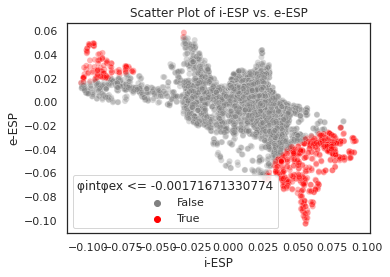

In [7]:
# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
percentage = 0.2

# negative_productの上位25%を取得(四捨五入してる)
over_threshold = round(negative_product_num * percentage)
# 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]

# 赤で描画するthresholdを設定
# 一番最後の行のnegative_productを取得
threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]

# negative_productの上位25%をグラフに表示
sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df['negative_product'] <= threshold, 
                palette={True: 'red', False: 'gray'}
               )
# sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
# sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


# グラフにタイトルとラベルを追加
plt.title("Scatter Plot of i-ESP vs. e-ESP")
plt.xlabel("i-ESP")
plt.ylabel("e-ESP")


# 凡例を調整
plt.legend(title='φintφex <= {}'.format(threshold), loc='best')

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_20_percent.png"
plt.savefig(output_fig_path)

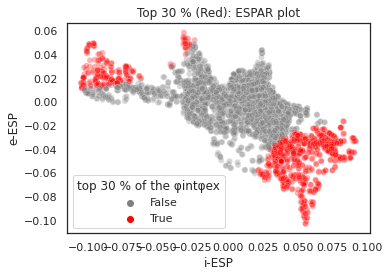

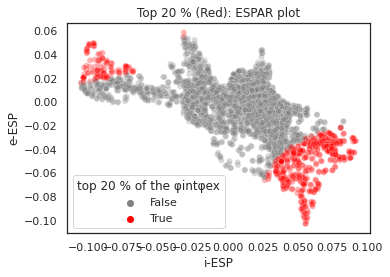

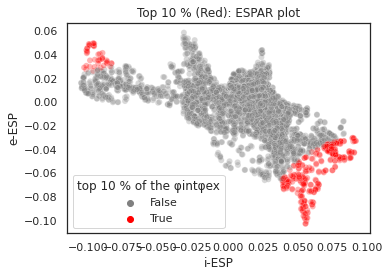

In [8]:
# for文で回して、90, 80, 70, 60, 50とpercentageごとにグラフを作成

# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
# percentageの値が0.01なら上位10%のプロットを赤で表示します
# 開始
start = 30
# 終了
stop = 0
# ステップ
step = -10

percentage_list = np.arange(start=start, stop=stop, step=step)

for percentage in percentage_list:
    # negative_productの上位XX%を取得(四捨五入してる)
    over_threshold = round(negative_product_num * (percentage*0.01))
    # 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
    over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
    over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
    over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]
    
    # 赤で描画するthresholdを設定
    # 一番最後の行のnegative_productを取得
    threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]
    
#     それぞれの%のdfを保存
    percentage_column_name = f"Top {percentage} %"
    concat_df[percentage_column_name] = np.nan

    # concat_df[percentage_column_name]カラムを作成し、thresholdよりも
    for idx in range(len(concat_df)):
        if concat_df['negative_product'].iloc[idx] <= threshold:
            concat_df[percentage_column_name].iloc[idx] = product_df.iloc[idx][0]
        else:
            concat_df[percentage_column_name].iloc[idx] = 0

    # negative_productの上位25%をグラフに表示
    sns.scatterplot(x="i-ESP", 
                    y="e-ESP", 
                    data=concat_df, 
                    alpha=0.3, 
                    hue=concat_df['negative_product'] <= threshold, 
                    palette={True: 'red', False: 'gray'}
                   )
    # sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
    # sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


    # グラフにタイトルとラベルを追加
    plt.title(f"Top {percentage} % (Red): ESPAR plot")
    plt.xlabel("i-ESP")
    plt.ylabel("e-ESP")
    

    # 凡例を調整
    plt.legend(title='top {} % of the φintφex'.format(percentage), loc='best')

    output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_top_{percentage}%.png"
    plt.savefig(output_fig_path)
    plt.show()

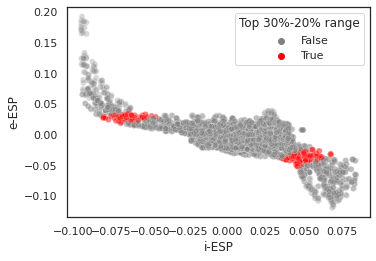

In [14]:
# 例えば30%以上20%以下の範囲にあるプロットを抽出したい場合
# 30%と20%の共通部分を0で置き換えればいい
start = 30
stop = 20
new_column_name = f"Top {start}%-{stop}% range"
percentage_column_name_start = f"Top {start} %"
percentage_column_name_stop = f"Top {stop} %"

concat_df[percentage_column_name_start]
concat_df[percentage_column_name_stop]

# 30%と20%の共通部分のindexを特定
common_index = concat_df[concat_df[percentage_column_name_start] == concat_df[percentage_column_name_stop]].index
# new_column_nameを作成し、共通部分は0で置き換える
concat_df[new_column_name] = concat_df[percentage_column_name_start].copy()  # "C"カラムを"B"カラムのコピーとして作成
concat_df.loc[common_index, new_column_name] = 0  # 共通部分を0で置き換え

sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df[new_column_name] != 0, 
                palette={True: 'red', False: 'gray'}
                )


output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_Top_{start}%-{stop}%.png"
plt.savefig(output_fig_path)

In [17]:
concat_df

,i-ESP,e-ESP,φintφex,negative_product,positive_product,Top 60 %,Top 50 %,Top 40 %,Top 30 %,Top 20 %,Top 10 %,Top 30%-20% range
0,0.040104,0.001322,0.000053,0.000000,0.000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039244,0.007442,0.000292,0.000000,0.000292,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.039266,0.006287,0.000247,0.000000,0.000247,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038935,0.005595,0.000218,0.000000,0.000218,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.039023,0.007327,0.000286,0.000000,0.000286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.040765,-0.003412,-0.000139,-0.000139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5808,0.040501,0.002400,0.000097,0.000000,0.000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5809,0.040302,0.009944,0.000401,0.000000,0.000401,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5810,0.039971,-0.005991,-0.000239,-0.000239,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# ESPAR mapを作成するために、txtにlist形式でも保存
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_concat_df_data.txt"
list_top_30_20_range = list(concat_df["Top 30%-20% range"].values)
list_top_10 = list(concat_df["Top 10 %"].values)
list_top_20 = list(concat_df["Top 20 %"].values)
list_top_30 = list(concat_df["Top 30 %"].values)

with open(output_txt_path, "w") as f:
    f.write("Top 30%-20% range list = " + str(list_top_30_20_range))
    f.write("\n\n\n\n\n\n")
    f.write("Top 10% list " + str(list_top_10))
    f.write("\n\n\n\n\n\n")
    f.write("Top 20% list " + str(list_top_20))
    f.write("\n\n\n\n\n\n")
    f.write("Top 30% list " + str(list_top_30))
    f.write("\n\n\n\n\n\n")
            